In [3]:
import pandas as pd

import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV


In [4]:
data = pd.read_csv('Train.txt',header=None)

In [5]:
test_data = pd.read_csv('Test.txt',header=None)

In [6]:
data.columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot","num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations", "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login","count","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate",
                "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [7]:
test_data.columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot","num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations", "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login","count","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate",
                "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [8]:
data

duration protocol_type     service flag  src_bytes  dst_bytes  land  \
0              0           tcp    ftp_data   SF        491          0     0   
1              0           udp       other   SF        146          0     0   
2              0           tcp     private   S0          0          0     0   
3              0           tcp        http   SF        232       8153     0   
4              0           tcp        http   SF        199        420     0   
5              0           tcp     private  REJ          0          0     0   
6              0           tcp     private   S0          0          0     0   
7              0           tcp     private   S0          0          0     0   
8              0           tcp  remote_job   S0          0          0     0   
9              0           tcp     private   S0          0          0     0   
10             0           tcp     private  REJ          0          0     0   
11             0           tcp     private   S0          0          0     0   
12             0           tcp        http   SF        287       2251     0   
13             0           tcp    ftp_data   SF        334          0     0   
14             0           tcp        name   S0          0          0     0   
15             0           tcp  netbios_ns   S0          0          0     0   
16             0           tcp        http   SF        300      13788     0   
17             0          icmp       eco_i   SF         18          0     0   
18             0           tcp        http   SF        233        616     0   
19             0           tcp        http   SF        343       1178     0   
20             0           tcp         mtp   S0          0          0     0   
21             0           tcp     private   S0          0          0     0   
22             0           tcp        http   SF        253      11905     0   
23          5607           udp       other   SF        147        105     0   
24             0           tcp         mtp   S0          0          0     0   
25           507           tcp      telnet   SF        437      14421     0   
26             0           tcp     private   S0          0          0     0   
27             0           tcp        http   SF        227       6588     0   
28             0           tcp        http   SF        215      10499     0   
29             0           tcp        http   SF        241       1400     0   
...          ...           ...         ...  ...        ...        ...   ...   
125943         0           tcp    ftp_data   SF        491          0     0   
125944         1           tcp        smtp   SF       2049        362     0   
125945         0           tcp        http   SF        247        799     0   
125946         0           tcp      finger   S0          0          0     0   
125947         0          icmp       eco_i   SF         18          0     0   
125948         0           tcp     private   S0          0          0     0   
125949         0           tcp        http  REJ          0          0     0   
125950         0           udp     private   SF         28          0     0   
125951         0           tcp        http   SF        254        555     0   
125952         0           tcp        smtp   SF       1289        408     0   
125953         0           tcp        auth   S0          0          0     0   
125954         0           tcp        http   SF        269      10939     0   
125955         0           tcp        http  REJ          0          0     0   
125956         0          icmp       eco_i   SF         30          0     0   
125957         1           tcp        smtp   SF       1247        327     0   
125958         0           tcp     private   S0          0          0     0   
125959         0           tcp        http   SF        373       4777     0   
125960         0           tcp        http   SF        329        885     0   
125961         0           tcp        http   SF        236

In [9]:
test_data

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0             0           tcp   private   REJ          0          0     0   
1             0           tcp   private   REJ          0          0     0   
2             2           tcp  ftp_data    SF      12983          0     0   
3             0          icmp     eco_i    SF         20          0     0   
4             1           tcp    telnet  RSTO          0         15     0   
5             0           tcp      http    SF        267      14515     0   
6             0           tcp      smtp    SF       1022        387     0   
7             0           tcp    telnet    SF        129        174     0   
8             0           tcp      http    SF        327        467     0   
9             0           tcp       ftp    SF         26        157     0   
10            0           tcp    telnet    SF          0          0     0   
11            0           tcp      smtp    SF        616        330     0   
12            0           tcp   private   REJ          0          0     0   
13            0           tcp    telnet    S0          0          0     0   
14           37           tcp    telnet    SF        773     364200     0   
15            0           tcp      http    SF        350       3610     0   
16            0           tcp      http    SF        213        659     0   
17            0           tcp      http    SF        246       2090     0   
18            0           udp   private    SF         45         44     0   
19            0           tcp   private   REJ          0          0     0   
20            0           tcp      ldap   REJ          0          0     0   
21            0           tcp     pop_3    S0          0          0     0   
22            0           tcp      http    SF        196       1823     0   
23            0           tcp      http    SF        277       1816     0   
24            0           tcp   courier   REJ          0          0     0   
25            0           tcp   discard  RSTO          0          0     0   
26            0           tcp      http    SF        294       6442     0   
27            0           tcp      http    SF        300        440     0   
28            0          icmp     ecr_i    SF        520          0     0   
29            0           udp   private    SF         54         51     0   
...         ...           ...       ...   ...        ...        ...   ...   
22514         0           udp     other    SF        115          0     0   
22515         0           tcp      http    S0          0          0     0   
22516         0           tcp      http    SF        322        396     0   
22517      7498           tcp    telnet    SF          0         44     0   
22518         0           tcp      http    SF        295        757     0   
22519      8209           tcp    telnet    SF          0         15     0   
22520         0           tcp   private   REJ          0          0     0   
22521         0           udp   private    SF          1          1     0   
22522         0           tcp      http    SF      54540       8314     0   
22523         0           tcp      http    SF        289       9522     0   
22524        15           tcp       ftp    SF         45        214     0   
22525      2064           tcp      http  RSTR      55744          0     0   
22526         0           tcp      http    SF        169       4997     0   
22527         0           tcp      http    SF        236      16257     0   
22528         0          icmp     ecr_i    SF       1032          0     0   
22529         0           tcp    finger    SF          9        139     0   
22530         0           tcp   private    S0          0          0     0   
22531         0           tcp   private    S0          0          0     0   
22532         0           tcp      http    SF        264      14839     0   
22533         0           tcp      http    SF        274       1623     0   
225

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 

In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
duration                       22544 non-null int64
protocol_type                  22544 non-null object
service                        22544 non-null object
flag                           22544 non-null object
src_bytes                      22544 non-null int64
dst_bytes                      22544 non-null int64
land                           22544 non-null int64
wrong_fragment                 22544 non-null int64
urgent                         22544 non-null int64
hot                            22544 non-null int64
num_failed_logins              22544 non-null int64
logged_in                      22544 non-null int64
num_compromised                22544 non-null int64
root_shell                     22544 non-null int64
su_attempted                   22544 non-null int64
num_root                       22544 non-null int64
num_file_creations             22544 non-null int64
num_

In [12]:
data['attack'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [13]:
test_data['attack'].value_counts()

normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
xterm                13
rootkit              13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
phf                   2
sqlattack             2
worm                  2
perl                  2
udpstorm              2
loadmodule            2
imap                  1
Name: attack, dtype: int64

In [14]:
data.describe().T

count          mean           std  min    25%  \
duration                     125973.0    287.144650  2.604515e+03  0.0   0.00   
src_bytes                    125973.0  45566.743000  5.870331e+06  0.0   0.00   
dst_bytes                    125973.0  19779.114421  4.021269e+06  0.0   0.00   
land                         125973.0      0.000198  1.408607e-02  0.0   0.00   
wrong_fragment               125973.0      0.022687  2.535300e-01  0.0   0.00   
urgent                       125973.0      0.000111  1.436603e-02  0.0   0.00   
hot                          125973.0      0.204409  2.149968e+00  0.0   0.00   
num_failed_logins            125973.0      0.001222  4.523914e-02  0.0   0.00   
logged_in                    125973.0      0.395736  4.890101e-01  0.0   0.00   
num_compromised              125973.0      0.279250  2.394204e+01  0.0   0.00   
root_shell                   125973.0      0.001342  3.660284e-02  0.0   0.00   
su_attempted                 125973.0      0.001103  4.515438e-02  0.0   0.00   
num_root                     125973.0      0.302192  2.439962e+01  0.0   0.00   
num_file_creations           125973.0      0.012669  4.839351e-01  0.0   0.00   
num_shells                   125973.0      0.000413  2.218113e-02  0.0   0.00   
num_access_files             125973.0      0.004096  9.936956e-02  0.0   0.00   
num_outbound_cmds            125973.0      0.000000  0.000000e+00  0.0   0.00   
is_host_login                125973.0      0.000008  2.817483e-03  0.0   0.00   
is_guest_login               125973.0      0.009423  9.661233e-02  0.0   0.00   
count                        125973.0     84.107555  1.145086e+02  0.0   2.00   
srv_count                    125973.0     27.737888  7.263584e+01  0.0   2.00   
serror_rate                  125973.0      0.284485  4.464556e-01  0.0   0.00   
srv_serror_rate              125973.0      0.282485  4.470225e-01  0.0   0.00   
rerror_rate                  125973.0      0.119958  3.204355e-01  0.0   0.00   
srv_rerror_rate              125973.0      0.121183  3.236472e-01  0.0   0.00   
same_srv_rate                125973.0      0.660928  4.396229e-01  0.0   0.09   
diff_srv_rate                125973.0      0.063053  1.803144e-01  0.0   0.00   
srv_diff_host_rate           125973.0      0.097322  2.598305e-01  0.0   0.00   
dst_host_count               125973.0    182.148945  9.920621e+01  0.0  82.00   
dst_host_srv_count           125973.0    115.653005  1.107027e+02  0.0  10.00   
dst_host_same_srv_rate       125973.0      0.521242  4.489494e-01  0.0   0.05   
dst_host_diff_srv_rate       125973.0      0.082951  1.889218e-01  0.0   0.00   
dst_host_same_src_port_rate  125973.0      0.148379  3.089971e-01  0.0   0.00   
dst_host_srv_diff_host_rate  125973.0      0.032542  1.125638e-01  0.0   0.00   
dst_host_serror_rate         125973.0      0.284452  4.447841e-01  0.0   0.00   
dst_host_srv_serror_rate     125973.0      0.278485  4.456691e-01  0.0   0.00   
dst_host_rerror_rate         125973.0      0.118832  3.065575e-01  0.0   0.00   
dst_host_srv_rerror_rate     125973.0      0.120240  3.194594e-01  0.0   0.00   
last_flag                    125973.0     19.504060  2.291503e+00  0.0  18.00   

                                50%     75%           max  
duration                       0.00    0.00  4.290800e+04  
src_bytes                     44.00  276.00  1.379964e+09  
dst_bytes                      0.00  516.00  1.309937e+09  
land                           0.00    0.00  1.000000e+00  
wrong_fragment                 0.00    0.00  3.000000e+00  
urgent                         0.00    0.00  3.000000e+00  
hot                            0.00    0.00  7.700000e+01  
num_failed_logins              0.00    0.00  5.000000e+00  
logged_in                      0.00    1.00  1.000000e+00  
num_compromised                0.00    0.00  7.479000e+03  
root_shell                     0.00    0.00  1.000000e+00  
su_attempted                   0.00    0.00  2.000000e+00  
num_root   

In [15]:
test_data.describe().T

count          mean            std  min  \
duration                     22544.0    218.859076    1407.176612  0.0   
src_bytes                    22544.0  10395.450231  472786.431088  0.0   
dst_bytes                    22544.0   2056.018808   21219.297609  0.0   
land                         22544.0      0.000311       0.017619  0.0   
wrong_fragment               22544.0      0.008428       0.142599  0.0   
urgent                       22544.0      0.000710       0.036473  0.0   
hot                          22544.0      0.105394       0.928428  0.0   
num_failed_logins            22544.0      0.021647       0.150328  0.0   
logged_in                    22544.0      0.442202       0.496659  0.0   
num_compromised              22544.0      0.119899       7.269597  0.0   
root_shell                   22544.0      0.002440       0.049334  0.0   
su_attempted                 22544.0      0.000266       0.021060  0.0   
num_root                     22544.0      0.114665       8.041614  0.0   
num_file_creations           22544.0      0.008738       0.676842  0.0   
num_shells                   22544.0      0.001153       0.048014  0.0   
num_access_files             22544.0      0.003549       0.067829  0.0   
num_outbound_cmds            22544.0      0.000000       0.000000  0.0   
is_host_login                22544.0      0.000488       0.022084  0.0   
is_guest_login               22544.0      0.028433       0.166211  0.0   
count                        22544.0     79.028345     128.539248  0.0   
srv_count                    22544.0     31.124379      89.062532  0.0   
serror_rate                  22544.0      0.102924       0.295367  0.0   
srv_serror_rate              22544.0      0.103635       0.298332  0.0   
rerror_rate                  22544.0      0.238463       0.416118  0.0   
srv_rerror_rate              22544.0      0.235179       0.416215  0.0   
same_srv_rate                22544.0      0.740345       0.412496  0.0   
diff_srv_rate                22544.0      0.094074       0.259138  0.0   
srv_diff_host_rate           22544.0      0.098110       0.253545  0.0   
dst_host_count               22544.0    193.869411      94.035663  0.0   
dst_host_srv_count           22544.0    140.750532     111.783972  0.0   
dst_host_same_srv_rate       22544.0      0.608722       0.435688  0.0   
dst_host_diff_srv_rate       22544.0      0.090540       0.220717  0.0   
dst_host_same_src_port_rate  22544.0      0.132261       0.306268  0.0   
dst_host_srv_diff_host_rate  22544.0      0.019638       0.085394  0.0   
dst_host_serror_rate         22544.0      0.097814       0.273139  0.0   
dst_host_srv_serror_rate     22544.0      0.099426       0.281866  0.0   
dst_host_rerror_rate         22544.0      0.233385       0.387229  0.0   
dst_host_srv_rerror_rate     22544.0      0.226683       0.400875  0.0   
last_flag                    22544.0     18.017965       4.270361  0.0   

                                25%     50%       75%         max  
duration                       0.00    0.00    0.0000     57715.0  
src_bytes                      0.00   54.00  287.0000  62825648.0  
dst_bytes                      0.00   46.00  601.0000   1345927.0  
land                           0.00    0.00    0.0000         1.0  
wrong_fragment                 0.00    0.00    0.0000         3.0  
urgent                         0.00    0.00    0.0000         3.0  
hot                            0.00    0.00    0.0000       101.0  
num_failed_logins              0.00    0.00    0.0000         4.0  
logged_in                      0.00    0.00    1.0000         1.0  
num_compromised                0.00    0.00    0.0000       796.0  
root_shell                     0.00    0.00    0.0000         1.0  
su_attempted                   0.00    0.00    0.0000         2.0  
num_root                       0.00    0.00    0.0000       878.0  
num_file_creations             0.00    0.00    0.0000       100.0  
num_shells                     0.00    0.00    0.0

### Data Pre-Processing:

In [22]:
Profile_Report = pandas_profiling.ProfileReport(data)

In [23]:
Profile_Report.to_file(outputfile='pandas_profiling.html')

In [401]:
Profile_Report = pandas_profiling.ProfileReport(test_data)

In [402]:
Profile_Report.to_file(outputfile='pandas_profiling_test_data.html')

In [16]:
# Missing value
data.isnull().any()

duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
num_outbound_cmds              False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerror_rate                    False
s

In [17]:
test_data.isnull().any()

duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
num_outbound_cmds              False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerror_rate                    False
s

In [18]:
data[['land','logged_in','root_shell','su_attempted','is_host_login','is_guest_login']] = data[['land','logged_in','root_shell','su_attempted','is_host_login','is_guest_login']].astype('object')

In [19]:
test_data[['land','logged_in','root_shell','su_attempted','is_host_login','is_guest_login']] =test_data[['land','logged_in','root_shell','su_attempted','is_host_login','is_guest_login']].astype('object')

In [20]:
# separating numerical and categorical data
numeric_data = data.select_dtypes(include=['float32','float64','int32','int64'])
cat_data = data.select_dtypes(include=['object','O'])

In [21]:
numeric_test_data = test_data.select_dtypes(include=['float32','float64','int32','int64'])
cat_test_data = test_data.select_dtypes(include=['object','O'])

In [22]:
#numeric_data.head()
cat_data.head()

protocol_type   service flag land logged_in root_shell su_attempted  \
0           tcp  ftp_data   SF    0         0          0            0   
1           udp     other   SF    0         0          0            0   
2           tcp   private   S0    0         0          0            0   
3           tcp      http   SF    0         1          0            0   
4           tcp      http   SF    0         1          0            0   

  is_host_login is_guest_login   attack  
0             0              0   normal  
1             0              0   normal  
2             0              0  neptune  
3             0              0   normal  
4             0              0   normal

In [23]:
#numeric_test_data.head()
cat_test_data.head()

protocol_type   service  flag land logged_in root_shell su_attempted  \
0           tcp   private   REJ    0         0          0            0   
1           tcp   private   REJ    0         0          0            0   
2           tcp  ftp_data    SF    0         0          0            0   
3          icmp     eco_i    SF    0         0          0            0   
4           tcp    telnet  RSTO    0         0          0            0   

  is_host_login is_guest_login   attack  
0             0              0  neptune  
1             0              0  neptune  
2             0              0   normal  
3             0              0    saint  
4             0              0    mscan

In [24]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [25]:
num_summary=numeric_data.apply(lambda x: var_summary(x)).T

In [26]:
num_summary

N  NMISS           SUM          MEAN  \
duration                     125973.0    0.0  3.617247e+07    287.144650   
src_bytes                    125973.0    0.0  5.740179e+09  45566.743000   
dst_bytes                    125973.0    0.0  2.491634e+09  19779.114421   
wrong_fragment               125973.0    0.0  2.858000e+03      0.022687   
urgent                       125973.0    0.0  1.400000e+01      0.000111   
hot                          125973.0    0.0  2.575000e+04      0.204409   
num_failed_logins            125973.0    0.0  1.540000e+02      0.001222   
num_compromised              125973.0    0.0  3.517800e+04      0.279250   
num_root                     125973.0    0.0  3.806800e+04      0.302192   
num_file_creations           125973.0    0.0  1.596000e+03      0.012669   
num_shells                   125973.0    0.0  5.200000e+01      0.000413   
num_access_files             125973.0    0.0  5.160000e+02      0.004096   
num_outbound_cmds            125973.0    0.0  0.000000e+00      0.000000   
count                        125973.0    0.0  1.059528e+07     84.107555   
srv_count                    125973.0    0.0  3.494225e+06     27.737888   
serror_rate                  125973.0    0.0  3.583737e+04      0.284485   
srv_serror_rate              125973.0    0.0  3.558553e+04      0.282485   
rerror_rate                  125973.0    0.0  1.511153e+04      0.119958   
srv_rerror_rate              125973.0    0.0  1.526582e+04      0.121183   
same_srv_rate                125973.0    0.0  8.325904e+04      0.660928   
diff_srv_rate                125973.0    0.0  7.942930e+03      0.063053   
srv_diff_host_rate           125973.0    0.0  1.225990e+04      0.097322   
dst_host_count               125973.0    0.0  2.294585e+07    182.148945   
dst_host_srv_count           125973.0    0.0  1.456916e+07    115.653005   
dst_host_same_srv_rate       125973.0    0.0  6.566238e+04      0.521242   
dst_host_diff_srv_rate       125973.0    0.0  1.044960e+04      0.082951   
dst_host_same_src_port_rate  125973.0    0.0  1.869173e+04      0.148379   
dst_host_srv_diff_host_rate  125973.0    0.0  4.099470e+03      0.032542   
dst_host_serror_rate         125973.0    0.0  3.583333e+04      0.284452   
dst_host_srv_serror_rate     125973.0    0.0  3.508153e+04      0.278485   
dst_host_rerror_rate         125973.0    0.0  1.496960e+04      0.118832   
dst_host_srv_rerror_rate     125973.0    0.0  1.514698e+04      0.120240   
last_flag                    125973.0    0.0  2.456985e+06     19.504060   

                             MEDIAN           STD           VAR  MIN    P1  \
duration                       0.00  2.604515e+03  6.783500e+06  0.0   0.0   
src_bytes                     44.00  5.870331e+06  3.446079e+13  0.0   0.0   
dst_bytes                      0.00  4.021269e+06  1.617061e+13  0.0   0.0   
wrong_fragment                 0.00  2.535300e-01  6.427745e-02  0.0   0.0   
urgent                         0.00  1.436603e-02  2.063827e-04  0.0   0.0   
hot                            0.00  2.149968e+00  4.622364e+00  0.0   0.0   
num_failed_logins              0.00  4.523914e-02  2.046580e-03  0.0   0.0   
num_compromised                0.00  2.394204e+01  5.732214e+02  0.0   0.0   
num_root                       0.00  2.439962e+01  5.953414e+02  0.0   0.0   
num_file_creations             0.00  4.839351e-01  2.341932e-01  0.0   0.0   
num_shells                     0.00  2.218113e-02  4.920025e-04  0.0   0.0   
num_access_files               0.00  9.936956e-02  9.874309e-03  0.0   0.0   
num_outbound_cmds              0.00  0.000000e+00  0.000000e+00  0.0   0.0   
count                         14.00  1.145086e+02  1.311222e+04  0.0   1.0   
srv_count                      8.00  7.263584e+01  5.275965e+03  0.0   1.0   
serror_rate                    0.00  4.464556e-01  1.993226e-01  0.0   0.0   
srv_serror_rate                0.00  4.470225e-01  1.998291e-01  0.0   0.0   
rerror_rate                    0.00  3.204355e-

In [27]:
num_test_summary=numeric_test_data.apply(lambda x: var_summary(x)).T

In [28]:
num_test_summary

N  NMISS           SUM          MEAN  \
duration                     22544.0    0.0  4.933959e+06    218.859076   
src_bytes                    22544.0    0.0  2.343550e+08  10395.450231   
dst_bytes                    22544.0    0.0  4.635089e+07   2056.018808   
wrong_fragment               22544.0    0.0  1.900000e+02      0.008428   
urgent                       22544.0    0.0  1.600000e+01      0.000710   
hot                          22544.0    0.0  2.376000e+03      0.105394   
num_failed_logins            22544.0    0.0  4.880000e+02      0.021647   
num_compromised              22544.0    0.0  2.703000e+03      0.119899   
num_root                     22544.0    0.0  2.585000e+03      0.114665   
num_file_creations           22544.0    0.0  1.970000e+02      0.008738   
num_shells                   22544.0    0.0  2.600000e+01      0.001153   
num_access_files             22544.0    0.0  8.000000e+01      0.003549   
num_outbound_cmds            22544.0    0.0  0.000000e+00      0.000000   
count                        22544.0    0.0  1.781615e+06     79.028345   
srv_count                    22544.0    0.0  7.016680e+05     31.124379   
serror_rate                  22544.0    0.0  2.320310e+03      0.102924   
srv_serror_rate              22544.0    0.0  2.336350e+03      0.103635   
rerror_rate                  22544.0    0.0  5.375910e+03      0.238463   
srv_rerror_rate              22544.0    0.0  5.301870e+03      0.235179   
same_srv_rate                22544.0    0.0  1.669033e+04      0.740345   
diff_srv_rate                22544.0    0.0  2.120800e+03      0.094074   
srv_diff_host_rate           22544.0    0.0  2.211800e+03      0.098110   
dst_host_count               22544.0    0.0  4.370592e+06    193.869411   
dst_host_srv_count           22544.0    0.0  3.173080e+06    140.750532   
dst_host_same_srv_rate       22544.0    0.0  1.372302e+04      0.608722   
dst_host_diff_srv_rate       22544.0    0.0  2.041130e+03      0.090540   
dst_host_same_src_port_rate  22544.0    0.0  2.981690e+03      0.132261   
dst_host_srv_diff_host_rate  22544.0    0.0  4.427300e+02      0.019638   
dst_host_serror_rate         22544.0    0.0  2.205110e+03      0.097814   
dst_host_srv_serror_rate     22544.0    0.0  2.241460e+03      0.099426   
dst_host_rerror_rate         22544.0    0.0  5.261430e+03      0.233385   
dst_host_srv_rerror_rate     22544.0    0.0  5.110340e+03      0.226683   
last_flag                    22544.0    0.0  4.061970e+05     18.017965   

                             MEDIAN            STD           VAR  MIN   P1  \
duration                       0.00    1407.176612  1.980146e+06  0.0  0.0   
src_bytes                     54.00  472786.431088  2.235270e+11  0.0  0.0   
dst_bytes                     46.00   21219.297609  4.502586e+08  0.0  0.0   
wrong_fragment                 0.00       0.142599  2.033441e-02  0.0  0.0   
urgent                         0.00       0.036473  1.330286e-03  0.0  0.0   
hot                            0.00       0.928428  8.619786e-01  0.0  0.0   
num_failed_logins              0.00       0.150328  2.259843e-02  0.0  0.0   
num_compromised                0.00       7.269597  5.284704e+01  0.0  0.0   
num_root                       0.00       8.041614  6.466755e+01  0.0  0.0   
num_file_creations             0.00       0.676842  4.581146e-01  0.0  0.0   
num_shells                     0.00       0.048014  2.305373e-03  0.0  0.0   
num_access_files               0.00       0.067829  4.600812e-03  0.0  0.0   
num_outbound_cmds              0.00       0.000000  0.000000e+00  0.0  0.0   
count                          8.00     128.539248  1.652234e+04  0.0  1.0   
srv_count                      6.00      89.062532  7.932135e+03  0.0  1.0   
serror_rate                    0.00       0.295367  8.724158e-02  0.0  0.0   
srv_serror_rate                0.00       0.298332  8.900175e-02  0.0  0.0   
rerror_rate                    0.00       0.416118  1.731539e-01  0.0  0.0   
sr

In [29]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.95))
    x = x.clip_lower(x.quantile(0.05))
    return x

In [30]:
# DON'T RE-RUN THIS STEP
numeric_data=numeric_data.apply(lambda x: outlier_capping(x))

In [31]:
numeric_test_data=numeric_test_data.apply(lambda x: outlier_capping(x))

In [32]:
def create_dummies( df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [33]:
for x in ['protocol_type','service','flag','land','logged_in','root_shell','su_attempted','is_host_login','is_guest_login','attack']:
    cat_data[x] = cat_data[x].astype('category')
    cat_data = create_dummies(cat_data,x) 

C:\Users\mac\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
for x in ['protocol_type','service','flag','land','logged_in','root_shell','su_attempted','is_host_login','is_guest_login','attack']:
    cat_test_data[x] = cat_test_data[x].astype('category')
    cat_test_data = create_dummies(cat_test_data,x) 

C:\Users\mac\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
cat_data.head()

protocol_type_tcp  protocol_type_udp  service_X11  service_Z39_50  \
0                  1                  0            0               0   
1                  0                  1            0               0   
2                  1                  0            0               0   
3                  1                  0            0               0   
4                  1                  0            0               0   

   service_aol  service_auth  service_bgp  service_courier  service_csnet_ns  \
0            0             0            0                0                 0   
1            0             0            0                0                 0   
2            0             0            0                0                 0   
3            0             0            0                0                 0   
4            0             0            0                0                 0   

   service_ctf         ...          attack_phf  attack_pod  attack_portsweep  \
0            0         ...                   0           0                 0   
1            0         ...                   0           0                 0   
2            0         ...                   0           0                 0   
3            0         ...                   0           0                 0   
4            0         ...                   0           0                 0   

   attack_rootkit  attack_satan  attack_smurf  attack_spy  attack_teardrop  \
0               0             0             0           0                0   
1               0             0             0           0                0   
2               0             0             0           0                0   
3               0             0             0           0                0   
4               0             0             0           0                0   

   attack_warezclient  attack_warezmaster  
0                   0                   0  
1                   0                   0  
2                   0                   0  
3                   0                   0  
4                   0                   0  

[5 rows x 110 columns]

In [36]:
cat_test_data.head()

protocol_type_tcp  protocol_type_udp  service_X11  service_Z39_50  \
0                  1                  0            0               0   
1                  1                  0            0               0   
2                  1                  0            0               0   
3                  0                  0            0               0   
4                  1                  0            0               0   

   service_auth  service_bgp  service_courier  service_csnet_ns  service_ctf  \
0             0            0                0                 0            0   
1             0            0                0                 0            0   
2             0            0                0                 0            0   
3             0            0                0                 0            0   
4             0            0                0                 0            0   

   service_daytime      ...       attack_snmpgetattack  attack_snmpguess  \
0                0      ...                          0                 0   
1                0      ...                          0                 0   
2                0      ...                          0                 0   
3                0      ...                          0                 0   
4                0      ...                          0                 0   

   attack_sqlattack  attack_teardrop  attack_udpstorm  attack_warezmaster  \
0                 0                0                0                   0   
1                 0                0                0                   0   
2                 0                0                0                   0   
3                 0                0                0                   0   
4                 0                0                0                   0   

   attack_worm  attack_xlock  attack_xsnoop  attack_xterm  
0            0             0              0             0  
1            0             0              0             0  
2            0             0              0             0  
3            0             0              0             0  
4            0             0              0             0  

[5 rows x 119 columns]

In [37]:
data_updated = pd.concat([numeric_data, cat_data], axis=1)

In [38]:
data_updated.head()

duration  src_bytes  dst_bytes  wrong_fragment  urgent  hot  \
0       0.0      491.0        0.0             0.0     0.0  0.0   
1       0.0      146.0        0.0             0.0     0.0  0.0   
2       0.0        0.0        0.0             0.0     0.0  0.0   
3       0.0      232.0     8153.0             0.0     0.0  0.0   
4       0.0      199.0      420.0             0.0     0.0  0.0   

   num_failed_logins  num_compromised  num_root  num_file_creations  \
0                0.0              0.0       0.0                 0.0   
1                0.0              0.0       0.0                 0.0   
2                0.0              0.0       0.0                 0.0   
3                0.0              0.0       0.0                 0.0   
4                0.0              0.0       0.0                 0.0   

          ...          attack_phf  attack_pod  attack_portsweep  \
0         ...                   0           0                 0   
1         ...                   0           0                 0   
2         ...                   0           0                 0   
3         ...                   0           0                 0   
4         ...                   0           0                 0   

   attack_rootkit  attack_satan  attack_smurf  attack_spy  attack_teardrop  \
0               0             0             0           0                0   
1               0             0             0           0                0   
2               0             0             0           0                0   
3               0             0             0           0                0   
4               0             0             0           0                0   

   attack_warezclient  attack_warezmaster  
0                   0                   0  
1                   0                   0  
2                   0                   0  
3                   0                   0  
4                   0                   0  

[5 rows x 143 columns]

In [39]:
test_data_updated = pd.concat([numeric_test_data, cat_test_data], axis=1)

In [40]:
test_data_updated.head()

duration  src_bytes  dst_bytes  wrong_fragment  urgent  hot  \
0       0.0        0.0        0.0             0.0     0.0  0.0   
1       0.0        0.0        0.0             0.0     0.0  0.0   
2       2.0    12983.0        0.0             0.0     0.0  0.0   
3       0.0       20.0        0.0             0.0     0.0  0.0   
4       1.0        0.0       15.0             0.0     0.0  0.0   

   num_failed_logins  num_compromised  num_root  num_file_creations  \
0                0.0              0.0       0.0                 0.0   
1                0.0              0.0       0.0                 0.0   
2                0.0              0.0       0.0                 0.0   
3                0.0              0.0       0.0                 0.0   
4                0.0              0.0       0.0                 0.0   

       ...       attack_snmpgetattack  attack_snmpguess  attack_sqlattack  \
0      ...                          0                 0                 0   
1      ...                          0                 0                 0   
2      ...                          0                 0                 0   
3      ...                          0                 0                 0   
4      ...                          0                 0                 0   

   attack_teardrop  attack_udpstorm  attack_warezmaster  attack_worm  \
0                0                0                   0            0   
1                0                0                   0            0   
2                0                0                   0            0   
3                0                0                   0            0   
4                0                0                   0            0   

   attack_xlock  attack_xsnoop  attack_xterm  
0             0              0             0  
1             0              0             0  
2             0              0             0  
3             0              0             0  
4             0              0             0  

[5 rows x 152 columns]

In [41]:
data_updated.corr()

duration  src_bytes  dst_bytes  wrong_fragment  \
duration                     1.000000   0.228230   0.037963             NaN   
src_bytes                    0.228230   1.000000   0.191872             NaN   
dst_bytes                    0.037963   0.191872   1.000000             NaN   
wrong_fragment                    NaN        NaN        NaN             NaN   
urgent                            NaN        NaN        NaN             NaN   
hot                               NaN        NaN        NaN             NaN   
num_failed_logins                 NaN        NaN        NaN             NaN   
num_compromised                   NaN        NaN        NaN             NaN   
num_root                          NaN        NaN        NaN             NaN   
num_file_creations                NaN        NaN        NaN             NaN   
num_shells                        NaN        NaN        NaN             NaN   
num_access_files                  NaN        NaN        NaN             NaN   
num_outbound_cmds                 NaN        NaN        NaN             NaN   
count                       -0.198639  -0.302553  -0.324452             NaN   
srv_count                   -0.131912  -0.002768  -0.118397             NaN   
serror_rate                 -0.168924  -0.364701  -0.269925             NaN   
srv_serror_rate             -0.168474  -0.363744  -0.269061             NaN   
rerror_rate                  0.062926  -0.203533  -0.150899             NaN   
srv_rerror_rate              0.059815  -0.197224  -0.143121             NaN   
same_srv_rate                0.162328   0.423372   0.346194             NaN   
diff_srv_rate               -0.021622  -0.231434  -0.235268             NaN   
srv_diff_host_rate           0.039699   0.159763   0.019239             NaN   
dst_host_count              -0.028180  -0.208829  -0.263077             NaN   
dst_host_srv_count          -0.144175   0.191375   0.423553             NaN   
dst_host_same_srv_rate      -0.113702   0.234329   0.411117             NaN   
dst_host_diff_srv_rate       0.323969  -0.107491  -0.202183             NaN   
dst_host_same_src_port_rate  0.202432   0.054710  -0.115146             NaN   
dst_host_srv_diff_host_rate -0.045046  -0.047688   0.031975             NaN   
dst_host_serror_rate        -0.159120  -0.348648  -0.275914             NaN   
dst_host_srv_serror_rate    -0.158387  -0.359776  -0.274151             NaN   
...                               ...        ...        ...             ...   
flag_SH                     -0.012661  -0.027682  -0.021136             NaN   
land_1                      -0.003842  -0.008400  -0.006413             NaN   
logged_in_1                  0.083903   0.509934   0.544409             NaN   
root_shell_1                 0.081194   0.036978   0.095150             NaN   
su_attempted_1               0.044208   0.022496   0.038320             NaN   
su_attempted_2               0.071625   0.030154   0.072621             NaN   
is_host_login_1              0.011382  -0.000327   0.008848             NaN   
is_guest_login_1             0.316935   0.174788   0.065811             NaN   
attack_buffer_overflow       0.044601   0.028977   0.021500             NaN   
attack_ftp_write             0.015011  -0.000233   0.001884             NaN   
attack_guess_passwd         -0.000169  -0.005628  -0.007281             NaN   
attack_imap                  0.004779   0.003502   0.002363             NaN   
attack_ipsweep              -0.036540  -0.098333  -0.077816             NaN   
attack_land                 -0.003260  -0.007127  -0.005442             NaN   
attack_loadmodule            0.021997  -0.001742   0.007710             NaN   
attack_multihop              0.017485   0.003886   0.013404             NaN   
attack_neptune              -0.190111  -0.415664  -0.317410             NaN   
attack_nmap                 -0.029864  -0.054833  -0.049841             NaN   
attack_normal                0.136200   0.353103   0.358309             NaN   


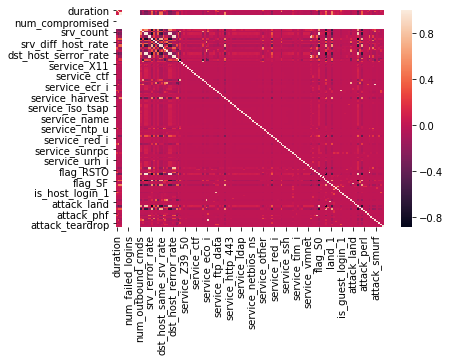

In [42]:
sns.heatmap(data_updated.corr())

## Feature selection:

In [42]:
data_updated.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'num_compromised', 'num_root',
       'num_file_creations',
       ...
       'attack_phf', 'attack_pod', 'attack_portsweep', 'attack_rootkit',
       'attack_satan', 'attack_smurf', 'attack_spy', 'attack_teardrop',
       'attack_warezclient', 'attack_warezmaster'],
      dtype='object', length=143)

In [43]:
test_data_col = list(test_data_updated.columns)

In [44]:
test_data_col

['duration',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'num_compromised',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'last_flag',
 'protocol_type_tcp',
 'protocol_type_udp',
 'service_X11',
 'service_Z39_50',
 'service_auth',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_daytime',
 'service_discard',
 'service_domain',
 'service_domain_u',
 'service_echo',
 'service_eco_i',
 'service_ecr_i',
 'service_efs',
 'service_exec',
 'service_fin

In [43]:
X = data_updated.columns.difference(['attack_normal','attack_buffer_overflow','attack_ftp_write','attack_guess_passwd','attack_imap','attack_ipsweep','attack_land','attack_loadmodule','attack_multihop','attack_neptune','attack_nmap','attack_perl','attack_phf', 'attack_pod', 'attack_portsweep', 'attack_rootkit',
       'attack_satan', 'attack_smurf', 'attack_spy', 'attack_teardrop','attack_warezclient', 'attack_warezmaster'])

In [44]:
X

Index(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_rerror_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_count',
       ...
       'service_whois', 'src_bytes', 'srv_count', 'srv_diff_host_rate',
       'srv_rerror_rate', 'srv_serror_rate', 'su_attempted_1',
       'su_attempted_2', 'urgent', 'wrong_fragment'],
      dtype='object', length=121)

In [45]:
X_test = test_data_updated.columns.difference(['attack_normal','attack_back','attack_buffer_overflow','attack_ftp_write','attack_guess_passwd','attack_httptunnel',
                                               'attack_imap','attack_ipsweep','attack_land','attack_loadmodule','attack_mailbomb','attack_mscan','attack_multihop','attack_named',
                                               'attack_neptune','attack_nmap','attack_perl','attack_phf','attack_pod','attack_portsweep','attack_processtable',
                                               'attack_ps','attack_rootkit','attack_saint','attack_satan','attack_sendmail','attack_smurf','attack_snmpgetattack','attack_snmpguess',
                                               'attack_sqlattack','attack_teardrop','attack_udpstorm','attack_warezmaster','attack_worm','attack_xlock','attack_xsnoop', 'attack_xterm'])

In [46]:
X_test

Index(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_rerror_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_count',
       ...
       'service_whois', 'src_bytes', 'srv_count', 'srv_diff_host_rate',
       'srv_rerror_rate', 'srv_serror_rate', 'su_attempted_1',
       'su_attempted_2', 'urgent', 'wrong_fragment'],
      dtype='object', length=115)

In [49]:
#y = attack_normal
#x = X or X_test

In [47]:
X_data = data_updated[X]

In [48]:
X_data.columns

Index(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_rerror_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_count',
       ...
       'service_whois', 'src_bytes', 'srv_count', 'srv_diff_host_rate',
       'srv_rerror_rate', 'srv_serror_rate', 'su_attempted_1',
       'su_attempted_2', 'urgent', 'wrong_fragment'],
      dtype='object', length=121)

In [49]:
X_test_data = test_data_updated[X_test]

In [50]:
X_test_data.columns

Index(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_rerror_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_count',
       ...
       'service_whois', 'src_bytes', 'srv_count', 'srv_diff_host_rate',
       'srv_rerror_rate', 'srv_serror_rate', 'su_attempted_1',
       'su_attempted_2', 'urgent', 'wrong_fragment'],
      dtype='object', length=115)

In [62]:
data_updated_with_normal_attack = data_updated[X]

In [63]:
test_data_updated_with_normal_attack = test_data_updated[X_test]

#### For binary classifier:-<br><br>=>Normal <br>           0=>Attack

In [154]:
data_updated_with_normal_attack['attack_normal']

0         1
1         1
2         0
3         1
4         1
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        1
13        0
14        0
15        0
16        1
17        0
18        1
19        1
20        0
21        0
22        1
23        1
24        0
25        1
26        0
27        1
28        1
29        1
         ..
125943    1
125944    1
125945    1
125946    0
125947    0
125948    0
125949    1
125950    0
125951    1
125952    1
125953    0
125954    1
125955    1
125956    1
125957    1
125958    0
125959    1
125960    1
125961    1
125962    1
125963    1
125964    0
125965    1
125966    0
125967    1
125968    0
125969    1
125970    1
125971    0
125972    1
Name: attack_normal, Length: 125973, dtype: uint8

In [65]:
test_data_updated_with_normal_attack['attack_normal']

0        0
1        0
2        1
3        0
4        0
5        1
6        1
7        0
8        1
9        0
10       0
11       1
12       0
13       0
14       1
15       1
16       1
17       1
18       1
19       0
20       0
21       0
22       1
23       1
24       0
25       0
26       1
27       1
28       0
29       1
        ..
22514    1
22515    0
22516    1
22517    0
22518    1
22519    0
22520    0
22521    0
22522    0
22523    1
22524    0
22525    0
22526    1
22527    1
22528    0
22529    1
22530    0
22531    0
22532    1
22533    1
22534    0
22535    1
22536    0
22537    0
22538    0
22539    1
22540    1
22541    0
22542    1
22543    0
Name: attack_normal, Length: 22544, dtype: uint8

### WOE:

In [123]:
from matplotlib.backends.backend_pdf import PdfPages

In [66]:
import numpy as np

C:\Users\mac\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\mac\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


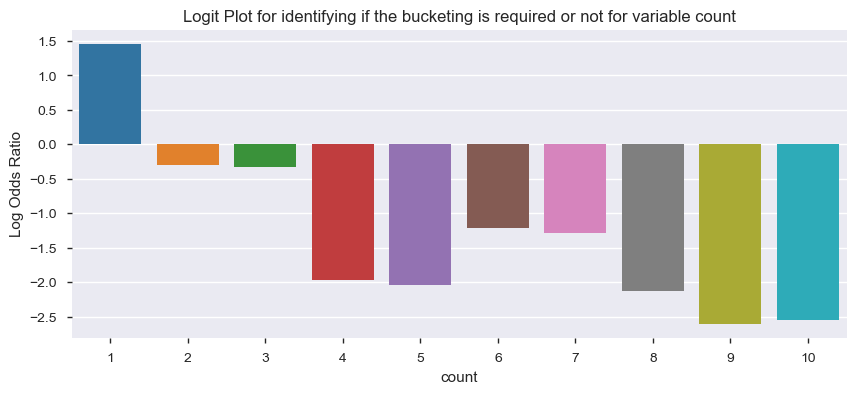

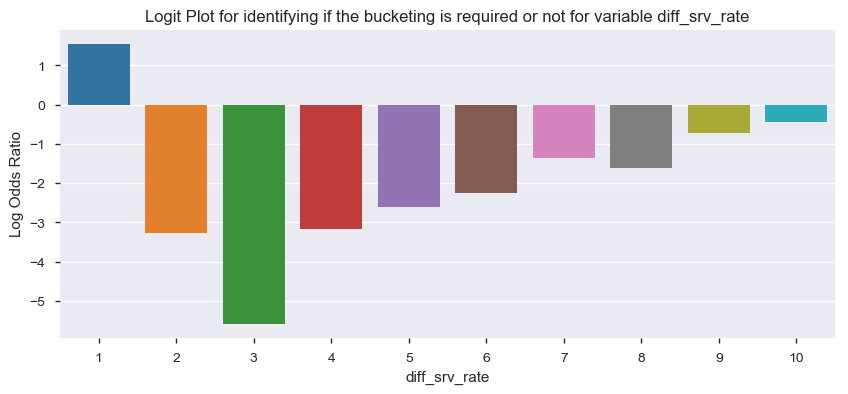

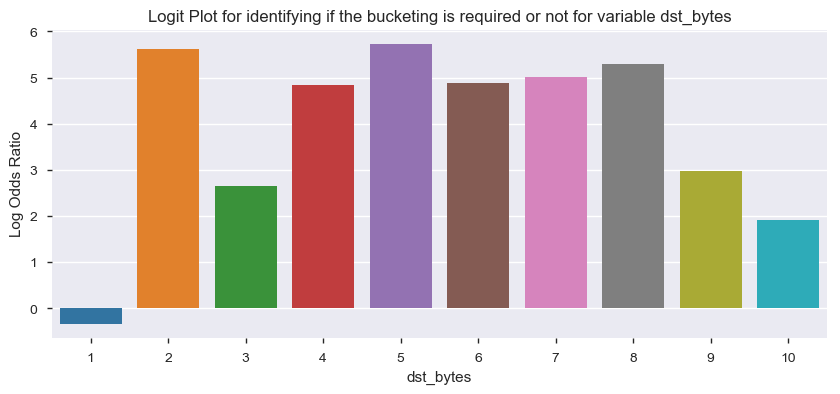

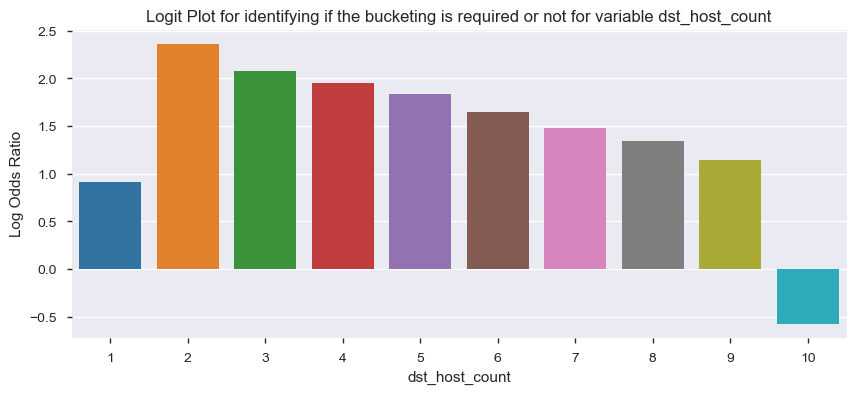

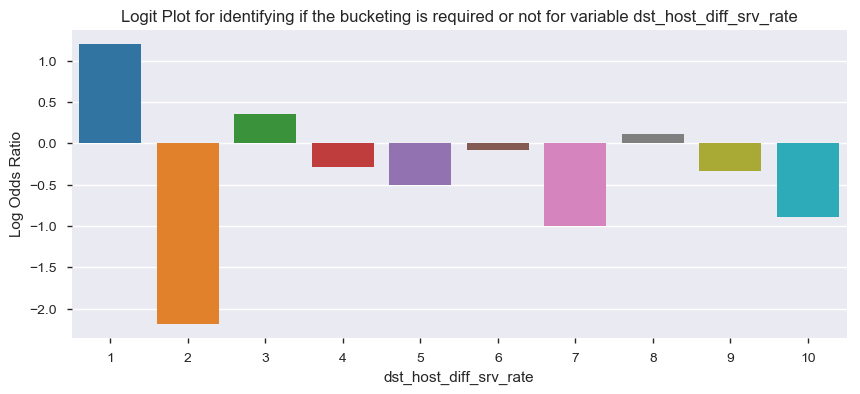

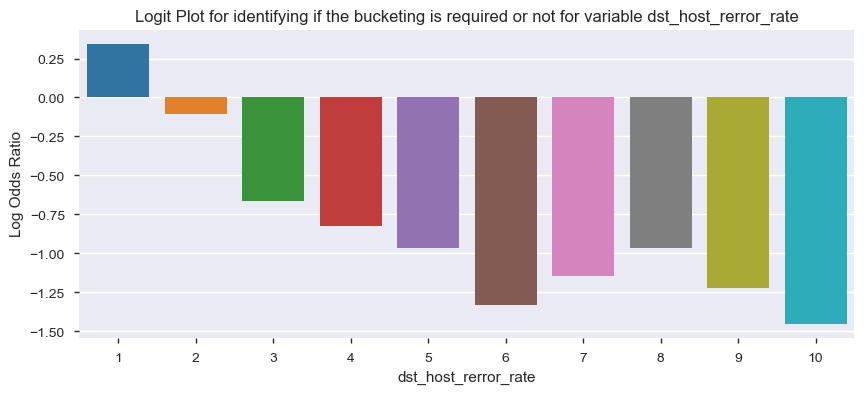

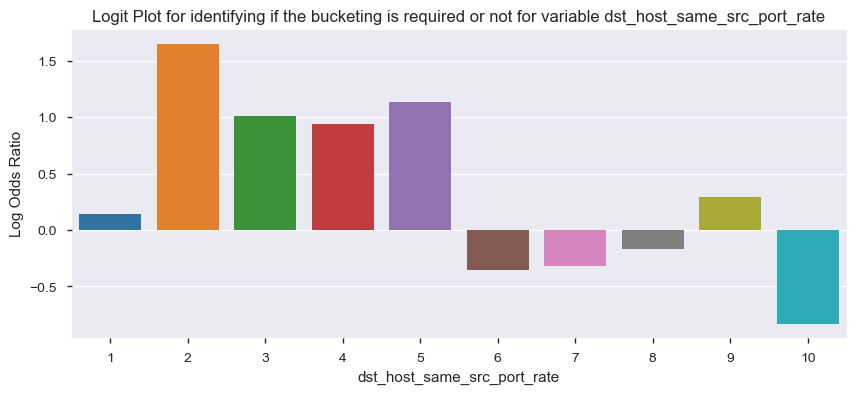

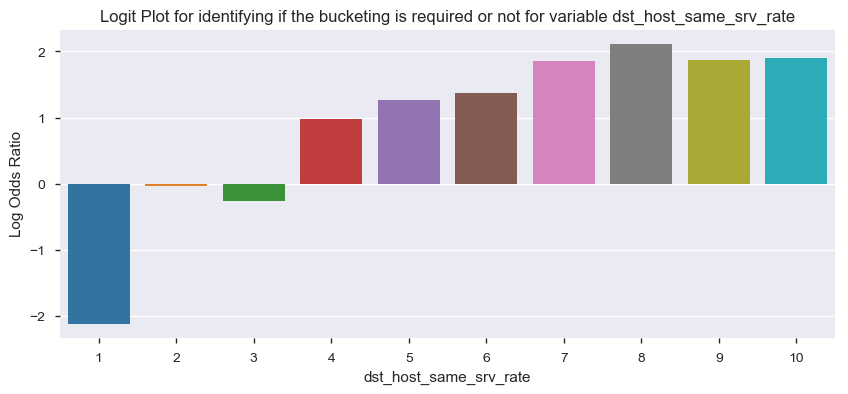

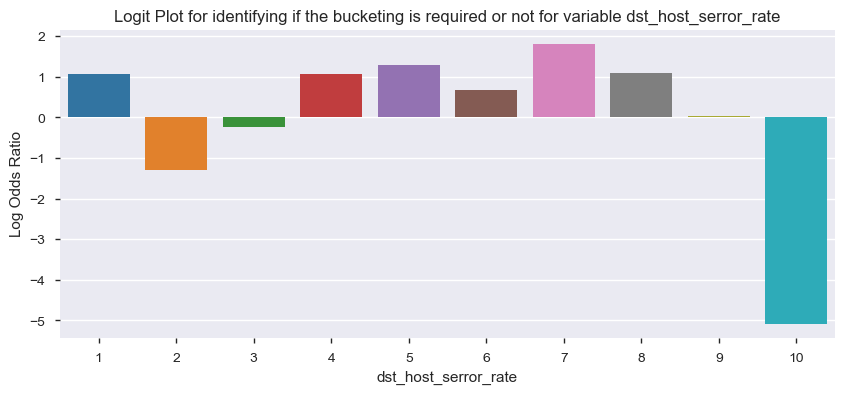

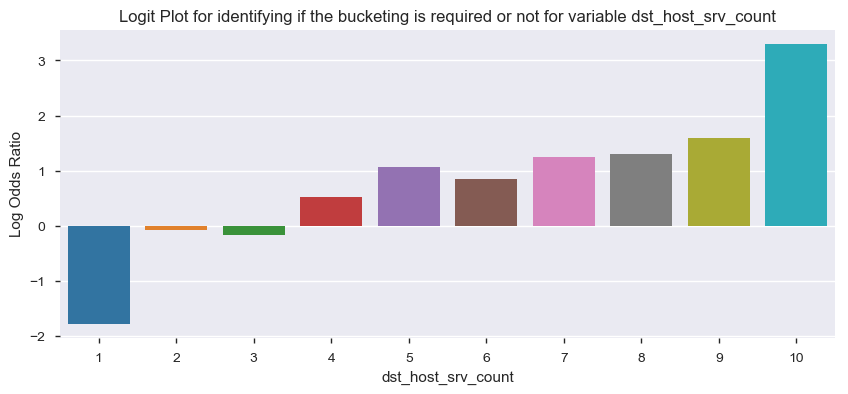

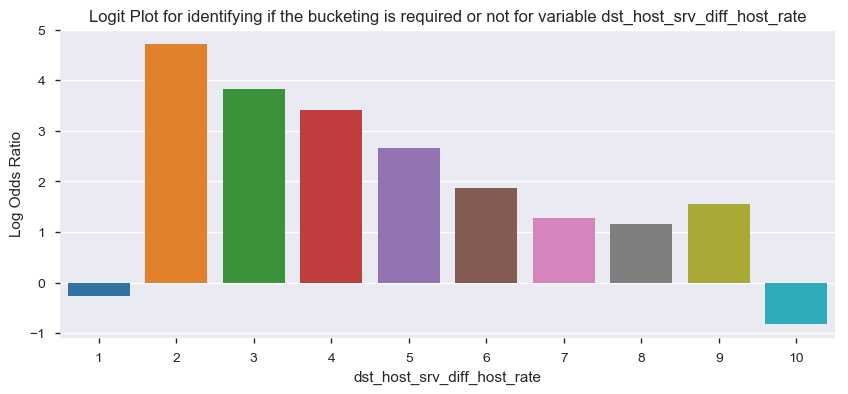

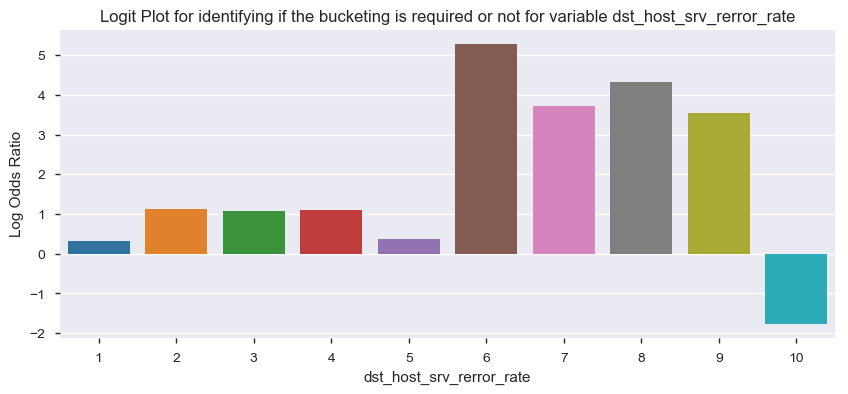

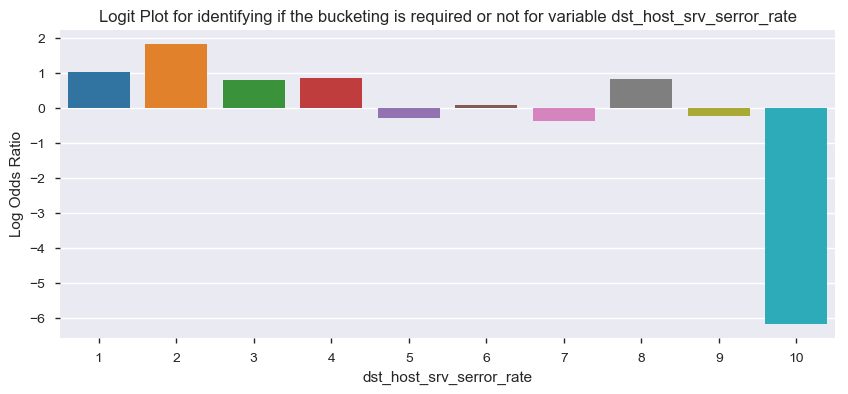

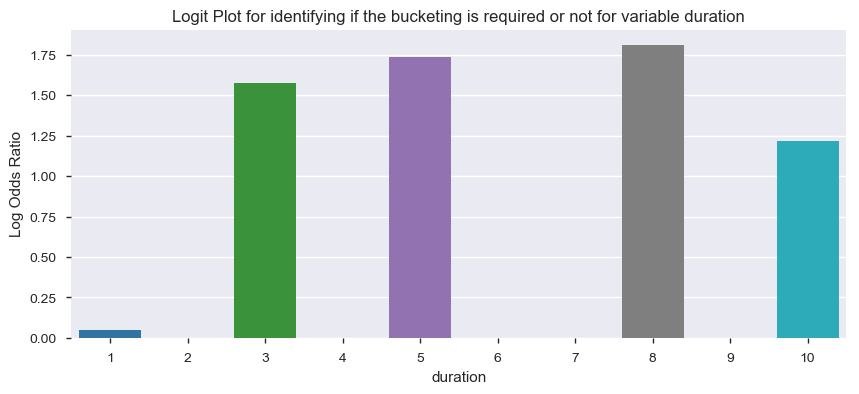

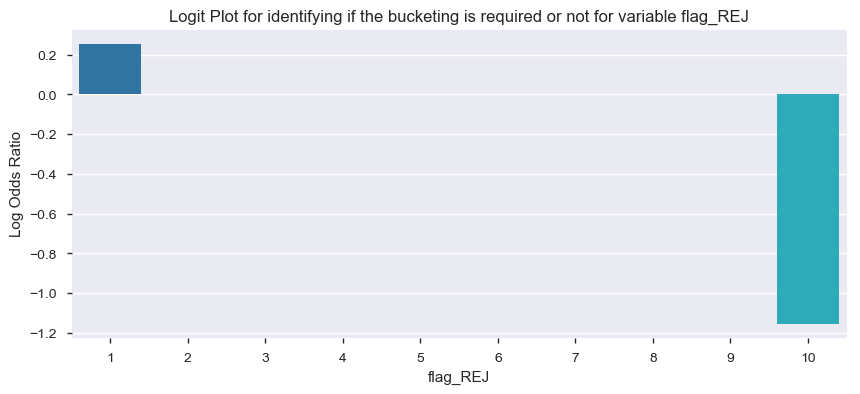

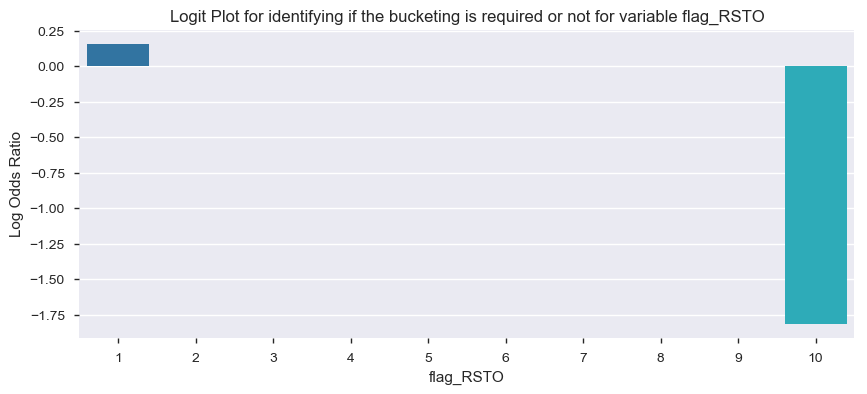

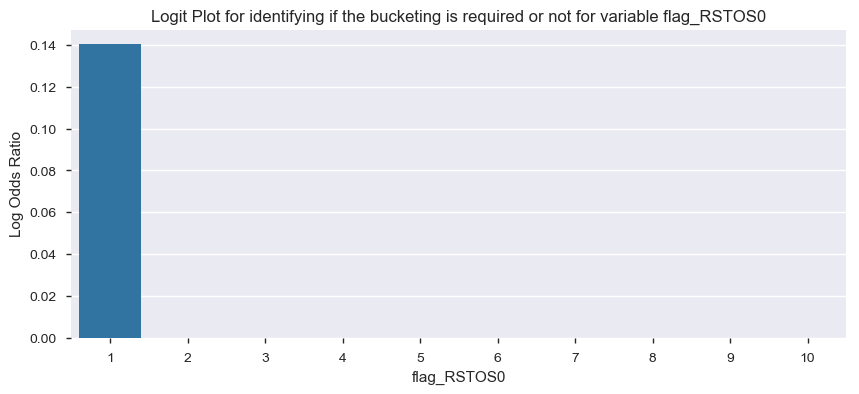

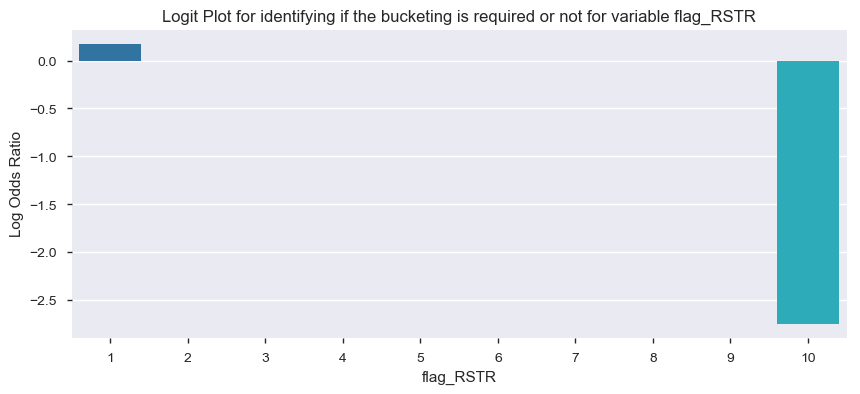

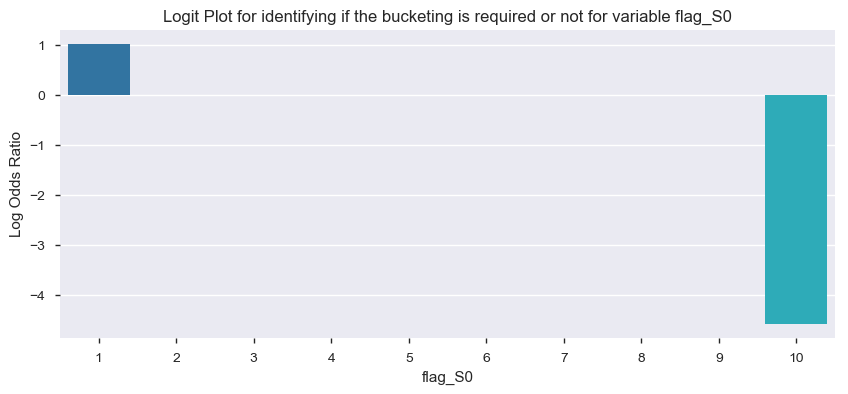

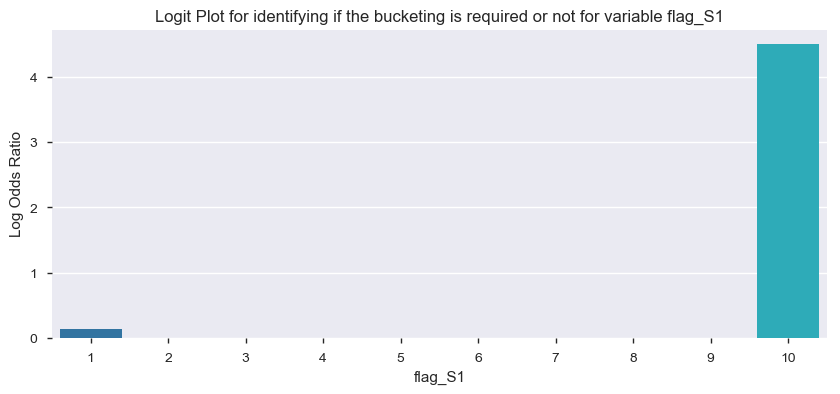

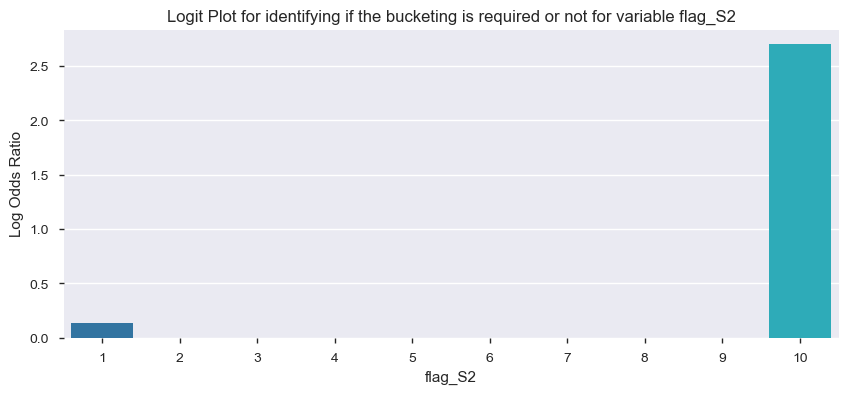

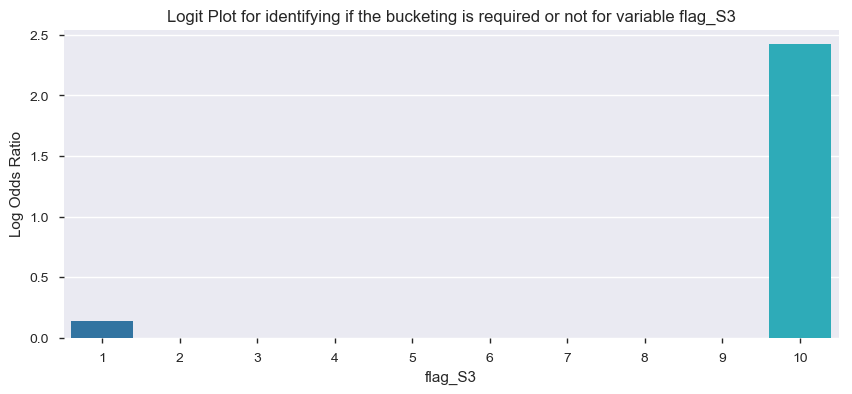

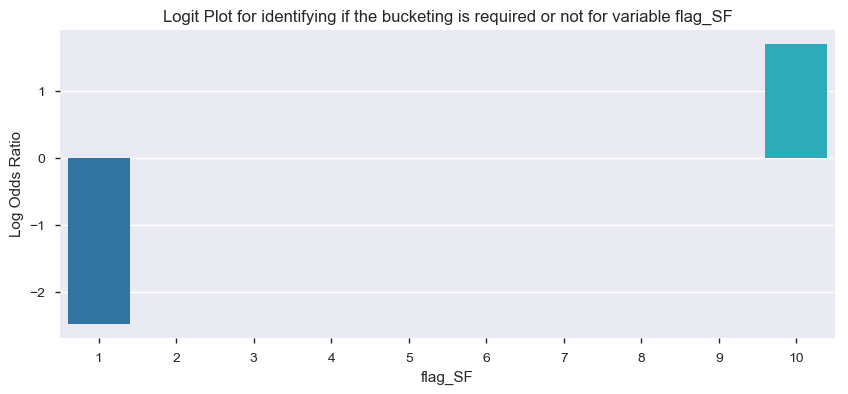

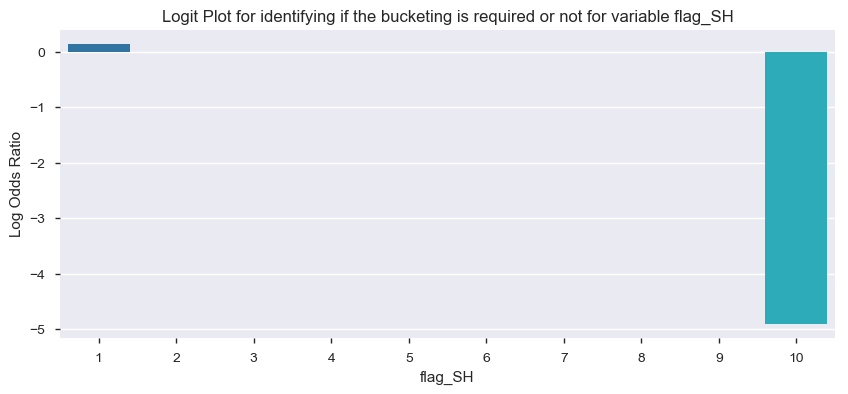

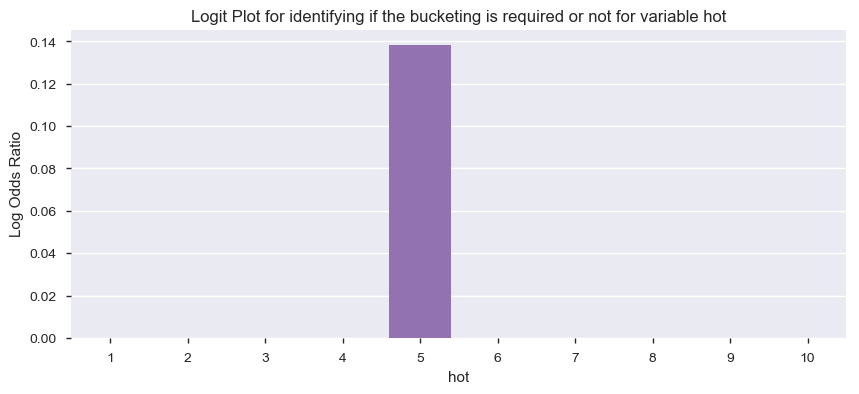

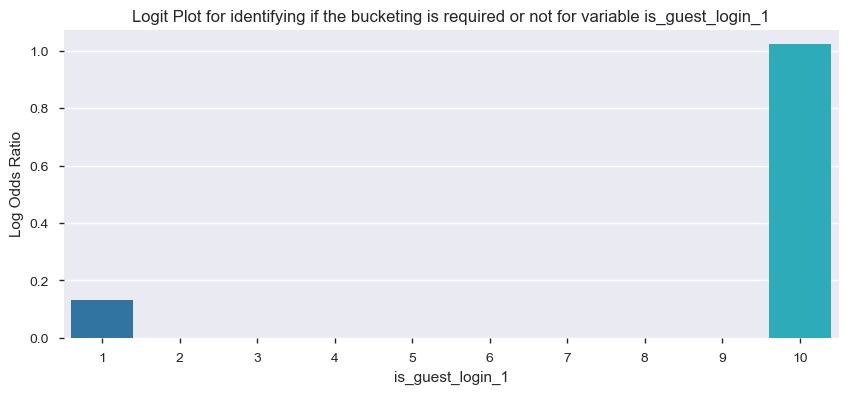

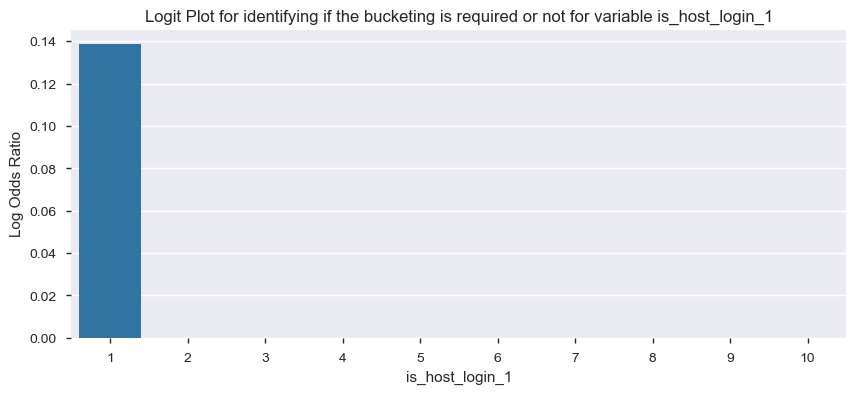

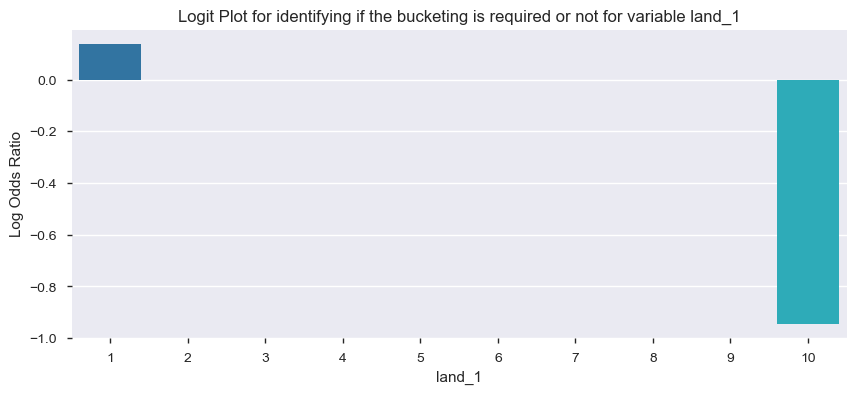

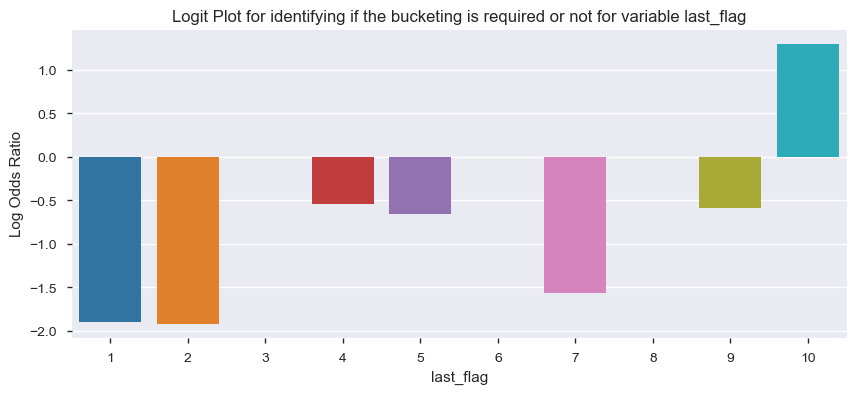

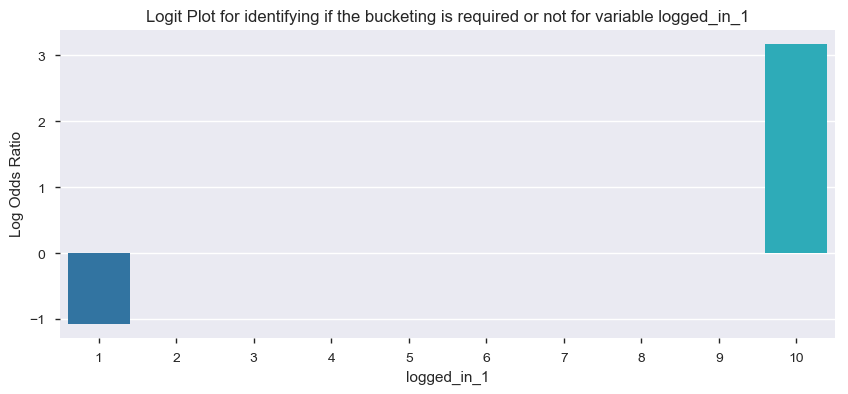

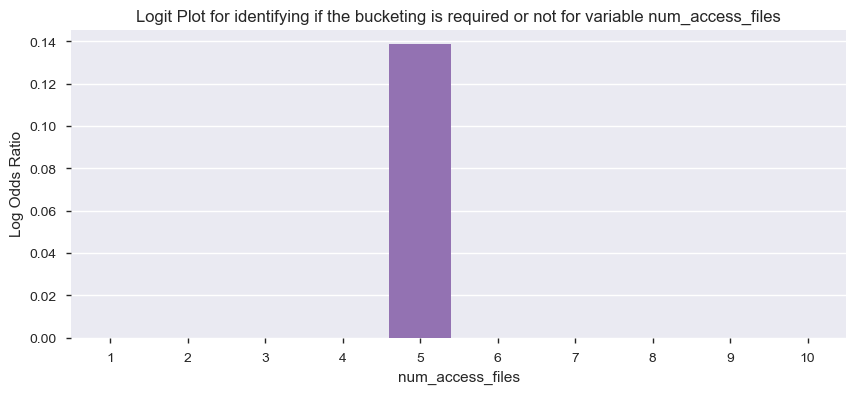

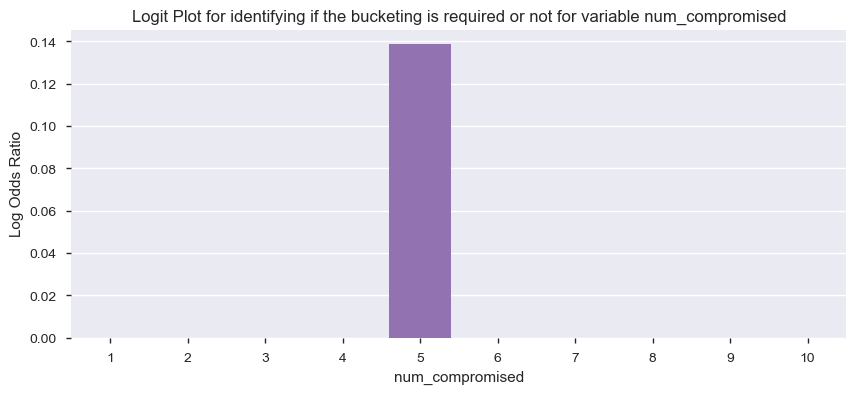

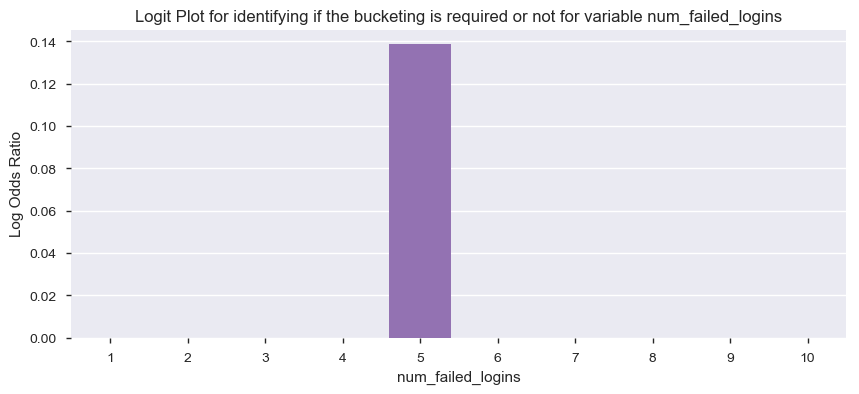

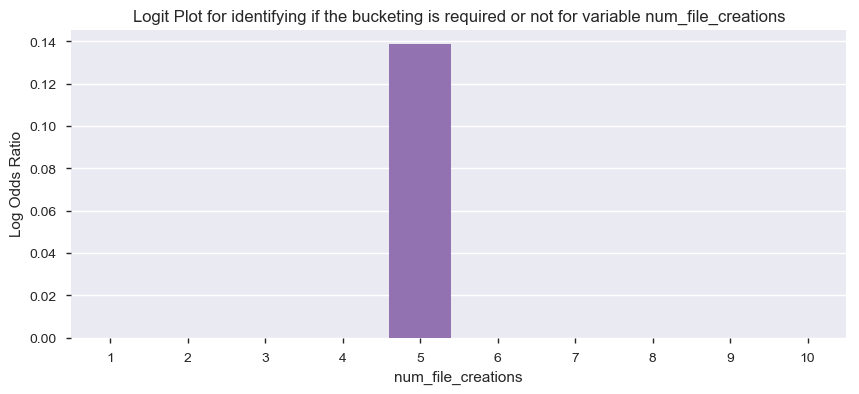

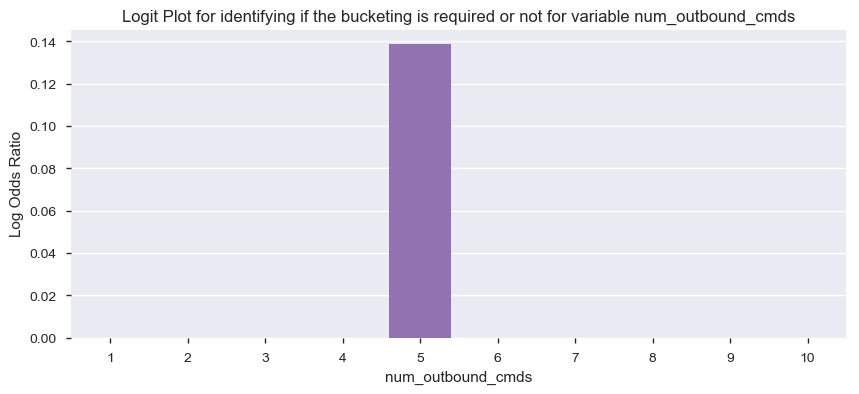

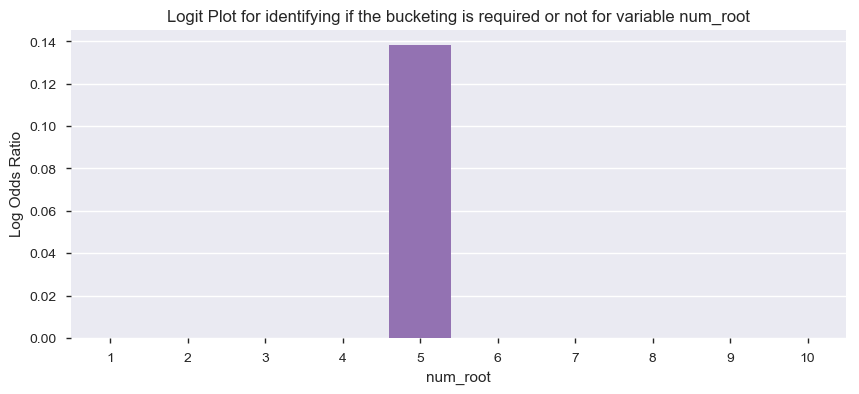

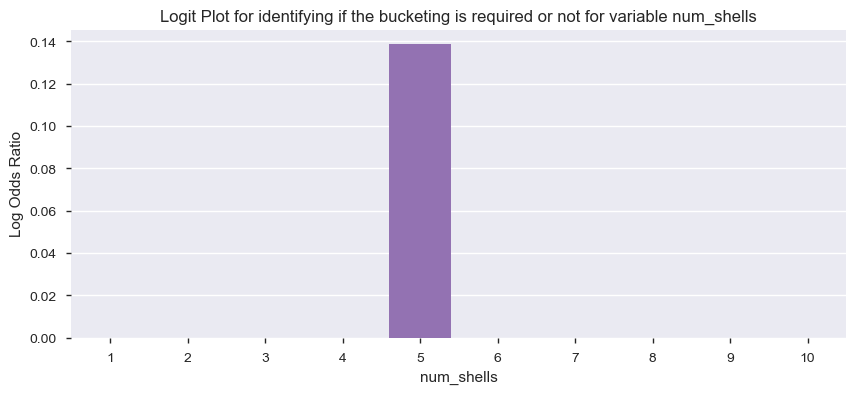

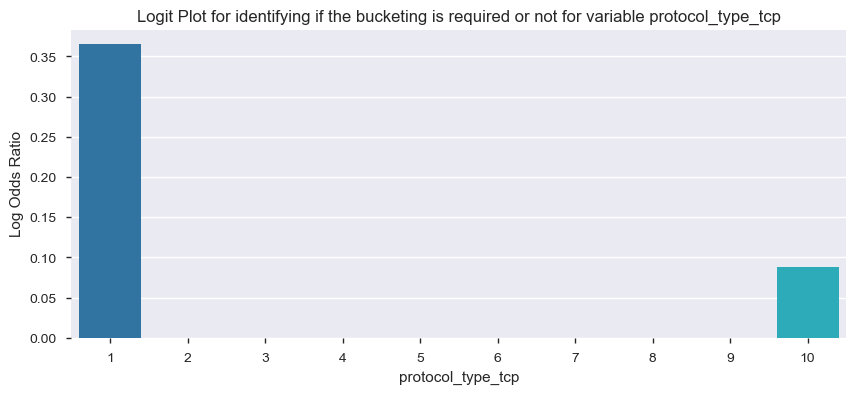

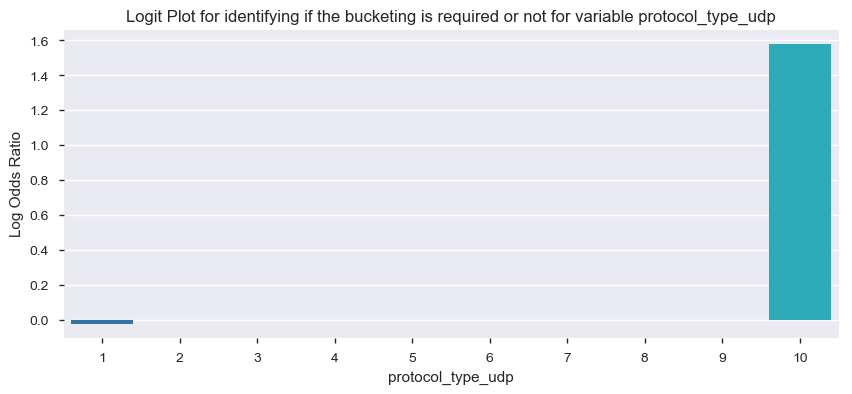

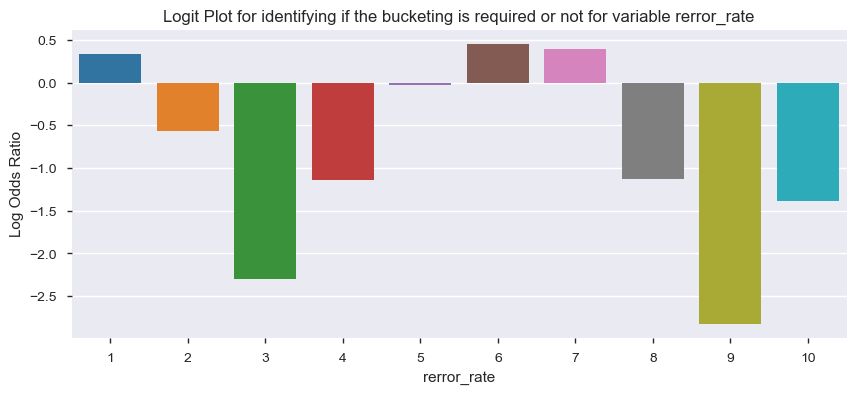

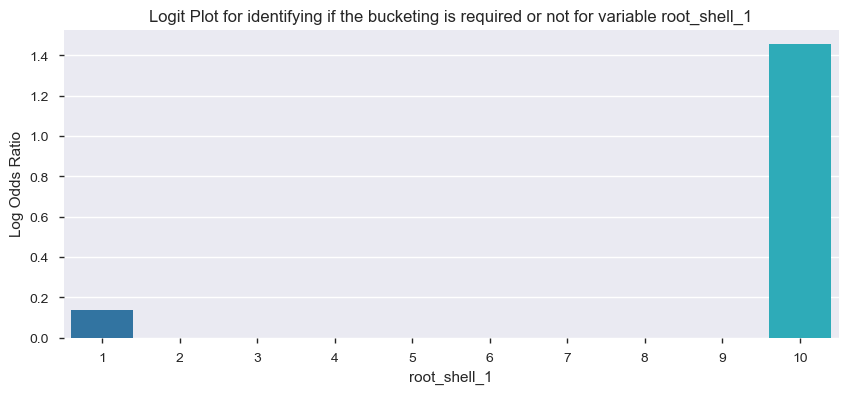

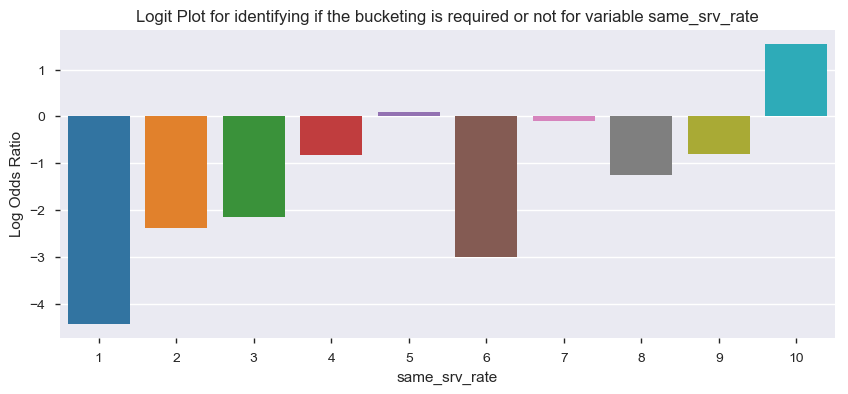

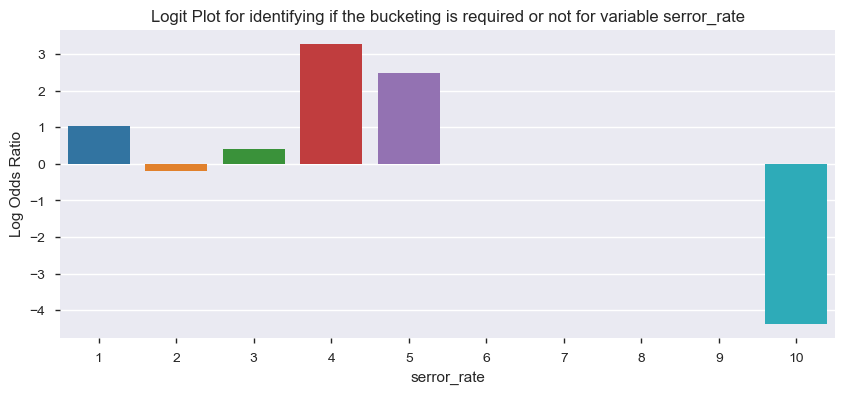

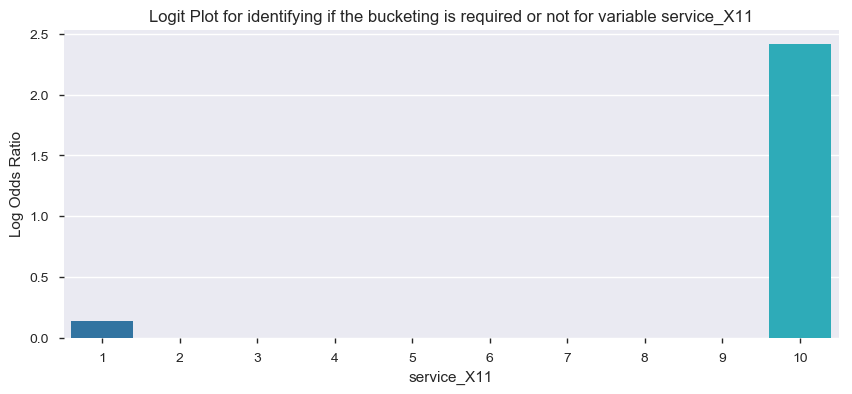

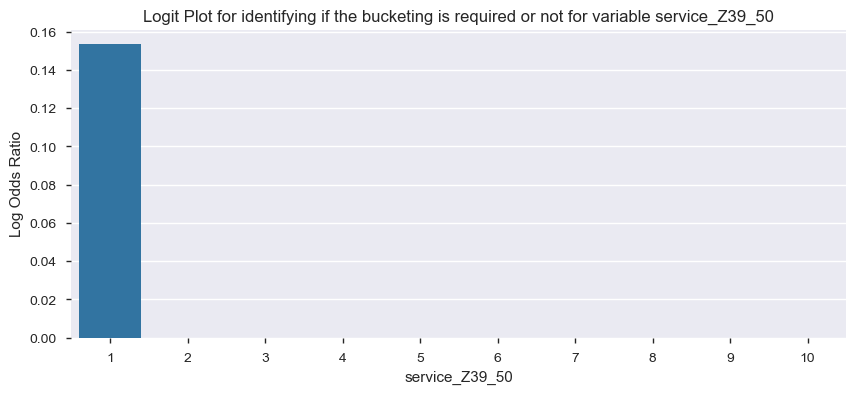

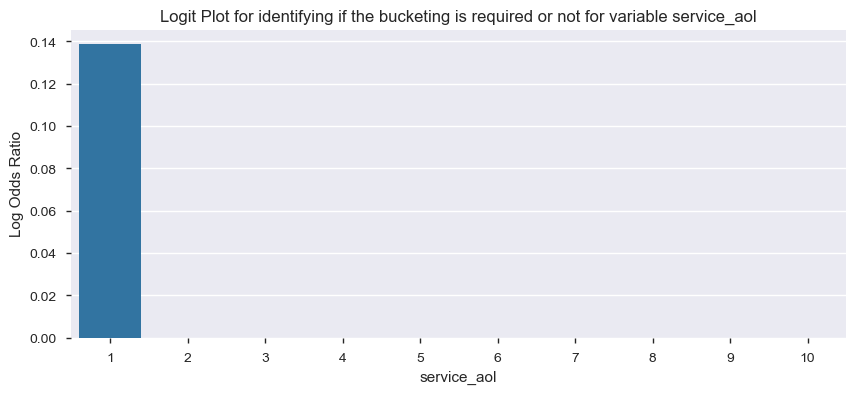

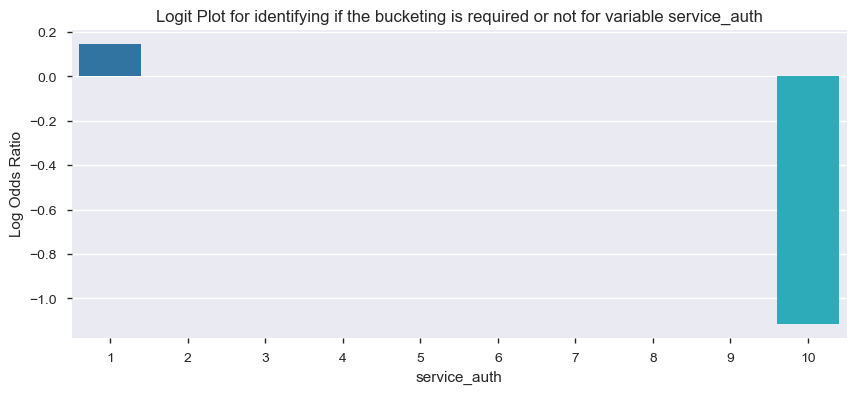

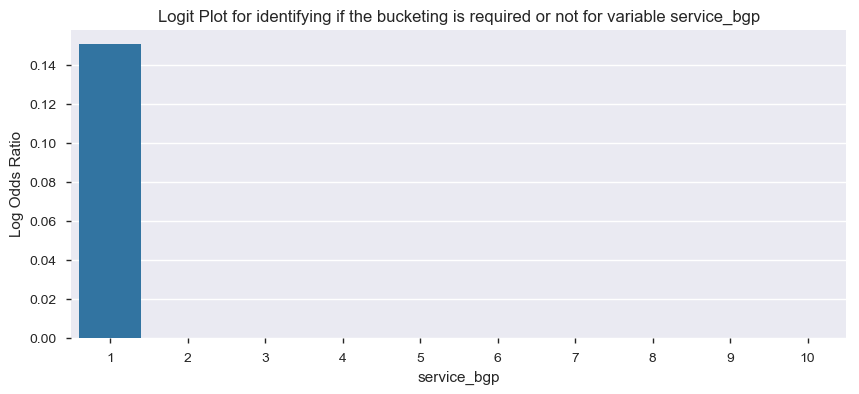

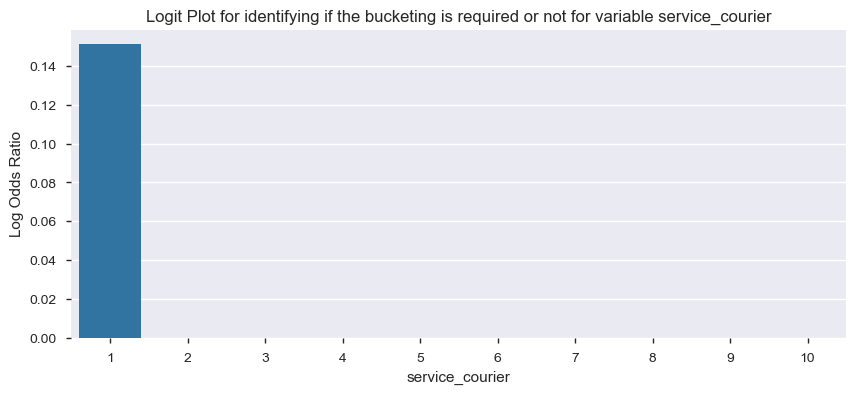

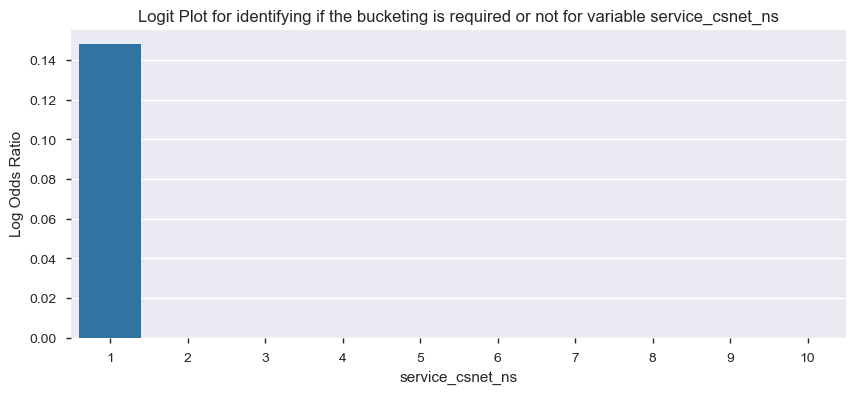

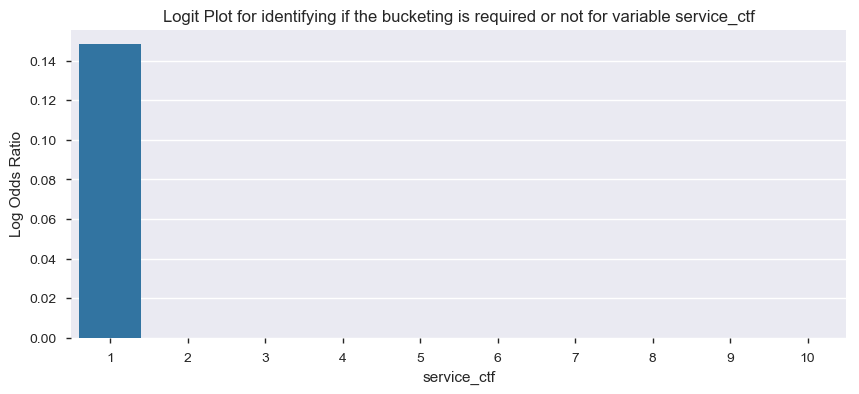

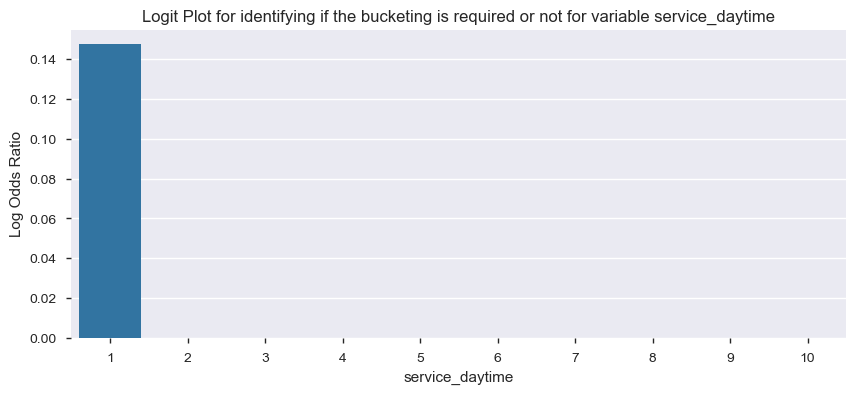

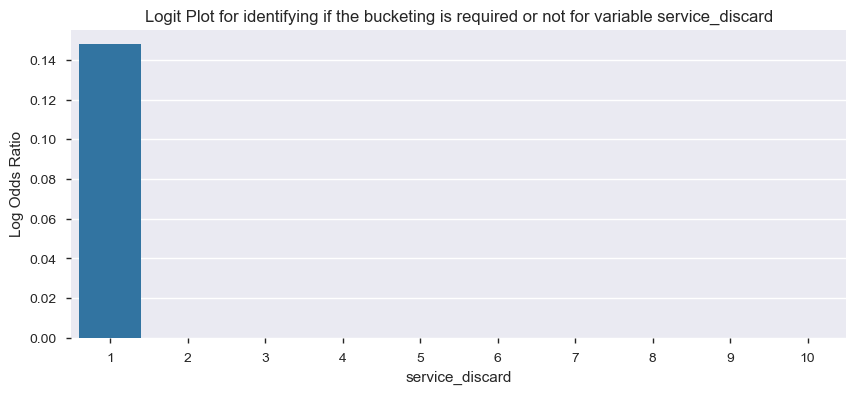

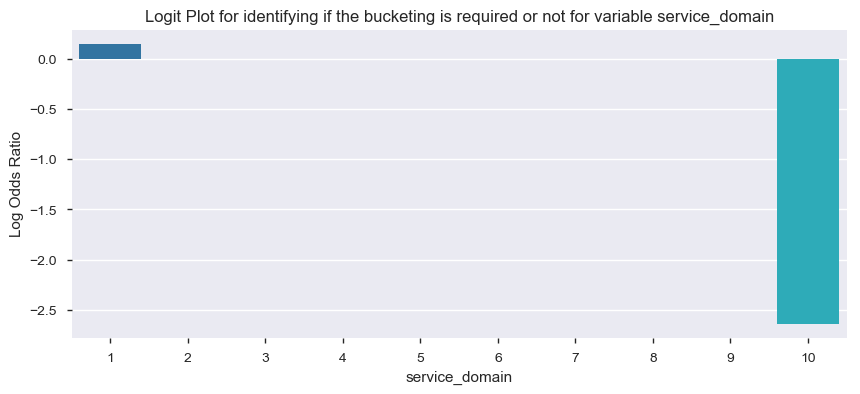

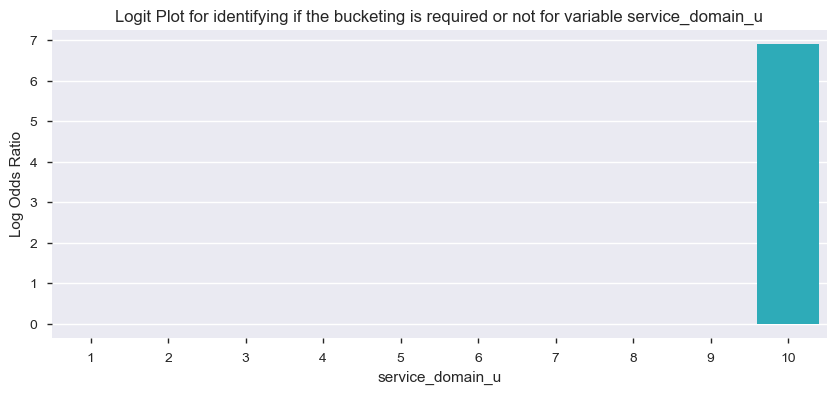

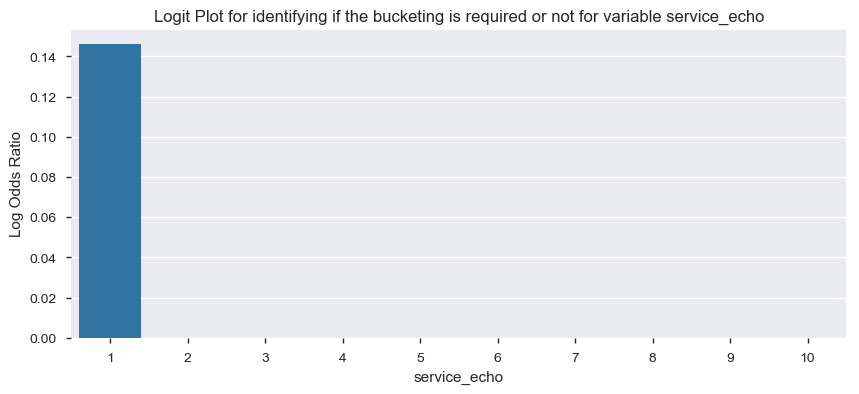

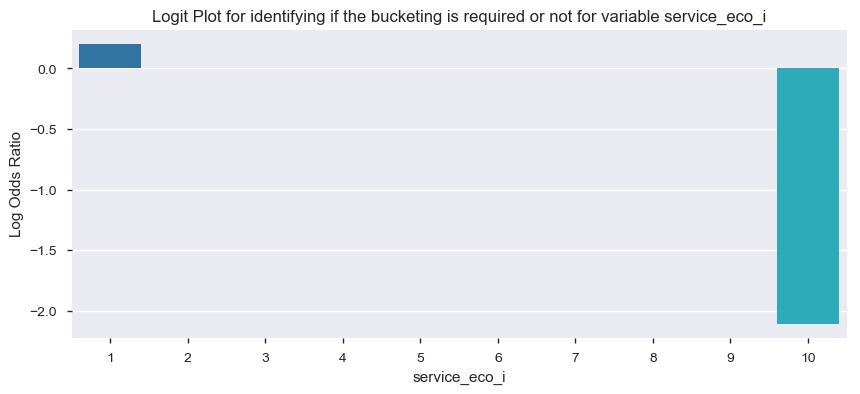

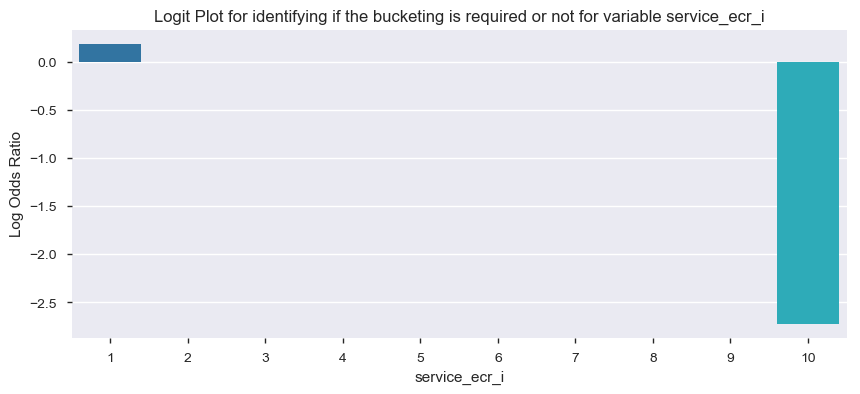

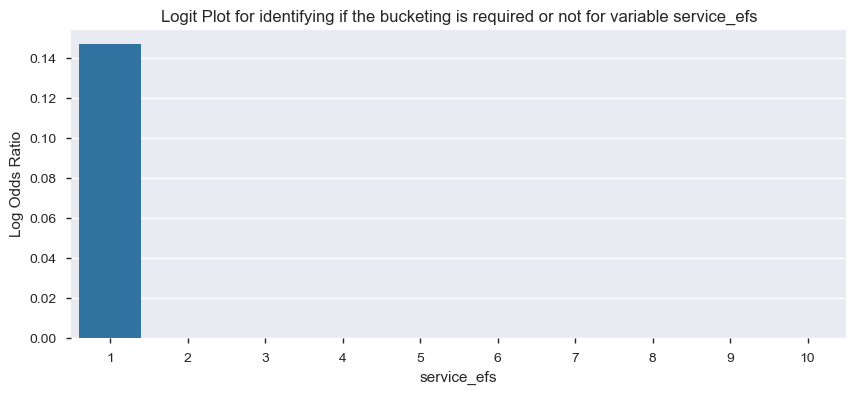

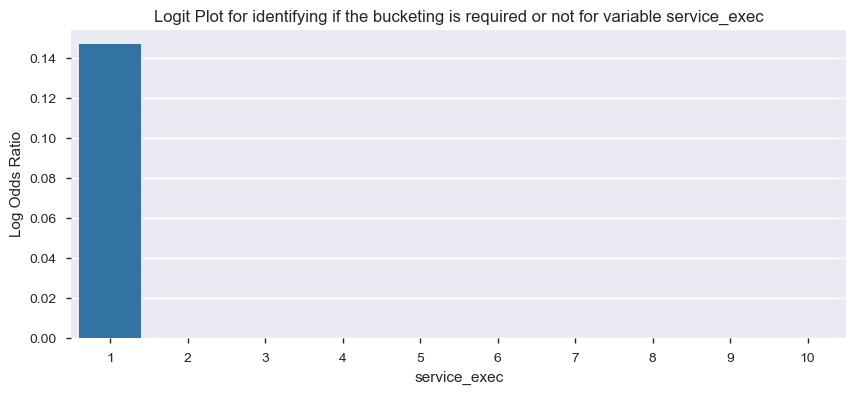

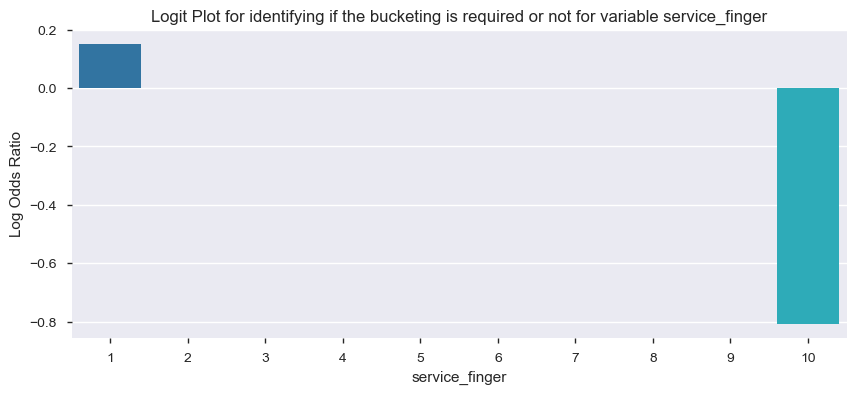

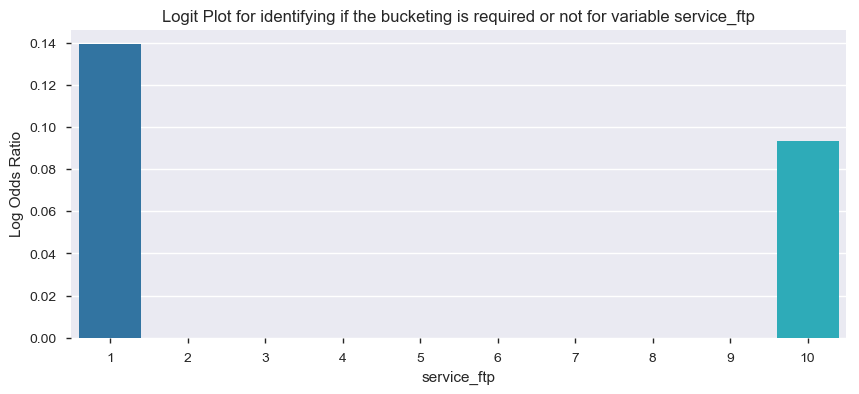

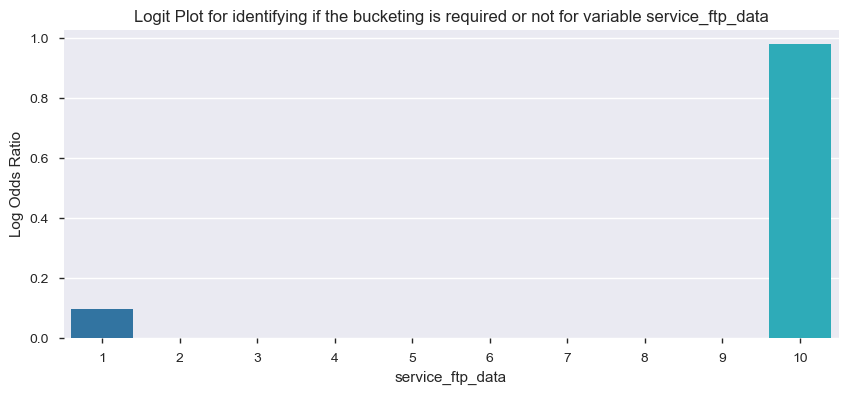

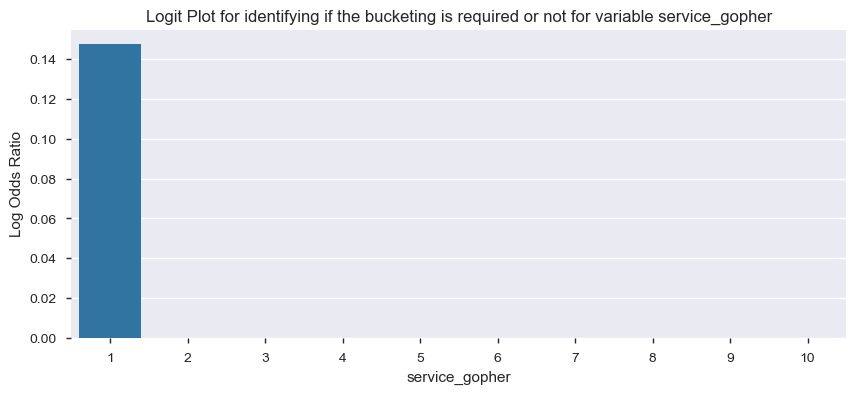

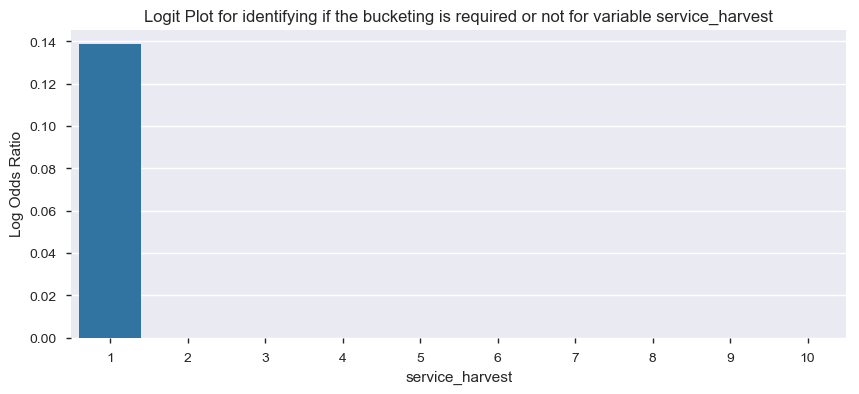

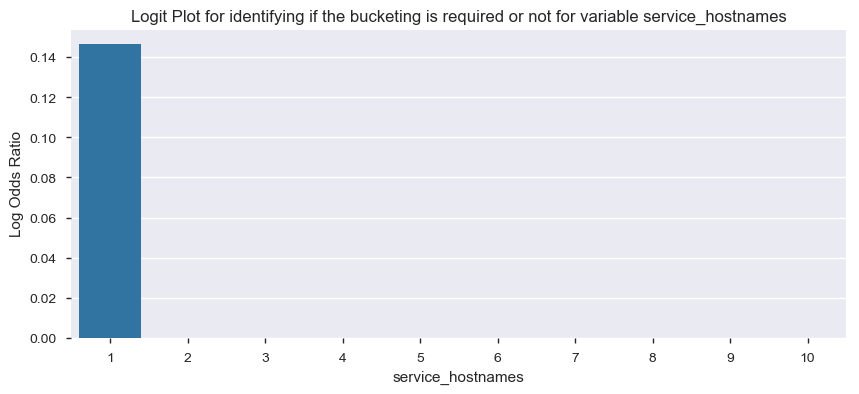

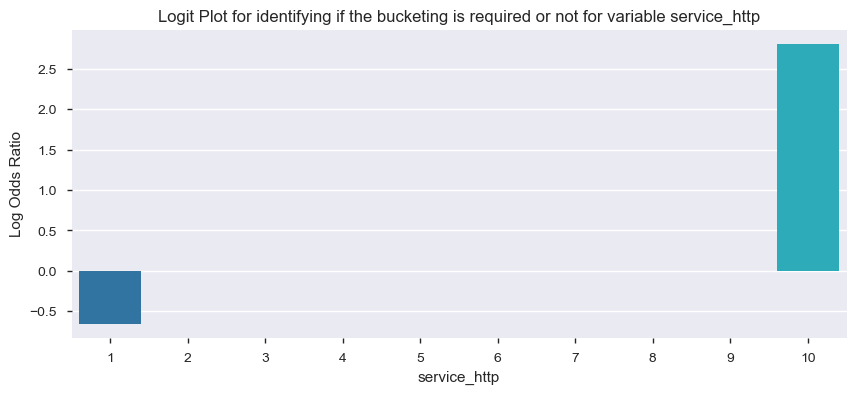

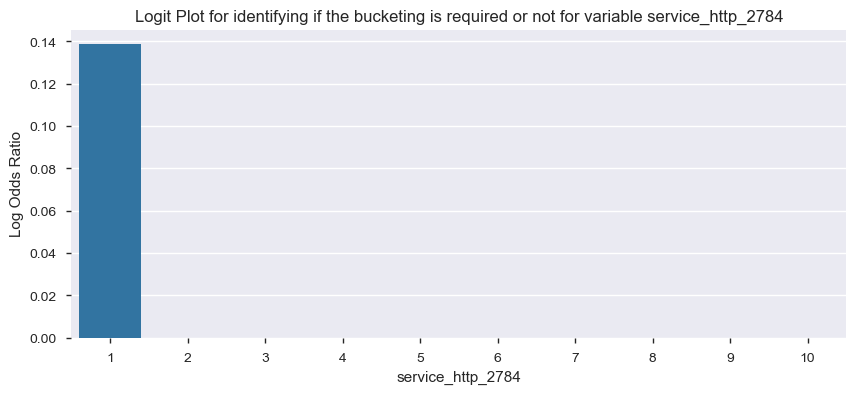

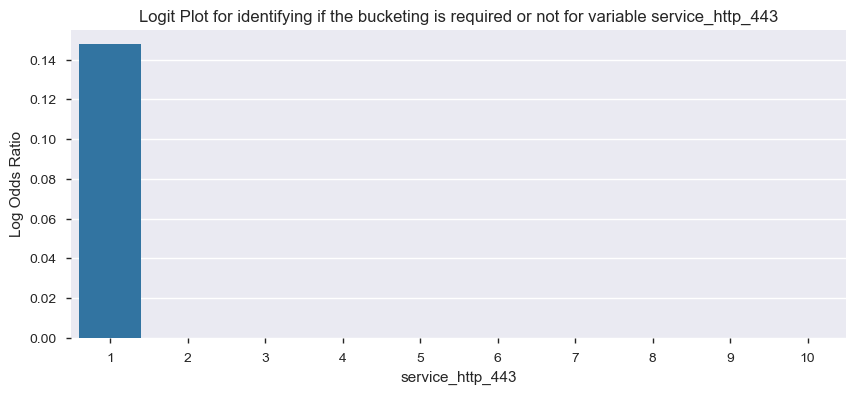

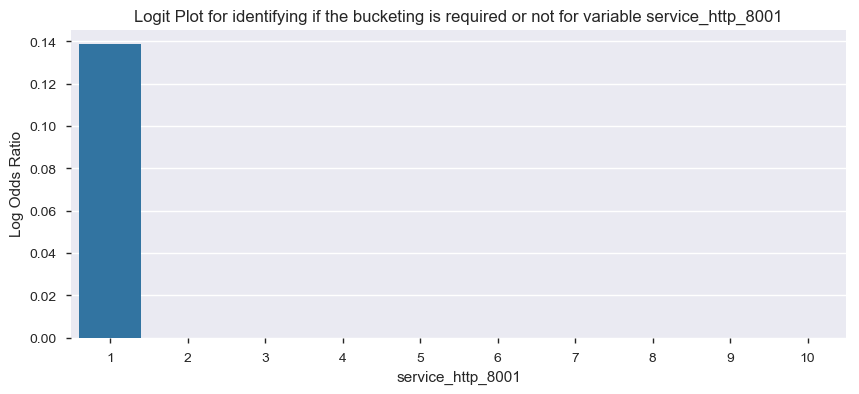

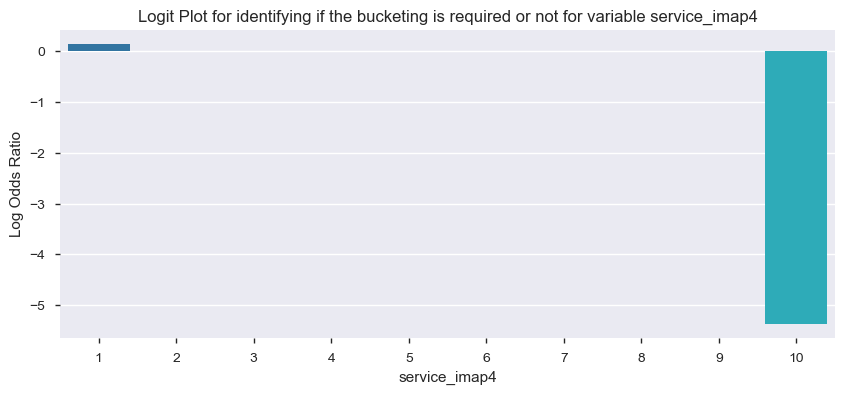

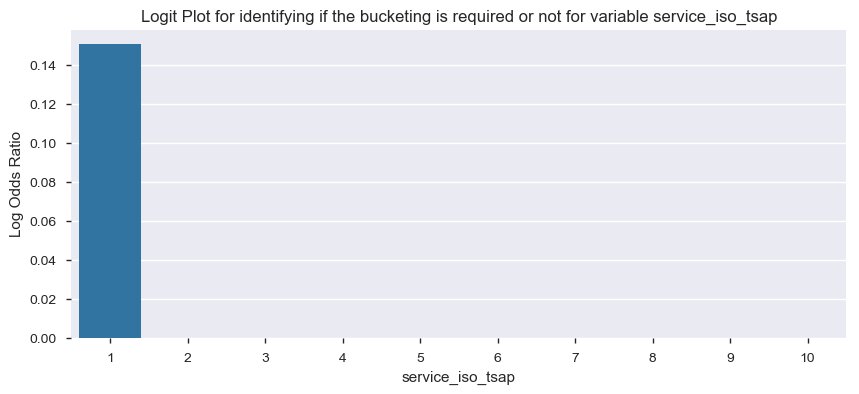

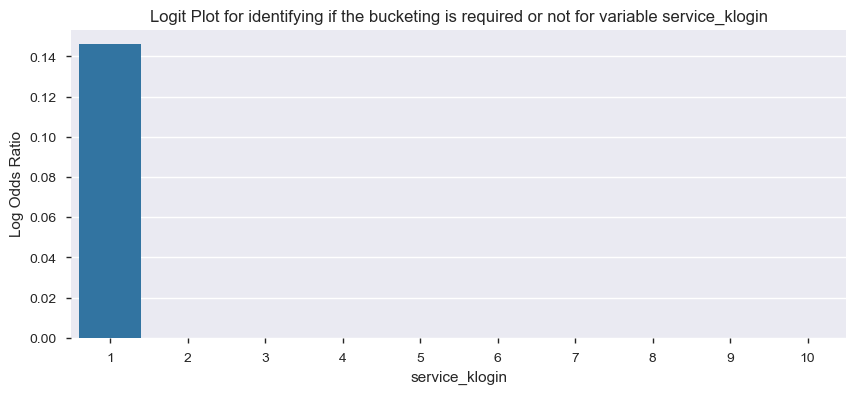

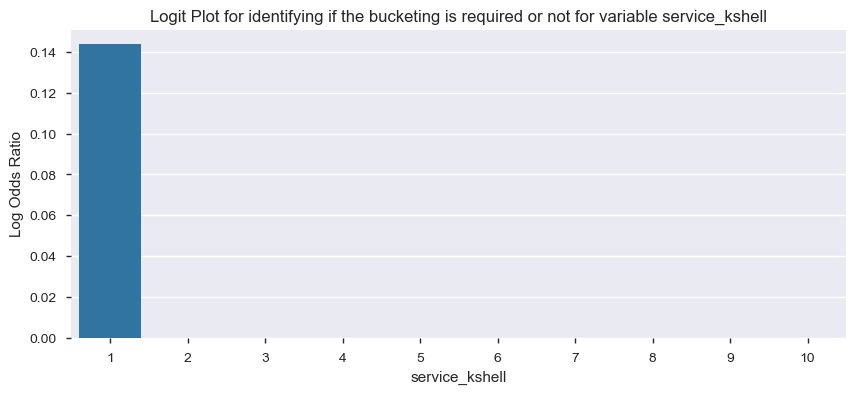

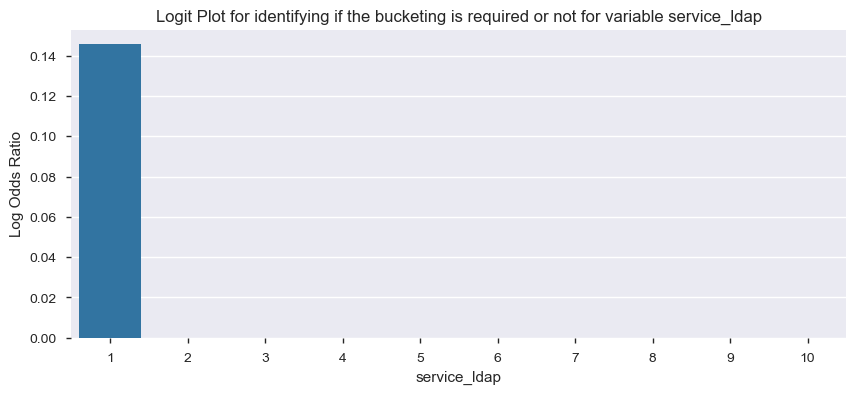

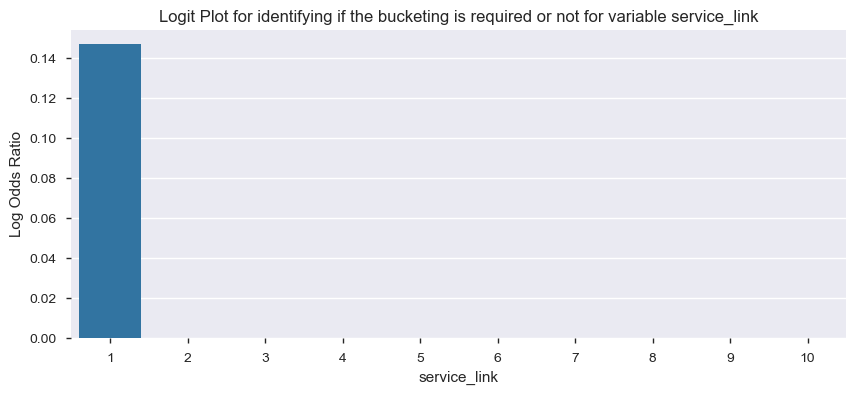

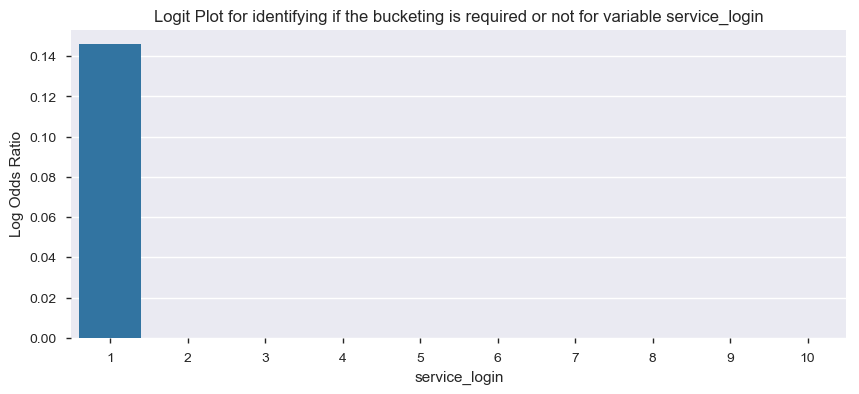

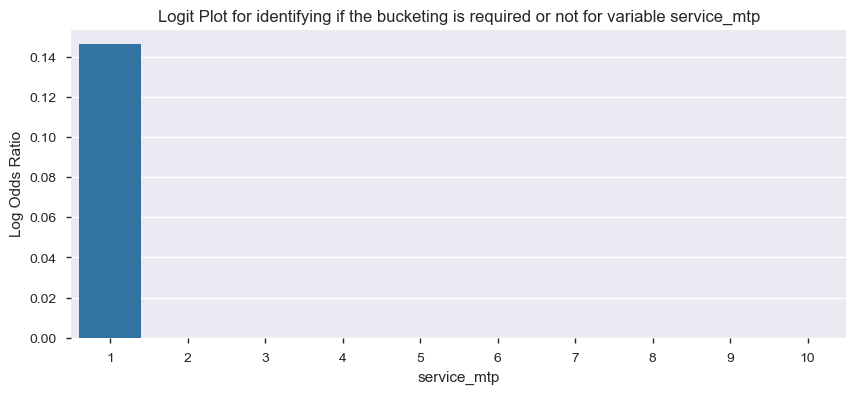

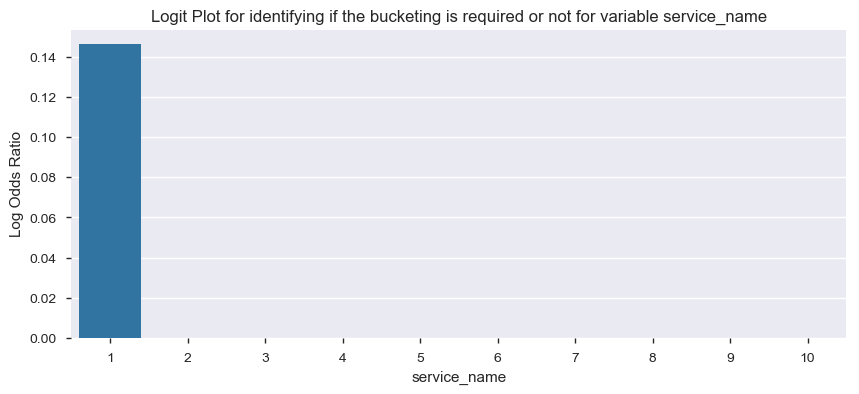

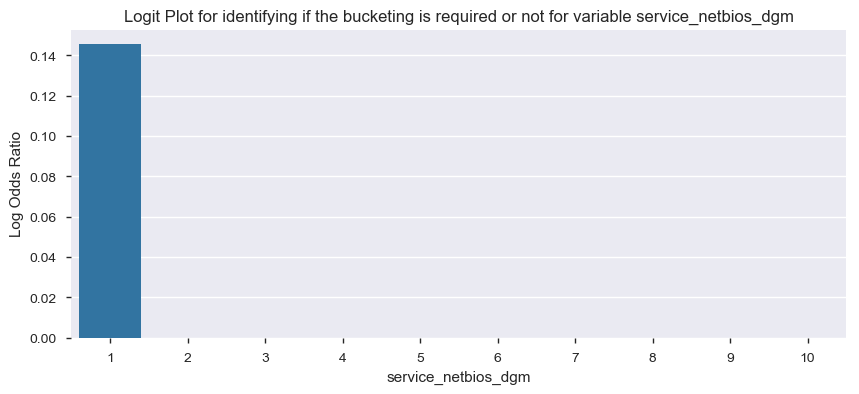

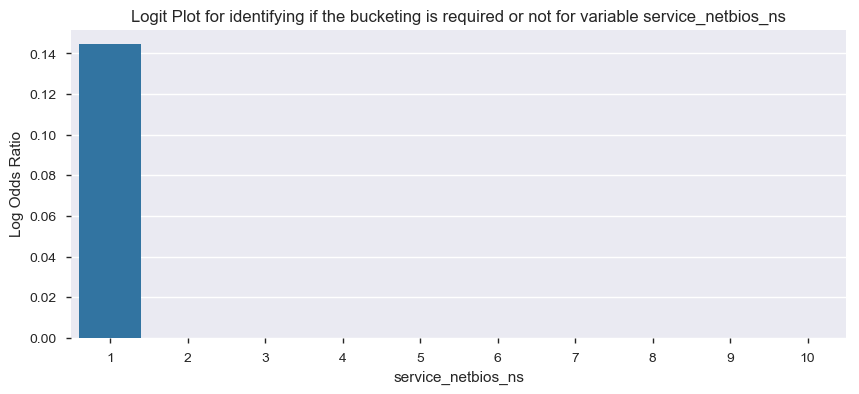

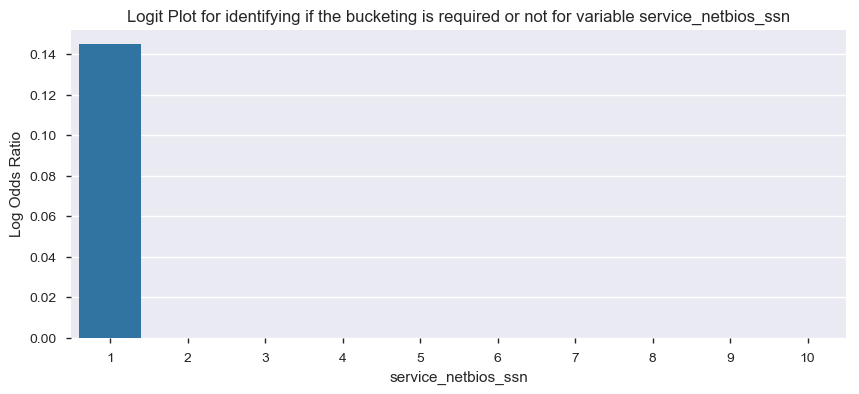

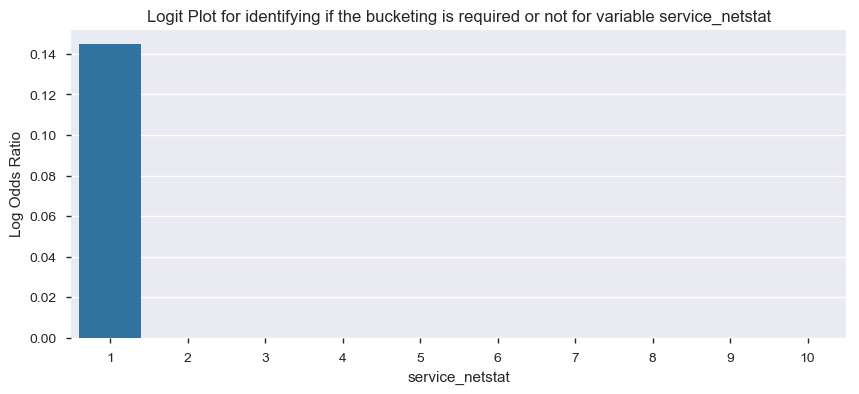

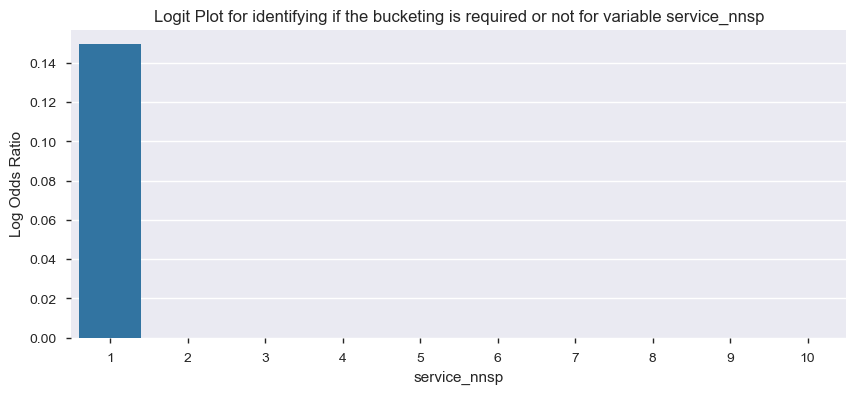

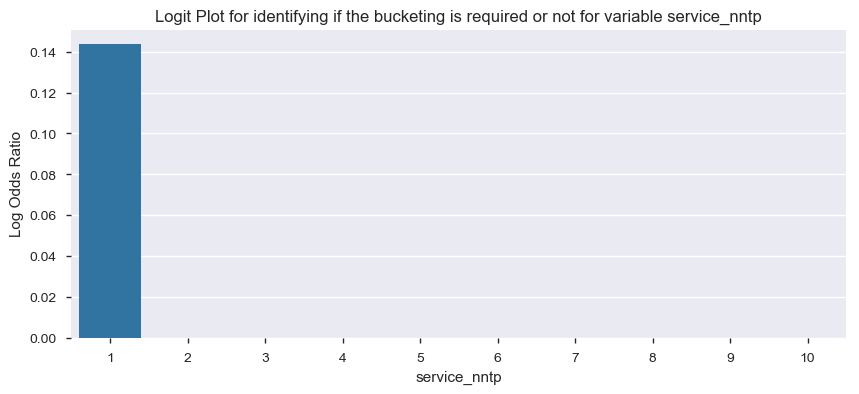

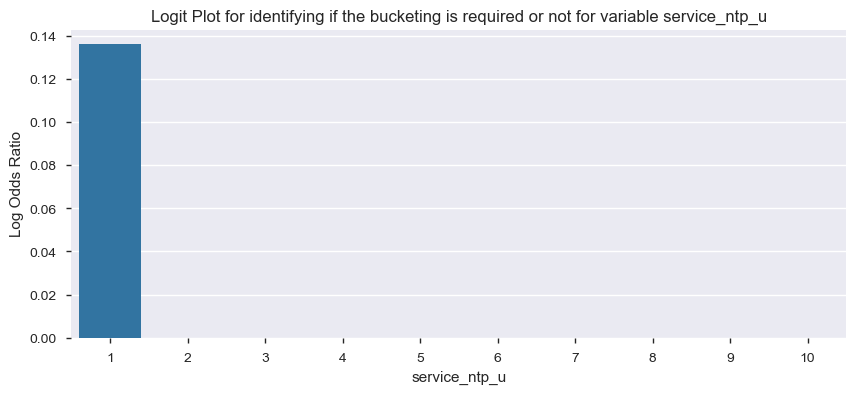

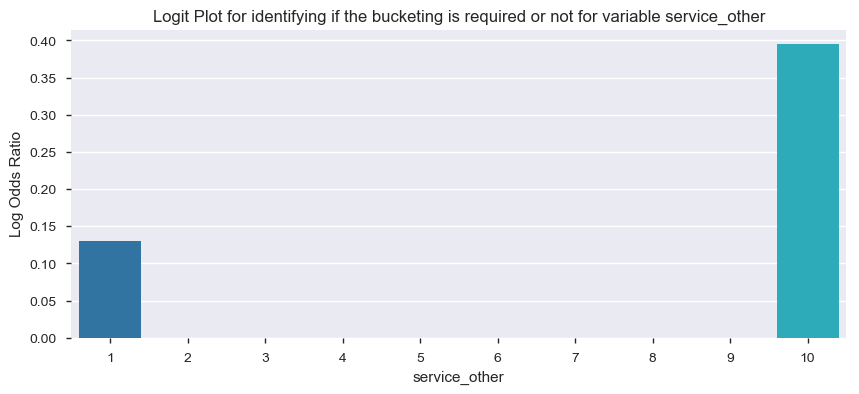

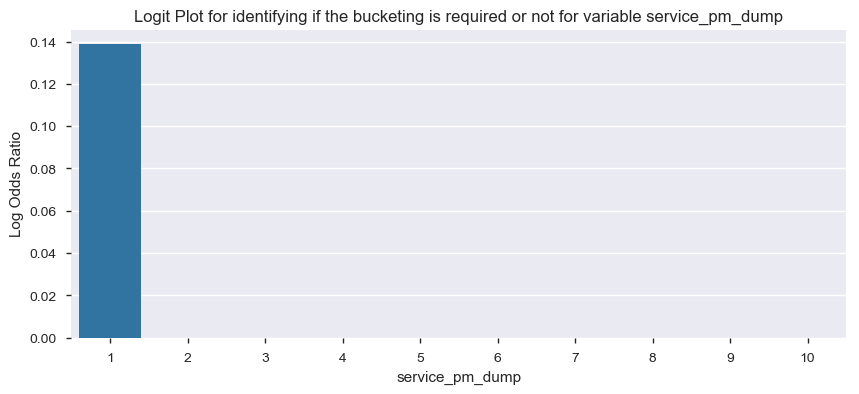

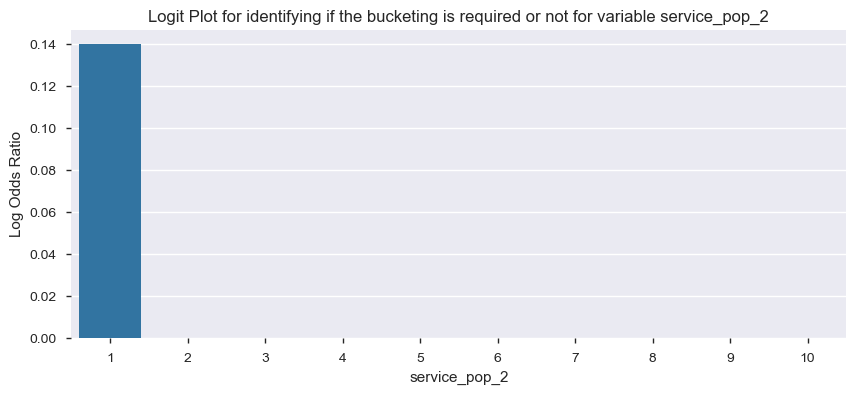

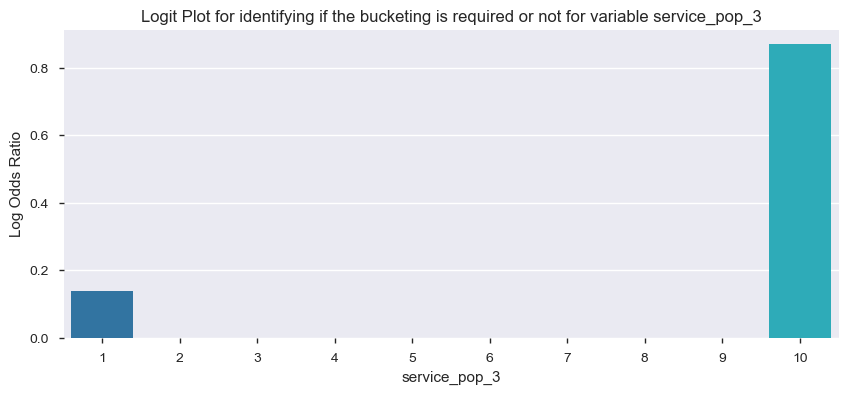

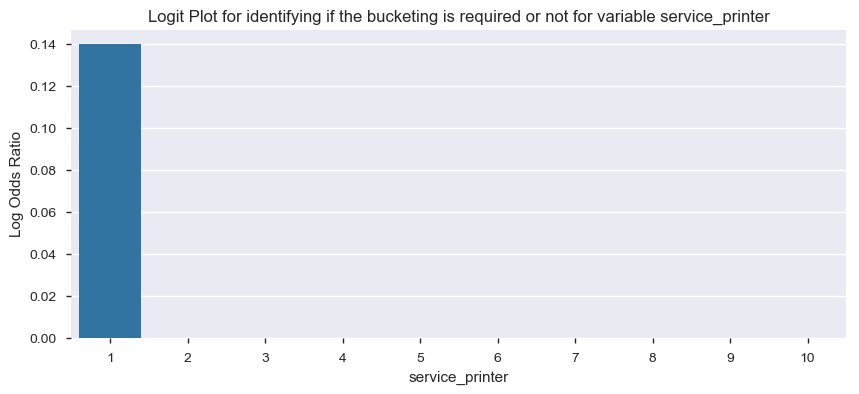

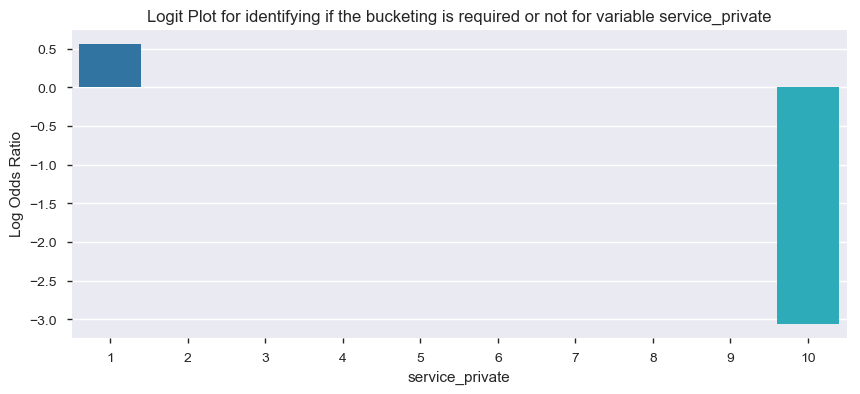

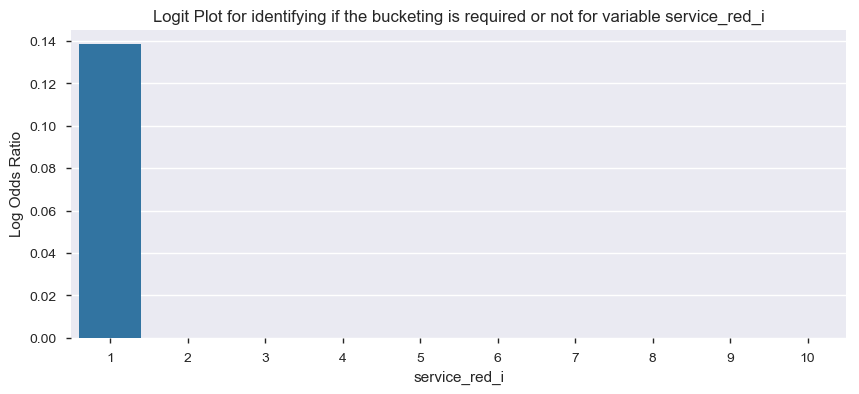

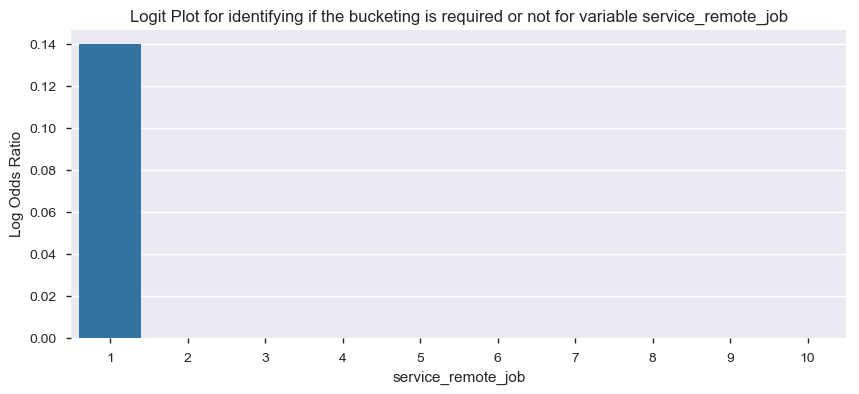

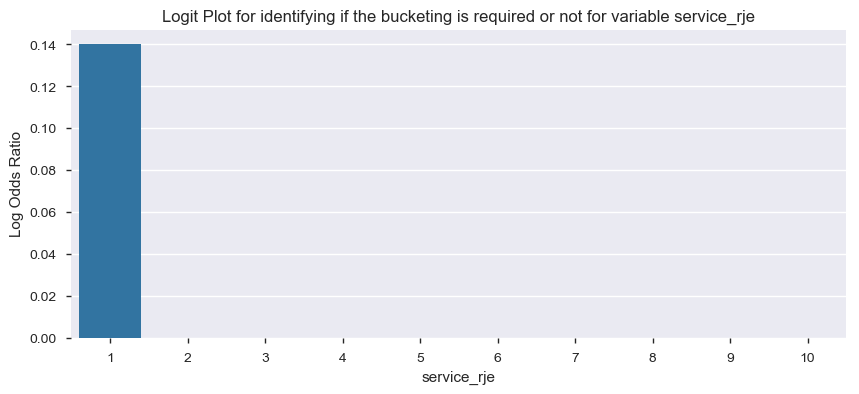

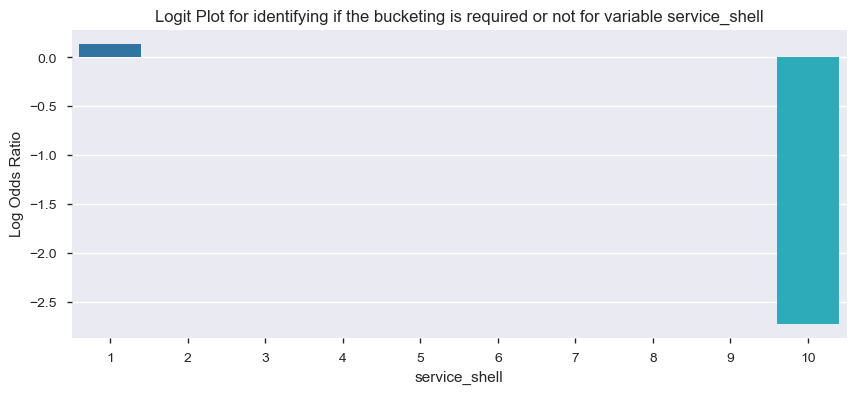

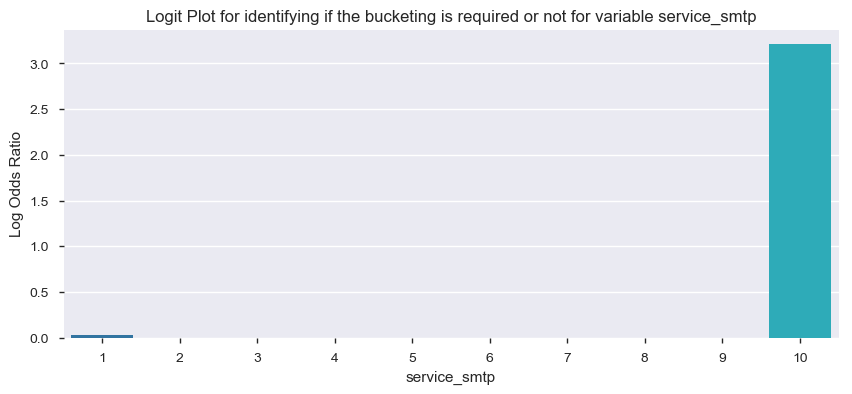

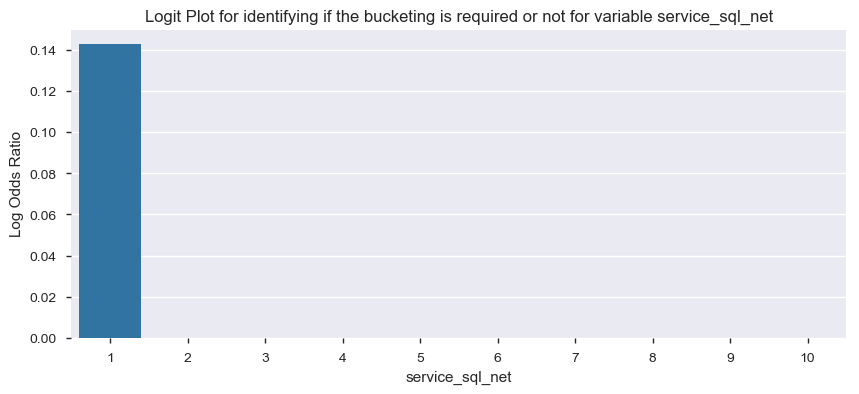

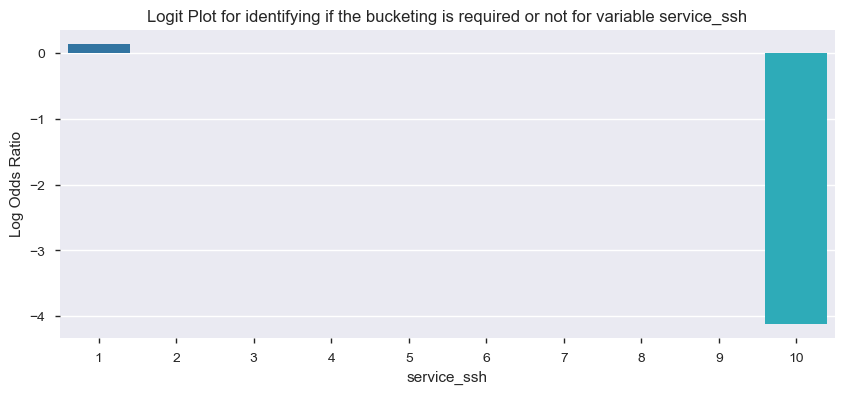

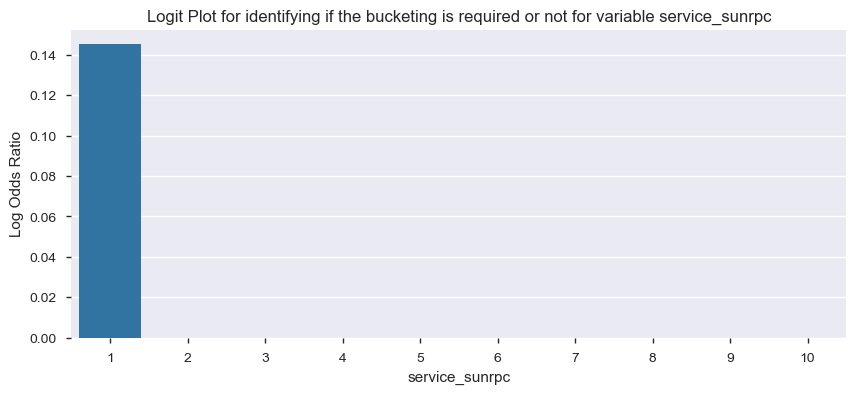

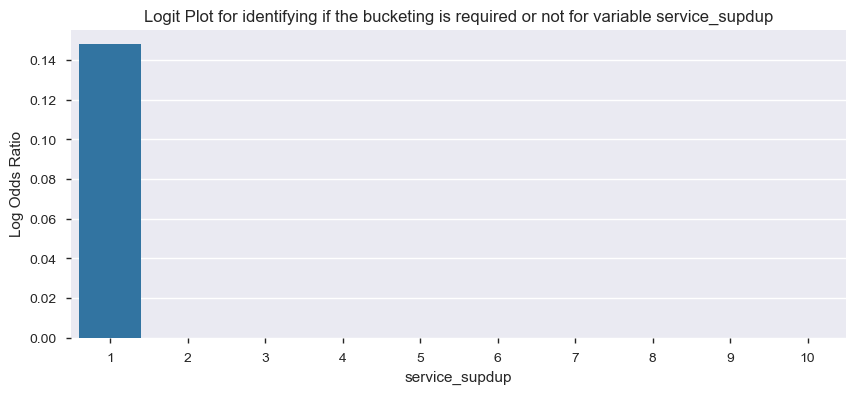

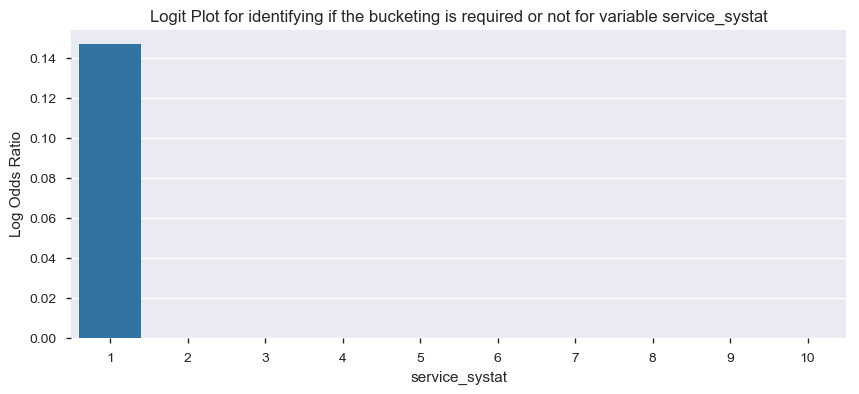

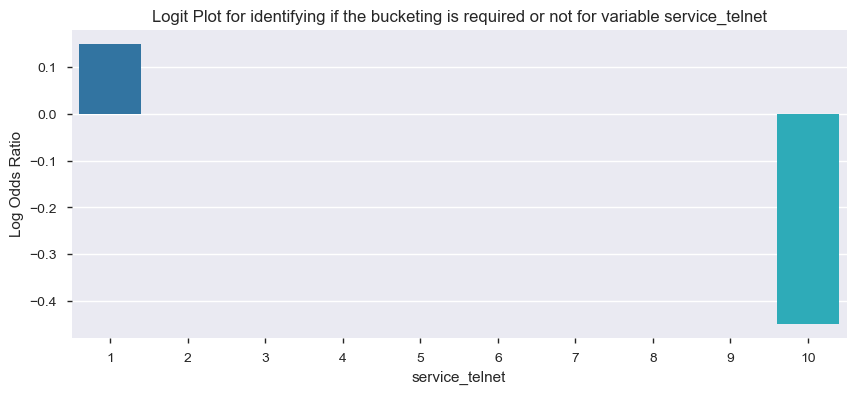

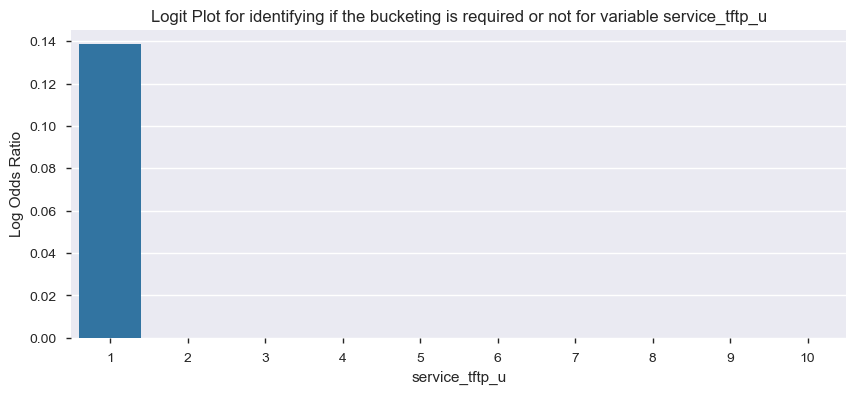

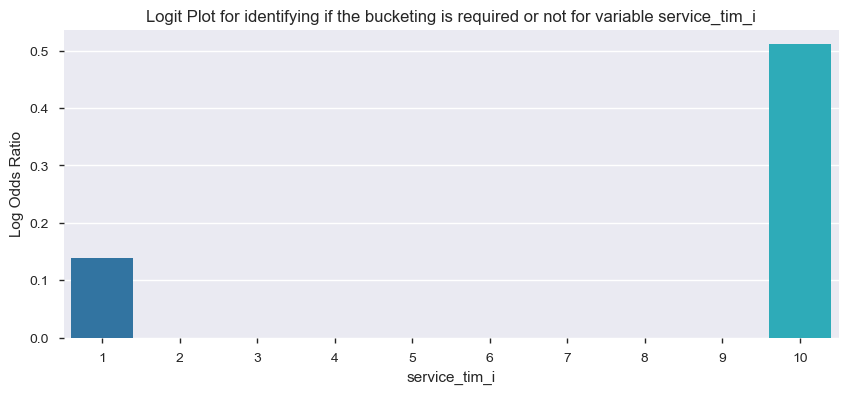

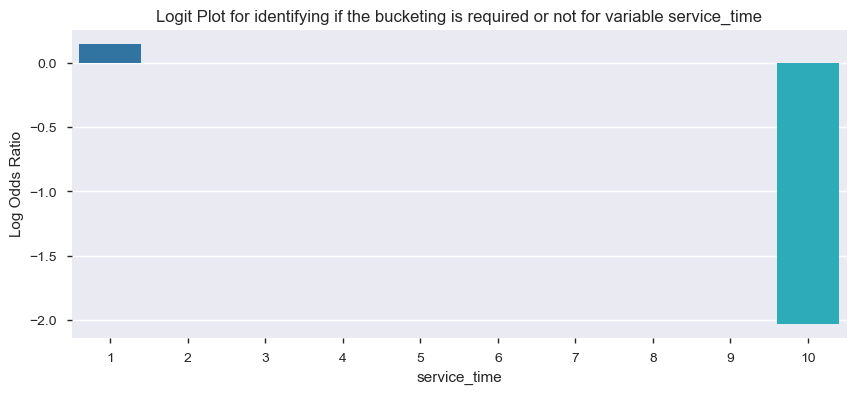

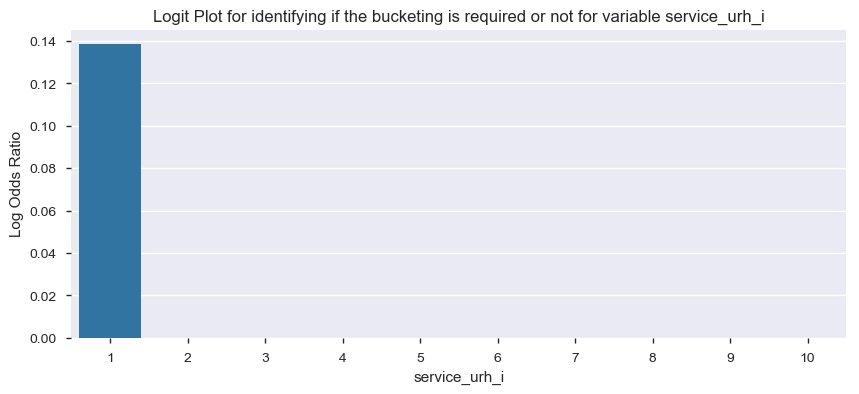

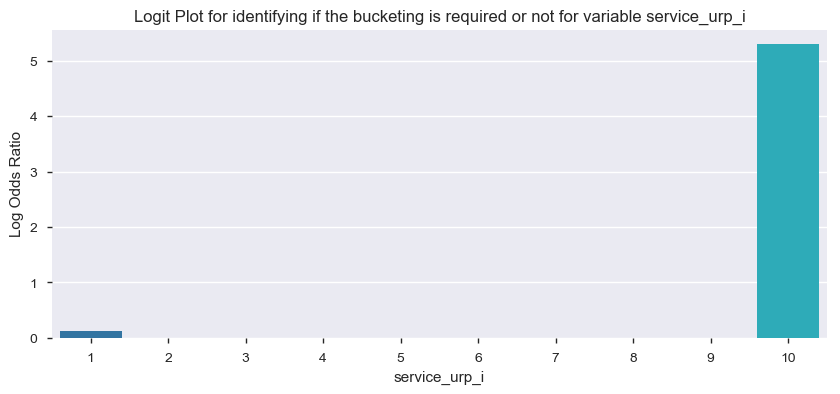

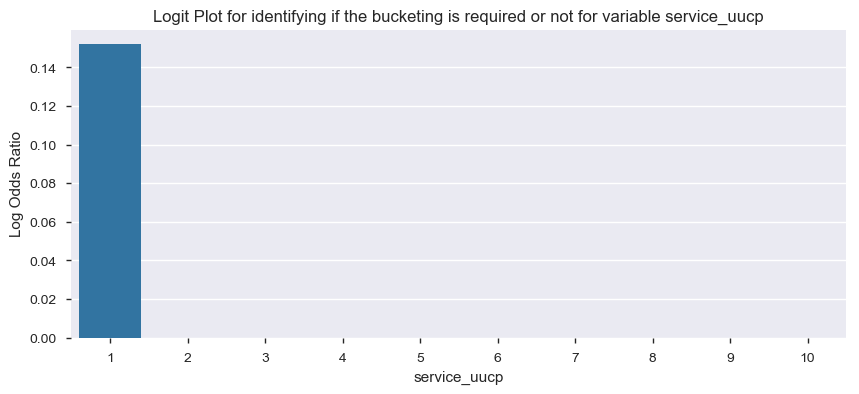

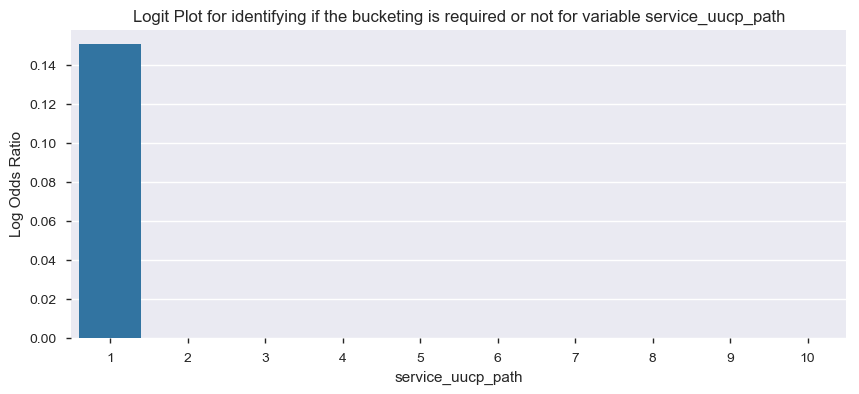

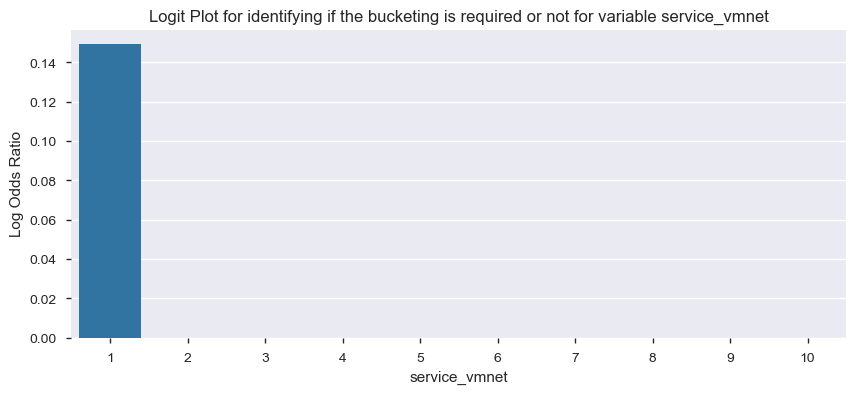

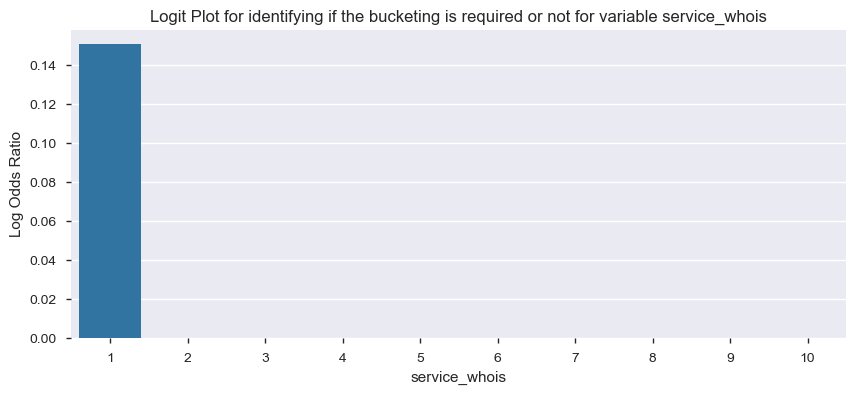

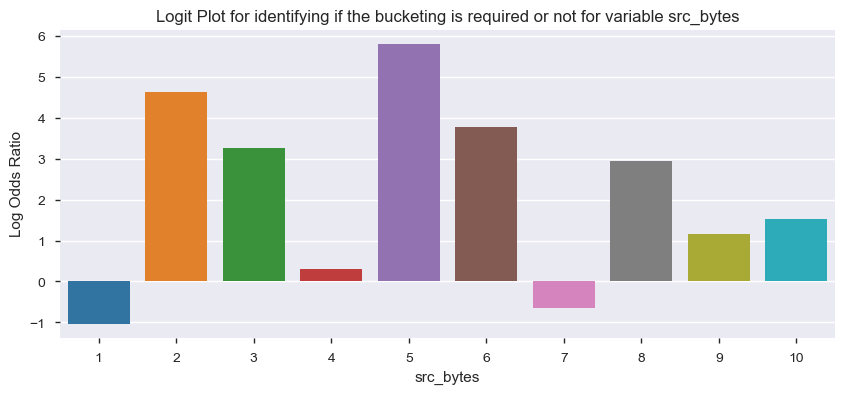

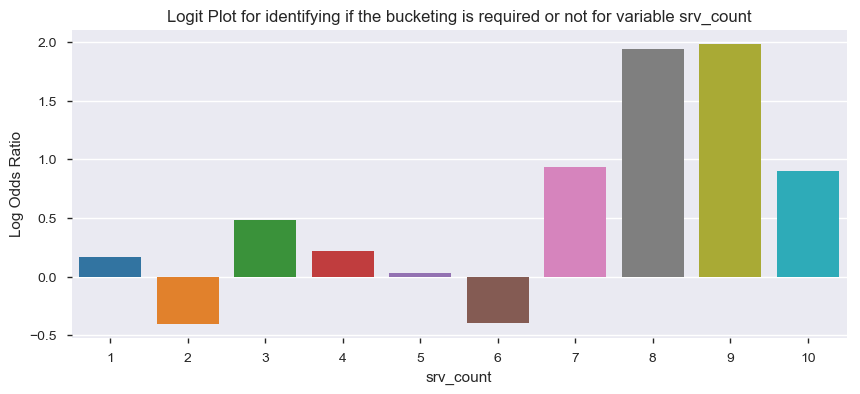

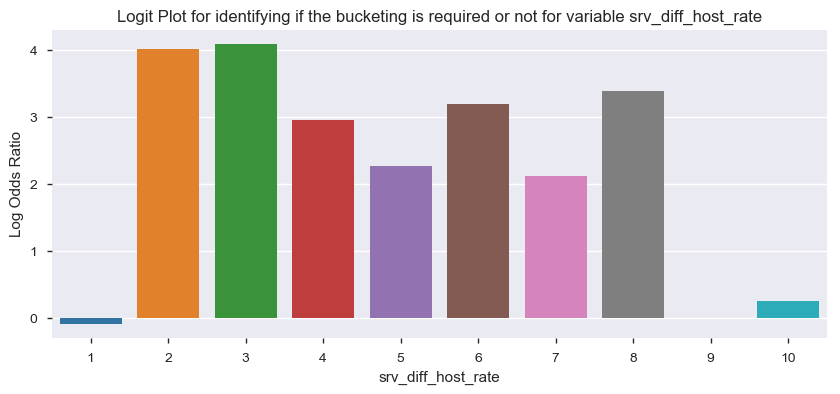

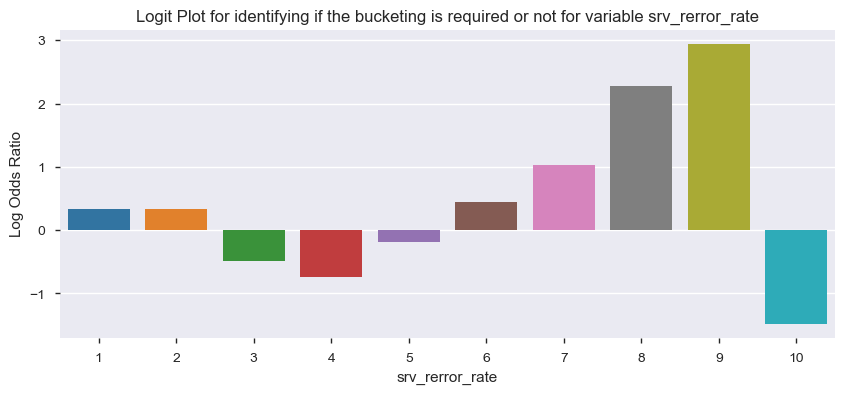

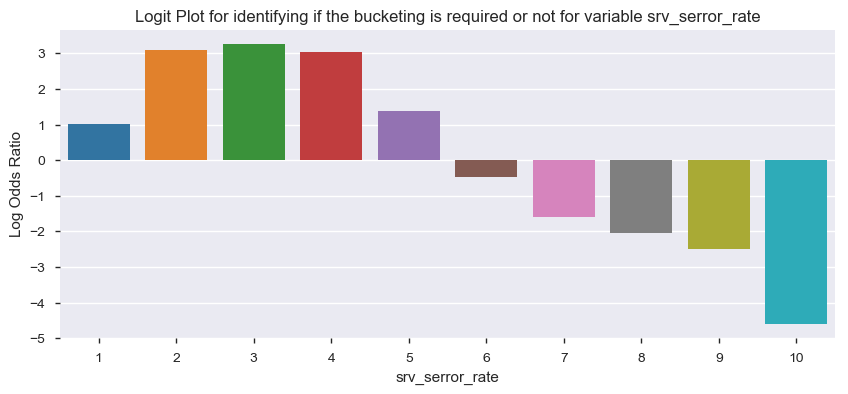

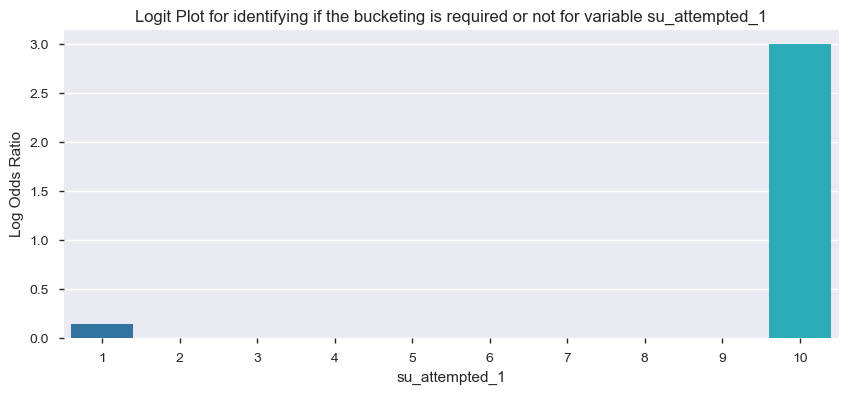

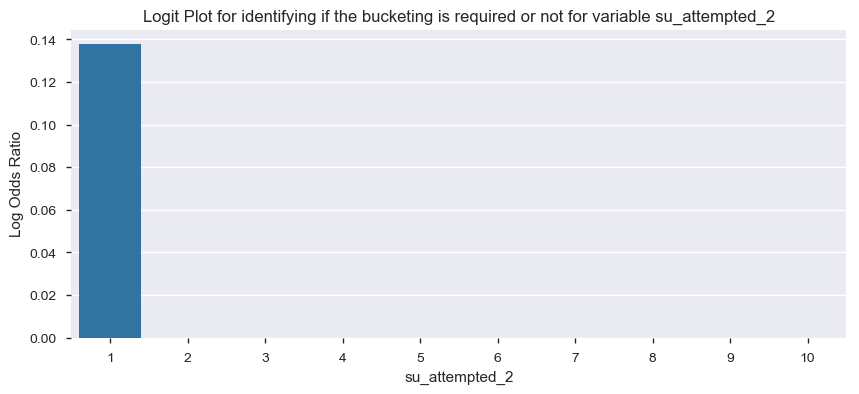

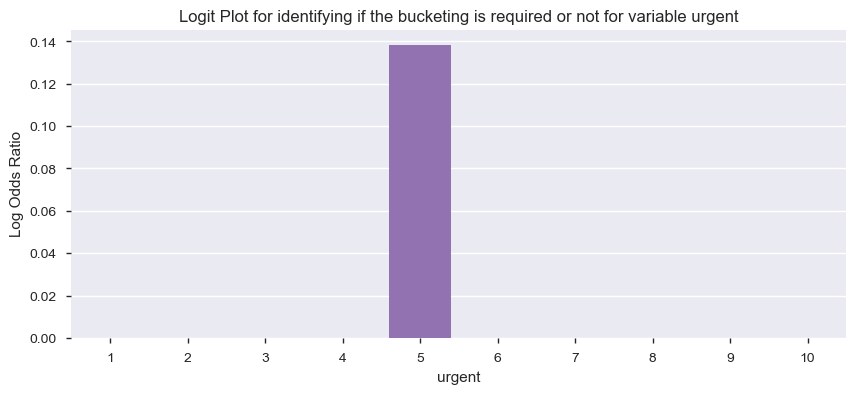

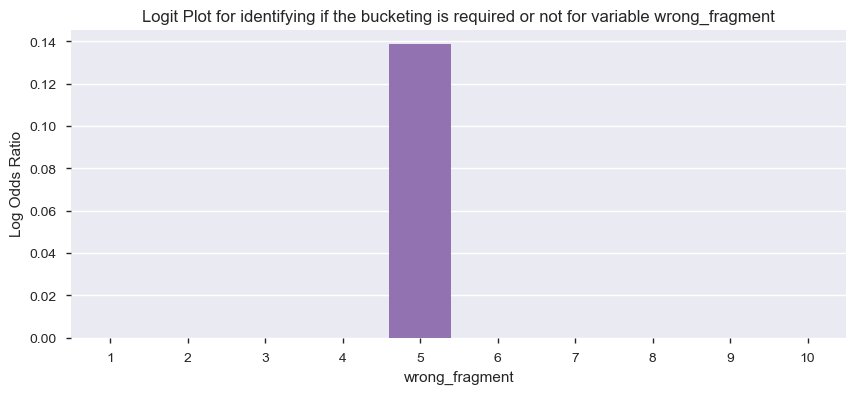

In [127]:
bp = PdfPages('WOE Plots.pdf')

for num_variable in X_data:
    binned = pd.cut(data_updated_with_normal_attack[num_variable], bins=10, labels=list(range(1,11)))
    #binned = binned.dropna()
    odds = data_updated_with_normal_attack.groupby(binned)['attack_normal'].sum() / (data_updated_with_normal_attack.groupby(binned)['attack_normal'].count()-data_updated_with_normal_attack.groupby(binned)['attack_normal'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()

### Somer's D:

In [114]:
somersd_df = pd.DataFrame()
for num_variable in X_data.columns:
    logreg = sm.logit(formula = str('attack_normal ~ ')+str(num_variable), data=data_updated_with_normal_attack)
    result = logreg.fit()
    y_score = pd.DataFrame(result.predict())
    y_score.columns = ['Score']
   
    somers_d = 2*metrics.roc_auc_score(data_updated_with_normal_attack['attack_normal'],y_score) - 1

    temp = pd.DataFrame([num_variable,somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

Optimization terminated successfully.
         Current function value: 0.470910
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.583797
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.590696
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.615097
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.650476
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.657199
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.686483
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.421391
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.435477
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.380618
  

C:\Users\mac\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.680423
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.433831
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.689106
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.690350
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.690615
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.366053
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.689201
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.690753
         Iterations 3


LinAlgError: Singular matrix

In [115]:
somersd_df.sort_values('SomersD', ascending=False, inplace=True)

In [117]:
somersd_df.head(15)

Variable Name   SomersD
0                    dst_bytes  0.797767
0           dst_host_srv_count  0.784961
0                      flag_SF  0.744313
0       dst_host_same_srv_rate  0.730696
0                diff_srv_rate  0.688891
0       dst_host_diff_srv_rate  0.652136
0                        count  0.641482
0         dst_host_serror_rate  0.622378
0                      flag_S0  0.583128
0     dst_host_srv_serror_rate  0.566805
0               dst_host_count  0.414155
0  dst_host_srv_diff_host_rate  0.364887
0         dst_host_rerror_rate  0.166731
0     dst_host_srv_rerror_rate  0.145305
0                     flag_REJ   0.10567

In [128]:
data['flag'].value_counts()

SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64

#### Select K-Best:

In [95]:
X_kbest = SelectKBest(f_classif, k=15).fit(X_data, data_updated[['attack_normal']] )

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 24  30  31  32  33  34  35  36 119 120] are constant.
  UserWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [96]:
type(X_kbest)
X_kbest

SelectKBest(k=15, score_func=<function f_classif at 0x0000013B11E809D8>)

In [97]:
X_kbest.get_support()

array([ True,  True, False, False, False, False, False,  True,  True,
        True, False, False,  True, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False])

In [100]:
X_kbest.scores_

array([7.48790260e+04, 2.29595226e+04, 1.85550472e+04, 2.07155700e+04,
       9.67270260e+03, 8.58291575e+03, 1.08582416e+03, 1.16917277e+05,
       9.30699510e+04, 1.37598575e+05, 6.51441625e+02, 8.64602636e+03,
       9.46460035e+04, 2.38098823e+03, 4.46159944e+03, 9.96512343e+02,
       1.18513146e+02, 2.27187933e+03, 9.22617741e+04, 3.04597014e+02,
       8.28004865e+01, 2.90252349e+01, 1.68332132e+05, 3.04118462e+02,
                  nan, 1.94653654e+02, 8.70616690e-01, 6.51392119e+00,
       2.91001711e+04, 1.14585761e+05,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan, 3.56547671e+02, 6.23608544e+03, 8.64361750e+03,
       5.18580951e+01, 1.63903284e+05, 9.24815048e+04, 4.31288185e+01,
       1.00485986e+03, 2.29726175e+00, 3.20412385e+02, 8.25496735e+02,
       8.53754616e+02, 6.31855941e+02, 6.52926913e+02, 6.03781617e+02,
       6.23665200e+02, 5.04741759e+02, 9.05239880e+03, 5.02206303e+02,
      

In [101]:
# summarize the selection of the attributes
KBest_features=X_data.columns[X_kbest.get_support()]

selected_features_from_KBest = X_data[KBest_features]

In [102]:
selected_features_from_KBest.head()

count  diff_srv_rate  dst_host_same_srv_rate  dst_host_serror_rate  \
0    2.0           0.00                    0.17                  0.00   
1   13.0           0.15                    0.00                  0.00   
2  123.0           0.07                    0.10                  1.00   
3    5.0           0.00                    1.00                  0.03   
4   30.0           0.00                    1.00                  0.00   

   dst_host_srv_count  dst_host_srv_serror_rate  flag_S0  flag_SF  last_flag  \
0                25.0                      0.00        0        1       20.0   
1                 1.0                      0.00        0        1       15.0   
2                26.0                      1.00        1        0       19.0   
3               255.0                      0.01        0        1       21.0   
4               255.0                      0.00        0        1       21.0   

   logged_in_1  same_srv_rate  serror_rate  service_http  service_private  \
0            0           1.00          0.0             0                0   
1            0           0.08          0.0             0                0   
2            0           0.05          1.0             0                1   
3            1           1.00          0.2             1                0   
4            1           1.00          0.0             1                0   

   srv_serror_rate  
0              0.0  
1              0.0  
2              1.0  
3              0.2  
4              0.0

#### RFE:

In [85]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_data, data_updated[['attack_normal']] )

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed 

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

In [86]:
print(rfe.support_)
print(rfe.ranking_)

[False  True False False False  True False False False False False False
  True False  True False False False False  True False False False False
 False  True False False False False False False False False False False
 False False False False False  True False False False False False False
 False False  True False False False False False  True  True False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True False False False
 False]
[ 86   1  93  90  13   1   9  74  51  89  83  71   1  80   1   4  47  59
  14   1  64  53  48  54 103   1  85  11  60  15 101 100 104 105  99 102
  98  67  68  66  32   1  79  55  21  94  73  26  23  20   1  30  39  58
  45  29   1   1  28  52  75  81  63   1  9

In [131]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X_data.columns, rfe.get_support())]
feature_map

[('count', False),
 ('diff_srv_rate', True),
 ('dst_bytes', False),
 ('dst_host_count', False),
 ('dst_host_diff_srv_rate', False),
 ('dst_host_rerror_rate', True),
 ('dst_host_same_src_port_rate', False),
 ('dst_host_same_srv_rate', False),
 ('dst_host_serror_rate', False),
 ('dst_host_srv_count', False),
 ('dst_host_srv_diff_host_rate', False),
 ('dst_host_srv_rerror_rate', False),
 ('dst_host_srv_serror_rate', True),
 ('duration', False),
 ('flag_REJ', True),
 ('flag_RSTO', False),
 ('flag_RSTOS0', False),
 ('flag_RSTR', False),
 ('flag_S0', False),
 ('flag_S1', True),
 ('flag_S2', False),
 ('flag_S3', False),
 ('flag_SF', False),
 ('flag_SH', False),
 ('hot', False),
 ('is_guest_login_1', True),
 ('is_host_login_1', False),
 ('land_1', False),
 ('last_flag', False),
 ('logged_in_1', False),
 ('num_access_files', False),
 ('num_compromised', False),
 ('num_failed_logins', False),
 ('num_file_creations', False),
 ('num_outbound_cmds', False),
 ('num_root', False),
 ('num_shells', Fal

In [88]:
#Alternative of capturing the important variables
RFE_features=X_data.columns[rfe.get_support()]
RFE_features

Index(['diff_srv_rate', 'dst_host_rerror_rate', 'dst_host_srv_serror_rate',
       'flag_REJ', 'flag_S1', 'is_guest_login_1', 'same_srv_rate',
       'service_ctf', 'service_eco_i', 'service_ecr_i', 'service_gopher',
       'service_nntp', 'service_private', 'srv_rerror_rate',
       'srv_serror_rate'],
      dtype='object')

In [89]:
selected_features_from_rfe = X_data[RFE_features]

In [91]:
selected_features_from_rfe.head()

diff_srv_rate  dst_host_rerror_rate  dst_host_srv_serror_rate  flag_REJ  \
0           0.00                  0.05                      0.00         0   
1           0.15                  0.00                      0.00         0   
2           0.07                  0.00                      1.00         0   
3           0.00                  0.00                      0.01         0   
4           0.00                  0.00                      0.00         0   

   flag_S1  is_guest_login_1  same_srv_rate  service_ctf  service_eco_i  \
0        0                 0           1.00            0              0   
1        0                 0           0.08            0              0   
2        0                 0           0.05            0              0   
3        0                 0           1.00            0              0   
4        0                 0           1.00            0              0   

   service_ecr_i  service_gopher  service_nntp  service_private  \
0              0               0             0                0   
1              0               0             0                0   
2              0               0             0                1   
3              0               0             0                0   
4              0               0             0                0   

   srv_rerror_rate  srv_serror_rate  
0              0.0              0.0  
1              0.0              0.0  
2              0.0              1.0  
3              0.0              0.2  
4              0.0              0.0

### VIF:-

In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [184]:
a,b = dmatrices(formula_like='attack_normal ~ src_bytes+dst_bytes+logged_in_1+diff_srv_rate+flag_SF+dst_host_srv_count+count+dst_host_diff_srv_rate', data = data_updated_with_normal_attack, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

print(vif)

   VIF Factor                features
0    9.181094               Intercept
1    1.614148               src_bytes
2    1.461899               dst_bytes
3    2.974072             logged_in_1
4    1.433905           diff_srv_rate
5    2.784394                 flag_SF
6    2.738654      dst_host_srv_count
7    1.764821                   count
8    1.384521  dst_host_diff_srv_rate


2nd try(going with this,after VIF version):
<br>
''' diff_srv_rate,flag_REJ,flag_S0,flag_SF,dst_host_rerror_rate,service_private,service_http,same_srv_rate,dst_host_serror_rate,count,logged_in_1''''
'''diff_srv_rate+flag_REJ+flag_SF+dst_host_rerror_rate+service_private+service_http+same_srv_rate+count+logged_in_1'''


3rd try(from RF):
'src_bytes','dst_bytes','same_srv_rate','logged_in_1','dst_host_same_srv_rate','diff_srv_rate','flag_SF','dst_host_srv_count','count','dst_host_diff_srv_rate'
''''src_bytes','dst_bytes','logged_in_1','diff_srv_rate','flag_SF','dst_host_srv_count','count','dst_host_diff_srv_rate''''

## Model Building:-

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
train, test = train_test_split(data_updated_with_normal_attack, test_size=0.3, random_state=0)

In [71]:
X_finalise_df =data_updated[['diff_srv_rate','flag_REJ','flag_SF','dst_host_rerror_rate','service_private','service_http','same_srv_rate','count','logged_in_1']]

In [72]:
X = X_finalise_df
y = data_updated_with_normal_attack[['attack_normal']]
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.3, random_state=0)

In [73]:
train_X_train = data_updated[['diff_srv_rate','flag_REJ','flag_SF','dst_host_rerror_rate','service_private','service_http','same_srv_rate','count','logged_in_1']]
train_Y_train = data_updated_with_normal_attack[['attack_normal']]

In [74]:
test_X_test = test_data_updated[['diff_srv_rate','flag_REJ','flag_SF','dst_host_rerror_rate','service_private','service_http','same_srv_rate','count','logged_in_1']]
test_Y_test = test_data_updated_with_normal_attack['attack_normal']

In [185]:
train_X_train_mod = data_updated[['src_bytes','dst_bytes','logged_in_1','diff_srv_rate','flag_SF','dst_host_srv_count','count','dst_host_diff_srv_rate']]

In [186]:
test_X_test_mod = test_data_updated[['src_bytes','dst_bytes','logged_in_1','diff_srv_rate','flag_SF','dst_host_srv_count','count','dst_host_diff_srv_rate']]

In [75]:
test_X_test.head()

diff_srv_rate  flag_REJ  flag_SF  dst_host_rerror_rate  service_private  \
0           0.06         1        0                  1.00                1   
1           0.06         1        0                  1.00                1   
2           0.00         0        1                  0.00                0   
3           0.00         0        1                  0.00                0   
4           0.00         0        0                  0.83                0   

   service_http  same_srv_rate  count  logged_in_1  
0             0           0.04  229.0            0  
1             0           0.01  136.0            0  
2             0           1.00    1.0            0  
3             0           1.00    1.0            0  
4             0           1.00    1.0            0

#### Logistic Regression:-

In [ ]:
import statsmodels.formula.api as sm

In [437]:
logreg = sm.logit(formula='attack_normal~diff_srv_rate+flag_REJ+flag_SF+dst_host_rerror_rate+service_private+service_http+same_srv_rate+count+logged_in_1', data=data_updated_with_normal_attack)
result = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.215574
         Iterations 9


In [438]:
print(result.summary2())

                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.688     
Dependent Variable:   attack_normal     AIC:               54333.0533
Date:                 2019-08-03 16:59  BIC:               54430.4916
No. Observations:     125973            Log-Likelihood:    -27157.   
Df Model:             9                 LL-Null:           -87016.   
Df Residuals:         125963            LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       9.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Intercept            -5.5457   0.0797 -69.5701 0.0000 -5.7019 -5.3894
diff_srv_rate         8.7166   0.2366  36.8367 0.0000  8.2528  9.1804
flag_REJ              2.9761   0.0786  37.8736 0

In [441]:
train_gini = 2*metrics.roc_auc_score(data_updated_with_normal_attack['attack_normal'], result.predict(data_updated_with_normal_attack)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test_data_updated_with_normal_attack['attack_normal'], result.predict(test_data_updated_with_normal_attack)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

train_auc = metrics.roc_auc_score(data_updated_with_normal_attack['attack_normal'], result.predict(data_updated_with_normal_attack))
test_auc = metrics.roc_auc_score(test_data_updated_with_normal_attack['attack_normal'], result.predict(test_data_updated_with_normal_attack))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The Gini Index for the model built on the Train Data is :  0.9284171833697505
The Gini Index for the model built on the Test Data is :  0.6722592195201873
The AUC for the model built on the Train Data is :  0.9642085916848753
The AUC for the model built on the Test Data is :  0.8361296097600937


#### Logistic Regression using sklearn:-

In [187]:
from sklearn.linear_model import LogisticRegression

In [188]:
logreg = LogisticRegression()

In [189]:
results =logreg.fit(train_X_train_mod, train_Y_train)

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [190]:
y_pred_class = logreg.predict(test_X_test_mod)
y_pred_prob = logreg.predict_proba(test_X_test_mod)[:, 1]

In [191]:
# calculating accuracy and AUC
print(metrics.accuracy_score(test_Y_test, y_pred_class))
print(metrics.roc_auc_score(test_Y_test, y_pred_prob))

0.7492015613910575
0.8897361359593989


In [204]:
#Confusion Matrix
confusion_matrix = confusion_matrix(test_Y, y_pred_class)
print(confusion_matrix)

[[14853  2778]
 [  684 19477]]


In [165]:
#Compute precision, recall, F-measure and support
print(classification_report(test_Y, y_pred_class))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90     17631
           1       0.88      0.97      0.92     20161

   micro avg       0.91      0.91      0.91     37792
   macro avg       0.92      0.90      0.91     37792
weighted avg       0.91      0.91      0.91     37792



Cross-validating:-

In [168]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = cross_val_score(logreg, train_X, train_Y, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logi

10-fold cross validation average accuracy: 0.913


#### Naive Bayes:-

In [71]:
from sklearn.naive_bayes import GaussianNB

In [193]:
nb_clf = GaussianNB()
nb_clf.fit(train_X_train_mod, train_Y_train)

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [194]:
y_pred_prob = nb_clf.predict_proba(test_X_test_mod)[:, 1]

In [195]:
y_pred_prob

array([2.67890583e-09, 5.06430815e-07, 1.00000000e+00, ...,
       1.00000000e+00, 9.99915790e-01, 3.95519322e-12])

In [196]:
# Calculating accuracy and auc
print(metrics.accuracy_score( test_Y_test, nb_clf.predict( test_X_test_mod ) ))
print(metrics.roc_auc_score(test_Y_test, y_pred_prob))

0.759847409510291
0.8303549812362278


#### KNN:-

In [197]:
from sklearn.neighbors import KNeighborsClassifier

In [198]:
tuned_parameters = [{'n_neighbors': [3,5, 7, 9,11]}]

knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')

In [199]:
knn_clf.fit(train_X_train_mod, train_Y_train)

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pas

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': [3, 5, 7, 9, 11]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [200]:
knn_clf.best_score_ 

0.9934668540083986

In [201]:
knn_clf.best_params_   

{'n_neighbors': 3}

In [202]:
knn_clf = KNeighborsClassifier( n_neighbors =3 )

In [203]:
knn_clf.fit(train_X_train_mod, train_Y_train)

C:\Users\mac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [204]:
y_pred_class = knn_clf.predict( test_X_test_mod )
y_pred_prob = knn_clf.predict_proba(test_X_test_mod)[:, 1]

In [205]:
print(metrics.accuracy_score( test_Y_test, y_pred_class))
print(metrics.roc_auc_score(test_Y_test, y_pred_prob))

0.756165720369056
0.8175136734090074


In [88]:
#Confusion Matrix
knn_cm = confusion_matrix(test_Y_test, y_pred_class)
print(knn_cm)

[[8620 4213]
 [1135 8576]]


Text(0.5,15,'Predicted label')

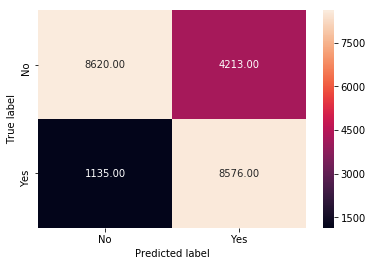

In [89]:
sns.heatmap(knn_cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

#### SVC:-

In [99]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [206]:
model = SVC(kernel='rbf', class_weight='balanced',C=50,gamma=0.005)

In [207]:
model.fit(train_X_train_mod, train_Y_train)

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=50, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [208]:
model

SVC(C=50, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [211]:
y_pred_class = model.predict(test_X_test_mod)

In [227]:
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

grid.fit(train_X, train_Y)

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [228]:
print(grid.best_params_)

{'C': 50, 'gamma': 0.005}


In [230]:
model = grid.best_estimator_

In [93]:
y_pred_class = model.predict(test_X_test)

In [94]:
print(classification_report(test_Y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81     12833
           1       0.72      0.89      0.79      9711

   micro avg       0.80      0.80      0.80     22544
   macro avg       0.81      0.81      0.80     22544
weighted avg       0.82      0.80      0.80     22544



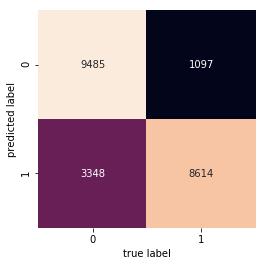

In [95]:
mat = confusion_matrix(test_Y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [97]:
print(metrics.accuracy_score( test_Y_test, y_pred_class))

0.8028300212916962


#### ANN:-

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_X_train)

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [99]:
# Now apply the transformations to the data:
norm_train_X = scaler.transform(train_X_train)
norm_test_X = scaler.transform(test_X_test)

C:\Users\mac\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  
C:\Users\mac\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [100]:
from sklearn.neural_network import MLPClassifier

In [101]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [102]:
mlp.fit(norm_train_X,train_Y_train)

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [103]:
y_pred_class = mlp.predict(norm_test_X)

In [104]:
y_pred_class

array([0, 0, 0, ..., 1, 1, 0], dtype=uint8)

In [105]:
y_pred_prob = mlp.predict_proba(norm_test_X)[:,1]

In [106]:
print(confusion_matrix(test_Y_test,y_pred_class))

[[8312 4521]
 [1170 8541]]


In [107]:
print(classification_report(test_Y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.88      0.65      0.74     12833
           1       0.65      0.88      0.75      9711

   micro avg       0.75      0.75      0.75     22544
   macro avg       0.77      0.76      0.75     22544
weighted avg       0.78      0.75      0.75     22544



In [108]:
print(metrics.accuracy_score( test_Y_test, y_pred_class))
print(metrics.roc_auc_score(test_Y_test, y_pred_prob))

0.7475603264726757
0.8995839658598228


In [256]:
len(mlp.coefs_)

4

In [258]:
len(mlp.coefs_[0])

9

In [257]:
len(mlp.intercepts_[0])

30

#### Random Forest:-

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=80 , max_features=10, n_jobs=-1)

In [166]:
radm_clf.fit( X_data, data_updated_with_normal_attack['attack_normal'] )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [167]:
radm_clf.n_features_

121

In [169]:
y_pred_class = radm_clf.predict( X_test_data )

ValueError: Number of features of the model must match the input. Model n_features is 121 and input n_features is 115 

In [122]:
print(metrics.accuracy_score( test_Y_test, y_pred_class ))
print(metrics.roc_auc_score( test_Y_test, y_pred_class ))

0.7657469836763662
0.7801747643979503


Text(0.5,15,'Predicted label')

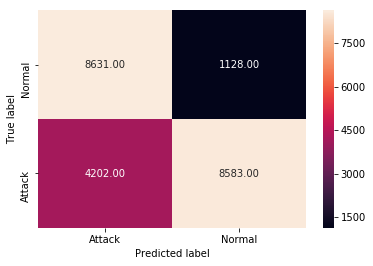

In [115]:
tree_cm = confusion_matrix( y_pred_class,test_Y_test,)

sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Attack", "Normal"] , yticklabels = ["Normal", "Attack"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [175]:
radm_clf.feature_importances_

array([3.57641273e-02, 5.42912084e-02, 7.07642279e-02, 2.17746998e-02,
       3.98221490e-02, 1.45373318e-02, 2.68788966e-02, 5.45520637e-02,
       1.19575153e-02, 4.86223048e-02, 2.17716562e-02, 1.36271683e-02,
       3.59976373e-02, 3.14578246e-03, 7.49714619e-03, 4.38927739e-04,
       6.13751161e-05, 3.45462587e-03, 2.23589579e-02, 4.73140622e-04,
       5.08789068e-05, 3.61632036e-05, 4.91764908e-02, 4.10592340e-04,
       0.00000000e+00, 1.00245369e-03, 1.84408990e-10, 3.80420686e-05,
       4.94812010e-02, 5.77950043e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.13872615e-02, 5.62843902e-03, 8.82984431e-03,
       1.35338320e-04, 5.84656935e-02, 2.40380580e-02, 5.83882823e-05,
       1.29461560e-04, 0.00000000e+00, 1.31034167e-04, 8.27975693e-05,
       7.62134486e-05, 1.27199221e-07, 7.69642465e-06, 5.75654443e-05,
       6.36070237e-05, 5.04299621e-05, 6.05163998e-03, 1.16324577e-05,
      

In [178]:
X_data.shape[1]

121

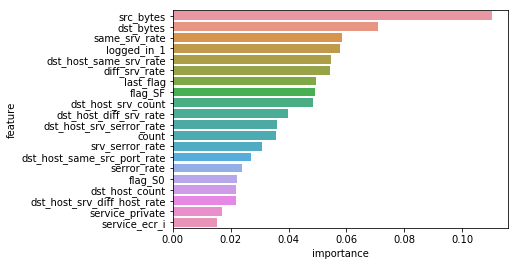

In [179]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(20):
  feature_rank.loc[f] = [f+1,
                         X_data.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [162]:
pargrid_rf = {'n_estimators': [50, 60, 70, 80, 90, 100],
                  'max_features': [7,8,9,10,11,12]}

gscv_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_rf, 
                        cv=5,
                        verbose=True, n_jobs=-1)

gscv_results = gscv_rf.fit(X_data, data_updated_with_normal_attack['attack_normal'])

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 33.5min finished


In [163]:
gscv_results.best_params_

{'max_features': 10, 'n_estimators': 80}

In [164]:
gscv_results.best_score_

0.9994681399982536

In [170]:
gscv_results.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [171]:
model_model = gscv_results

In [172]:
gscv_results.fea

ValueError: Number of features of the model must match the input. Model n_features is 121 and input n_features is 9 

#### Boosting:-

Ada Boosting:

In [123]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [124]:
learning_rate= [10 ** x for x in range(-3, 3)]

In [125]:
learning_rate

[0.001, 0.01, 0.1, 1, 10, 100]

In [146]:
pargrid_ada = {'n_estimators': [100, 200, 400, 600],
               'learning_rate': [10 ** x for x in range(-3, 3)]}

In [287]:
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [288]:
gscv_ada.fit(train_X, train_Y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 34.1min finished
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 400, 600, 800], 'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [290]:
gscv_ada.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [299]:
clf_ada = gscv_ada.best_estimator_

In [300]:
gscv_ada.best_score_

0.9190188362572437

In [126]:
ad=AdaBoostClassifier(learning_rate = 0.1, n_estimators=100)
ad.fit(train_X_train, train_Y_train )

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=100, random_state=None)

In [127]:
y_pred_class = ad.predict(test_X_test)

In [128]:
y_pred_prob = ad.predict_proba(test_X_test)[:,1]

In [129]:
print(metrics.accuracy_score(test_Y_test,y_pred_class))
print(metrics.roc_auc_score(test_Y_test,y_pred_prob))
print(metrics.jaccard_similarity_score(test_Y_test,y_pred_class))

0.7526171043293116
0.9147477585747145
0.7526171043293116


In [130]:
print(pd.Series(cross_val_score(clf_ada, train_X, train_Y, cv=10)).describe()[['min', 'mean', 'max']])

NameError: name 'cross_val_score' is not defined

Gradient Boosting:

In [147]:
gscv_gbm = GridSearchCV(estimator=GradientBoostingClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

gscv_gbm.fit(train_X_train, train_Y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 54.1min finished
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 400, 600], 'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [148]:
gscv_gbm.best_params_

{'learning_rate': 1, 'n_estimators': 200}

In [355]:
clf_gbm = gscv_gbm.best_estimator_

gscv_gbm.best_score_

0.9462922851861512

In [149]:
# Going with learning rate=0.1 and no. of trees as 100(as found out earlier)
gbm=GradientBoostingClassifier(learning_rate = 1, n_estimators=800)
gbm.fit(train_X_train, train_Y_train )

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [150]:
y_pred_class = gbm.predict(test_X_test)

In [151]:
y_pred_prob = gbm.predict_proba(test_X_test)[:,1]

In [152]:
print(metrics.accuracy_score(test_Y_test,y_pred_class))
print(metrics.roc_auc_score(test_Y_test,y_pred_prob))

0.7627306600425834
0.889773737889336


In [352]:
print(pd.Series(cross_val_score(gbm, train_X, train_Y, cv=10)).describe()[['min', 'mean', 'max']])

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

min     0.939208
mean    0.942970
max     0.948514
dtype: float64


XG Boosting:

In [364]:
import sys
!{sys.executable} -m pip install xgboost

In [136]:
from xgboost import XGBClassifier

In [137]:
#All Columns
xgb_estimator = XGBClassifier(n_estimators=200,
                         random_state = 42,
                        n_jobs=-1,
                        verbose=1)

In [138]:
xgb_estimator.fit(train_X_train, train_Y_train)

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbose=1, verbosity=1)

In [139]:
y_pred_class = xgb_estimator.predict(test_X_test)

In [140]:
pd.DataFrame(xgb_estimator.predict_proba(train_X_train))

0         1
0       0.111579  0.888421
1       0.164413  0.835587
2       0.999985  0.000015
3       0.006284  0.993716
4       0.001352  0.998648
5       0.999996  0.000004
6       0.999987  0.000013
7       0.999926  0.000074
8       0.999875  0.000125
9       0.999987  0.000013
10      0.999999  0.000001
11      0.999988  0.000012
12      0.008997  0.991003
13      0.063269  0.936731
14      0.999916  0.000084
15      0.998845  0.001155
16      0.000843  0.999157
17      0.544846  0.455154
18      0.422366  0.577634
19      0.000843  0.999157
20      0.999582  0.000418
21      0.999979  0.000021
22      0.000843  0.999157
23      0.544846  0.455154
24      0.999916  0.000084
25      0.056117  0.943883
26      0.999986  0.000014
27      0.275108  0.724892
28      0.000909  0.999091
29      0.001352  0.998648
...          ...       ...
125943  0.063269  0.936731
125944  0.067142  0.932858
125945  0.007508  0.992492
125946  0.999757  0.000243
125947  0.544846  0.455154
125948  0.999959  0.000041
125949  0.003449  0.996551
125950  0.433244  0.566756
125951  0.008997  0.991003
125952  0.056117  0.943883
125953  0.999691  0.000309
125954  0.010452  0.989548
125955  0.002086  0.997914
125956  0.024352  0.975648
125957  0.067142  0.932858
125958  0.999959  0.000041
125959  0.006284  0.993716
125960  0.000909  0.999091
125961  0.010751  0.989249
125962  0.544846  0.455154
125963  0.008997  0.991003
125964  0.999987  0.000013
125965  0.067142  0.932858
125966  0.999992  0.000008
125967  0.008997  0.991003
125968  0.999936  0.000064
125969  0.406403  0.593597
125970  0.202945  0.797055
125971  0.999691  0.000309
125972  0.067142  0.932858

[125973 rows x 2 columns]

In [ ]:
#same
#xgb_estimator.predict_proba(train_X)[:,1]
#pd.DataFrame(xgb_estimator.predict_proba(test_X))[1]

In [376]:
metrics.roc_auc_score(train_Y,xgb_estimator.predict_proba(train_X_train)[:,1])

0.9881391233738989

In [141]:
print(metrics.accuracy_score(test_Y_test,y_pred_class))
print(metrics.roc_auc_score(test_Y_test,pd.DataFrame(xgb_estimator.predict_proba(test_X_test))[1]))

0.7595369056068133
0.917652680185082


In [380]:
print(metrics.classification_report(test_Y, xgb_estimator.predict(test_X)))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     17631
           1       0.95      0.94      0.95     20161

   micro avg       0.94      0.94      0.94     37792
   macro avg       0.94      0.94      0.94     37792
weighted avg       0.94      0.94      0.94     37792



with all tuning parameters:-

In [142]:
xgb_estimator = XGBClassifier( learning_rate=0.01,
                               n_estimators=1000,
                               max_depth=5,
                               min_child_weight=1,
                               gamma=1,
                               subsample=0.8,
                               colsample_bytree=0.8,
                               n_jobs=-1,
                               reg_alpa=1,
                               scale_pos_weight=1,
                               random_state=42,
                               verbose=1)

In [143]:
xgb_estimator.fit(train_X_train, train_Y_train)

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=1,
       learning_rate=0.01, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=42,
       reg_alpa=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=0.8, verbose=1, verbosity=1)

In [144]:
print("Accuracy:")
print("training = ",metrics.accuracy_score(train_Y_train,pd.DataFrame(xgb_estimator.predict(train_X_train))))

print("testing = ",metrics.accuracy_score(test_Y_test,pd.DataFrame(xgb_estimator.predict(test_X_test))))

print('AUC')
print('training = ',metrics.roc_auc_score(train_Y_train,pd.DataFrame(xgb_estimator.predict_proba(train_X_train))[1]))

print('testing = ',metrics.roc_auc_score(test_Y_test,pd.DataFrame(xgb_estimator.predict_proba(test_X_test))[1]))

Accuracy:
training =  0.9461233756439872
testing =  0.761000709723208
AUC
training =  0.9893635301741709
testing =  0.9160627187673422


In [393]:
print(metrics.classification_report(test_Y, xgb_estimator.predict(test_X)))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     17631
           1       0.95      0.94      0.95     20161

   micro avg       0.95      0.95      0.95     37792
   macro avg       0.94      0.95      0.94     37792
weighted avg       0.95      0.95      0.95     37792



### Result of binary classifiers :-

<strong>Logistic Regression(using statsmodel) :</strong>
<pre>                    pseudo R-square = 68.8%
                    Gini:
                              train = 92.8%
                              test = 67.2%
                    AUC:
                              train = 96.7%
                              test = 83.6%

<strong>Logistic Regression(using sklearn) :</strong>
<pre>                    Accuracy = 68.5%
<pre>                    AUC = 84.7%

<strong>Naive Bayes :</strong>
<pre>                 Accuracy = 74.6%
<pre>                 AUC = 88.3%

<strong>KNN :</strong>
<pre>               Accuracy = 76.2%
<pre>               AUC = 85.7%

<strong>SVC :</strong>
<pre>               Accuracy = 80.2%

<strong>ANN :</strong>
<pre>               Accuracy = 74.7%
<pre>               AUC = 89.9%

<strong>Ensemble Learning :</strong>
<br>
<pre><strong>Random Forest :</strong>
<pre>               Accuracy = 76.5%
<pre>               AUC = 78%
<strong>Ada Boost :</strong>
<pre>           Accuracy = 75.2%
<pre>           AUC = 91.4% 
<br>
<strong>Gradient Boost :</strong>
<pre>           Accuracy = 75.8%
<pre>           AUC = 90.5% 
<br>
<strong>XG Boost :</strong>
<pre>          Accuracy = 75.9%
<pre>          AUC = 91.7% 

## Multi-classification :

In [51]:
X_data.head()
X_test_data.head()

count  diff_srv_rate  dst_bytes  dst_host_count  dst_host_diff_srv_rate  \
0  229.0           0.06        0.0           255.0                    0.06   
1  136.0           0.06        0.0           255.0                    0.06   
2    1.0           0.00        0.0           134.0                    0.04   
3    1.0           0.00        0.0             6.0                    0.00   
4    1.0           0.00       15.0            29.0                    0.17   

   dst_host_rerror_rate  dst_host_same_src_port_rate  dst_host_same_srv_rate  \
0                  1.00                         0.00                    0.04   
1                  1.00                         0.00                    0.00   
2                  0.00                         0.61                    0.61   
3                  0.00                         1.00                    1.00   
4                  0.83                         0.03                    0.31   

   dst_host_serror_rate  dst_host_srv_count       ...        service_whois  \
0                   0.0                10.0       ...                    0   
1                   0.0                 1.0       ...                    0   
2                   0.0                86.0       ...                    0   
3                   0.0                57.0       ...                    0   
4                   0.0                86.0       ...                    0   

   src_bytes  srv_count  srv_diff_host_rate  srv_rerror_rate  srv_serror_rate  \
0        0.0       10.0                0.00              1.0             0.00   
1        0.0        1.0                0.00              1.0             0.00   
2    12983.0        1.0                0.00              0.0             0.00   
3       20.0       65.0                1.00              0.0             0.00   
4        0.0        8.0                0.75              0.5             0.12   

   su_attempted_1  su_attempted_2  urgent  wrong_fragment  
0               0               0     0.0             0.0  
1               0               0     0.0             0.0  
2               0               0     0.0             0.0  
3               0               0     0.0             0.0  
4               0               0     0.0             0.0  

[5 rows x 115 columns]

In [52]:
Y_train = data_updated[['attack_normal','attack_buffer_overflow','attack_ftp_write','attack_guess_passwd','attack_imap','attack_ipsweep','attack_land','attack_loadmodule','attack_multihop','attack_neptune','attack_nmap','attack_perl','attack_phf', 'attack_pod', 'attack_portsweep', 'attack_rootkit',
                                       'attack_satan', 'attack_smurf', 'attack_spy', 'attack_teardrop','attack_warezclient', 'attack_warezmaster']]

In [53]:
Y_test = test_data_updated [['attack_normal','attack_back','attack_buffer_overflow','attack_ftp_write','attack_guess_passwd','attack_httptunnel',
                                               'attack_imap','attack_ipsweep','attack_land','attack_loadmodule','attack_mailbomb','attack_mscan','attack_multihop','attack_named',
                                               'attack_neptune','attack_nmap','attack_perl','attack_phf','attack_pod','attack_portsweep','attack_processtable',
                                               'attack_ps','attack_rootkit','attack_saint','attack_satan','attack_sendmail','attack_smurf','attack_snmpgetattack','attack_snmpguess',
                                               'attack_sqlattack','attack_teardrop','attack_udpstorm','attack_warezmaster','attack_worm','attack_xlock','attack_xsnoop', 'attack_xterm']]

In [54]:
Y_train.head()
Y_test.head()

attack_normal  attack_back  attack_buffer_overflow  attack_ftp_write  \
0              0            0                       0                 0   
1              0            0                       0                 0   
2              1            0                       0                 0   
3              0            0                       0                 0   
4              0            0                       0                 0   

   attack_guess_passwd  attack_httptunnel  attack_imap  attack_ipsweep  \
0                    0                  0            0               0   
1                    0                  0            0               0   
2                    0                  0            0               0   
3                    0                  0            0               0   
4                    0                  0            0               0   

   attack_land  attack_loadmodule      ...       attack_snmpgetattack  \
0            0                  0      ...                          0   
1            0                  0      ...                          0   
2            0                  0      ...                          0   
3            0                  0      ...                          0   
4            0                  0      ...                          0   

   attack_snmpguess  attack_sqlattack  attack_teardrop  attack_udpstorm  \
0                 0                 0                0                0   
1                 0                 0                0                0   
2                 0                 0                0                0   
3                 0                 0                0                0   
4                 0                 0                0                0   

   attack_warezmaster  attack_worm  attack_xlock  attack_xsnoop  attack_xterm  
0                   0            0             0              0             0  
1                   0            0             0              0             0  
2                   0            0             0              0             0  
3                   0            0             0              0             0  
4                   0            0             0              0             0  

[5 rows x 37 columns]

Categories :-

0 = 'attack_normal'
<br>
1 = DoS = 'attack_back','attack_land','attack_neptune','attack_pod','attack_smurf','attack_teardrop','attack_udpstorm','attack_processtable','attack_worm'
<br>
2 = Probe = 'attack_satan','attack_ipsweep','attack_nmap','attack_portsweep','attack_mscan','attack_saint',
<br>
3 = R2L =  'attack_guess_passwd','attack_ftp_write','attack_imap','attack_phf','attack_multihop','attack_warezmaster','attack_xlock','attack_xsnoop',     'attack_snmpguess','attack_snmpgetattack','attack_httptunnel','attack_sendmail','attack_named','attack_mailbomb','warezclient','spy'
<br>
4 = U2R =  'attack_buffer_overflow','attack_loadmodule','attack_rootkit','attack_perl','attack_sqlattack', 'attack_xterm','attack_ps'
 
 
 

In [55]:
Y_train = data['attack']

In [56]:
type(Y_train)
Y_train.head()

0     normal
1     normal
2    neptune
3     normal
4     normal
Name: attack, dtype: object

In [57]:
# Making y column :-
Y_train_normal = Y_train.replace(to_replace=['normal'],value=0)

Y_train_normal_dos = Y_train_normal.replace(to_replace=['back','land','neptune','pod','smurf','teardrop','udpstorm','processtable','worm','apache2'],value=1)

Y_train_normal_dos_probe = Y_train_normal_dos.replace(to_replace=['satan','ipsweep','nmap','portsweep','mscan','saint'],value=2)

Y_train_normal_dos_probe_r2l = Y_train_normal_dos_probe.replace(to_replace=['guess_passwd','ftp_write','imap','phf','multihop','warezmaster','xlock','xsnoop',
        'snmpguess','snmpgetattack','httptunnel','sendmail','named','mailbomb'],value=3)

Y_train_normal_dos_probe_r2l_u2r = Y_train_normal_dos_probe_r2l.replace(to_replace=['buffer_overflow','loadmodule','rootkit','perl','sqlattack', 'xterm','ps'],value=4)

Y_train_normal_dos_probe_r2l_u2r_f1 = Y_train_normal_dos_probe_r2l_u2r.replace(to_replace=['warezclient','spy'],value=3)

In [58]:
Y_train_final = Y_train_normal_dos_probe_r2l_u2r_f1

In [59]:
Y_train_final.value_counts()

0    67343
1    45927
2    11656
3      995
4       52
Name: attack, dtype: int64

Doing same thing with test data:-

In [60]:
Y_test = test_data['attack']

In [61]:
Y_test.head()

0    neptune
1    neptune
2     normal
3      saint
4      mscan
Name: attack, dtype: object

In [62]:
# Making y column for test data :-
Y_test_normal = Y_test.replace(to_replace=['normal'],value=0)

Y_test_normal_dos = Y_test_normal.replace(to_replace=['back','land','neptune','pod','smurf','teardrop','udpstorm','processtable','worm'],value=1)

Y_test_normal_dos_probe = Y_test_normal_dos.replace(to_replace=['satan','ipsweep','nmap','portsweep','mscan','saint'],value=2)

Y_test_normal_dos_probe_r2l = Y_test_normal_dos_probe.replace(to_replace=['guess_passwd','ftp_write','imap','phf','multihop','warezmaster','xlock','xsnoop',
        'snmpguess','snmpgetattack','httptunnel','sendmail','named','mailbomb'],value=3)

Y_test_normal_dos_probe_r2l_u2r = Y_test_normal_dos_probe_r2l.replace(to_replace=['buffer_overflow','loadmodule','rootkit','perl','sqlattack', 'xterm','ps'],value=4)

Y_test_normal_dos_probe_r2l_u2r_f1 = Y_test_normal_dos_probe_r2l_u2r.replace(to_replace=['apache2'],value=1)

In [63]:
Y_test_final = Y_test_normal_dos_probe_r2l_u2r_f1

In [64]:
Y_test_final.value_counts()

0    9711
1    7167
3    3178
2    2421
4      67
Name: attack, dtype: int64

Adding 'attack' column :-

In [65]:
X_data_with_attack = X_data

In [66]:
X_data_with_attack['attack'] = Y_train_final

C:\Users\mac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
X_data_with_attack.head()

count  diff_srv_rate  dst_bytes  dst_host_count  dst_host_diff_srv_rate  \
0    2.0           0.00        0.0           150.0                    0.03   
1   13.0           0.15        0.0           255.0                    0.56   
2  123.0           0.07        0.0           255.0                    0.05   
3    5.0           0.00     8153.0            30.0                    0.00   
4   30.0           0.00      420.0           255.0                    0.00   

   dst_host_rerror_rate  dst_host_same_src_port_rate  dst_host_same_srv_rate  \
0                  0.05                         0.17                    0.17   
1                  0.00                         0.88                    0.00   
2                  0.00                         0.00                    0.10   
3                  0.00                         0.03                    1.00   
4                  0.00                         0.00                    1.00   

   dst_host_serror_rate  dst_host_srv_count   ...    src_bytes  srv_count  \
0                  0.00                25.0   ...        491.0        2.0   
1                  0.00                 1.0   ...        146.0        1.0   
2                  1.00                26.0   ...          0.0        6.0   
3                  0.03               255.0   ...        232.0        5.0   
4                  0.00               255.0   ...        199.0       32.0   

   srv_diff_host_rate  srv_rerror_rate  srv_serror_rate  su_attempted_1  \
0                0.00              0.0              0.0               0   
1                0.00              0.0              0.0               0   
2                0.00              0.0              1.0               0   
3                0.00              0.0              0.2               0   
4                0.09              0.0              0.0               0   

   su_attempted_2  urgent  wrong_fragment  attack  
0               0     0.0             0.0       0  
1               0     0.0             0.0       0  
2               0     0.0             0.0       1  
3               0     0.0             0.0       0  
4               0     0.0             0.0       0  

[5 rows x 122 columns]

## Feature Selections :-

#### Select K-Best :

In [279]:
X_kbest = SelectKBest(f_classif, k=10).fit(X_data, Y_train_final )

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 24  30  31  32  33  34  35  36 119 120] are constant.
  UserWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [280]:
type(X_kbest)
X_kbest

SelectKBest(k=10, score_func=<function f_classif at 0x00000280F5814AE8>)

In [282]:
X_kbest.get_support()

array([False, False, False, False, False, False, False,  True,  True,
        True, False, False,  True, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False])

In [285]:
X_kbest.scores_

array([3.00444953e+04, 6.59610145e+03, 4.74756275e+03, 9.43707332e+03,
       1.15885487e+04, 3.81965256e+03, 1.37786510e+04, 3.41042427e+04,
       5.21218091e+04, 3.46239524e+04, 7.35614632e+03, 4.58499256e+03,
       5.30773440e+04, 1.63600618e+03, 1.66053881e+03, 3.34952321e+02,
       2.54786282e+02, 5.65940224e+03, 5.51315801e+04, 7.62261305e+01,
       2.08987014e+01, 1.29550671e+01, 5.68132279e+04, 6.48709899e+02,
                  nan, 2.88233829e+03, 2.17648989e-01, 3.55455220e+00,
       1.89277947e+04, 3.19592485e+04,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan, 3.07927309e+03, 1.93979328e+03, 4.48742744e+03,
       2.64747538e+03, 6.82383711e+04, 5.14262570e+04, 1.18508349e+01,
       3.67700176e+02, 4.90443035e+00, 1.45875439e+02, 2.99333382e+02,
       3.14045579e+02, 2.24451089e+02, 2.17230993e+02, 2.06620544e+02,
       2.14119490e+02, 1.74185480e+02, 2.26306980e+03, 1.68413546e+02,
      

In [286]:
KBest_features=X_data.columns[X_kbest.get_support()]

selected_features_from_KBest = X_data[KBest_features]

In [288]:
selected_features_from_KBest.head()
KBest_features

Index(['dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_count',
       'dst_host_srv_serror_rate', 'flag_S0', 'flag_SF', 'logged_in_1',
       'same_srv_rate', 'serror_rate', 'srv_serror_rate'],
      dtype='object')

#### RFE :

In [291]:
logreg = LogisticRegression()
#nb_clf = GaussianNB()
rfe = RFE(logreg, 10)
rfe = rfe.fit(X_data, Y_train_final )

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Sp

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will 

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will 

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will 

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will 

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will 

In [292]:
print(rfe.support_)
print(rfe.ranking_)

[False  True False False  True False False False False False  True False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False  True False  True  True False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]
[ 88   1 102  97   1  14   6  12  15  95   1  43  27  81  13  20  26  33
   1   8  87  37   4  29 104   7 101  22  34  21 106 105 103 107 109 108
 110  24   5  10  23   1  31  32  46  93  79  42  50  55  56  78  77  30
   1  74   1   1  52  75  83  39  18  47  9

In [293]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X_data.columns, rfe.get_support())]
feature_map

[('count', False),
 ('diff_srv_rate', True),
 ('dst_bytes', False),
 ('dst_host_count', False),
 ('dst_host_diff_srv_rate', True),
 ('dst_host_rerror_rate', False),
 ('dst_host_same_src_port_rate', False),
 ('dst_host_same_srv_rate', False),
 ('dst_host_serror_rate', False),
 ('dst_host_srv_count', False),
 ('dst_host_srv_diff_host_rate', True),
 ('dst_host_srv_rerror_rate', False),
 ('dst_host_srv_serror_rate', False),
 ('duration', False),
 ('flag_REJ', False),
 ('flag_RSTO', False),
 ('flag_RSTOS0', False),
 ('flag_RSTR', False),
 ('flag_S0', True),
 ('flag_S1', False),
 ('flag_S2', False),
 ('flag_S3', False),
 ('flag_SF', False),
 ('flag_SH', False),
 ('hot', False),
 ('is_guest_login_1', False),
 ('is_host_login_1', False),
 ('land_1', False),
 ('last_flag', False),
 ('logged_in_1', False),
 ('num_access_files', False),
 ('num_compromised', False),
 ('num_failed_logins', False),
 ('num_file_creations', False),
 ('num_outbound_cmds', False),
 ('num_root', False),
 ('num_shells', F

In [294]:
#Alternative of capturing the important variables
RFE_features=X_data.columns[rfe.get_support()]
RFE_features

Index(['diff_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_srv_diff_host_rate', 'flag_S0', 'same_srv_rate',
       'service_domain_u', 'service_eco_i', 'service_ecr_i', 'service_http',
       'service_private'],
      dtype='object')

In [295]:
selected_features_from_rfe = X_data[RFE_features]

In [297]:
#selected_features_from_rfe.head()
RFE_features

Index(['diff_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_srv_diff_host_rate', 'flag_S0', 'same_srv_rate',
       'service_domain_u', 'service_eco_i', 'service_ecr_i', 'service_http',
       'service_private'],
      dtype='object')

#### VIF :

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [310]:
a,b = dmatrices(formula_like='attack ~ logged_in_1+diff_srv_rate+dst_host_diff_srv_rate+dst_host_srv_diff_host_rate+flag_S0+same_srv_rate+service_domain_u+service_eco_i+service_ecr_i+service_http+service_private', data = X_data_with_attack, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

print(vif)

    VIF Factor                     features
0    22.935942                    Intercept
1     3.858393                  logged_in_1
2     2.079448                diff_srv_rate
3     1.705732       dst_host_diff_srv_rate
4     2.071584  dst_host_srv_diff_host_rate
5     3.012605                      flag_S0
6     5.750572                same_srv_rate
7     1.958120             service_domain_u
8     2.055066                service_eco_i
9     1.323103                service_ecr_i
10    2.307694                 service_http
11    1.349505              service_private


In [ ]:
Select K-best :
['dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_count',
       'dst_host_srv_serror_rate', 'flag_S0', 'flag_SF', 'logged_in_1',
       'same_srv_rate', 'serror_rate', 'srv_serror_rate']

RFE :
['diff_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_srv_diff_host_rate', 'flag_S0', 'same_srv_rate',
       'service_domain_u', 'service_eco_i', 'service_ecr_i', 'service_http',
       'service_private']


Combo from above 2:
'logged_in_1','same_srv_rate','serror_rate','dst_host_srv_count',
'diff_srv_rate', 'dst_host_diff_srv_rate','dst_host_srv_diff_host_rate', 'flag_S0', 'same_srv_rate',
'service_domain_u', 'service_eco_i', 'service_ecr_i', 'service_http','service_private','flag_SF', 


finalise :
'logged_in_1','diff_srv_rate','dst_host_diff_srv_rate','dst_host_srv_diff_host_rate','flag_S0','same_srv_rate','service_domain_u','service_eco_i','service_ecr_i','service_http','service_private'

## Model Building :-

In [68]:
train_X_train = X_data[['logged_in_1','diff_srv_rate','dst_host_diff_srv_rate','dst_host_srv_diff_host_rate','flag_S0','same_srv_rate','service_domain_u','service_eco_i','service_ecr_i','service_http','service_private']]
train_Y_train = Y_train_final

In [69]:
test_X_test = X_test_data[['logged_in_1','diff_srv_rate','dst_host_diff_srv_rate','dst_host_srv_diff_host_rate','flag_S0','same_srv_rate','service_domain_u','service_eco_i','service_ecr_i','service_http','service_private']]
test_Y_test = Y_test_final

### Naive Bayes :

In [72]:
nb_clf = GaussianNB()
nb_clf.fit(train_X_train, train_Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [73]:
y_pred_prob = nb_clf.predict_proba(test_X_test)[:, 1]

In [74]:
y_pred_prob

array([9.99999998e-01, 9.99999998e-01, 2.62261499e-15, ...,
       1.61769700e-10, 0.00000000e+00, 1.61044302e-93])

In [75]:
# Calculating accuracy and auc
print(metrics.accuracy_score( test_Y_test, nb_clf.predict( test_X_test ) ))

0.6128903477643719


### SVC :

In [100]:
pargrid_svc = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}

In [101]:
grid = GridSearchCV(estimator=SVC(), 
                    param_grid=pargrid_svc,
                    cv=5,
                    verbose=True,
                    n_jobs=-1)

In [102]:
grid_svc_result = grid.fit(train_X_train, train_Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 179.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 304.5min finished


In [ ]:
model = SVC(kernel='rbf', class_weight='balanced',C=50,gamma=0.005)

In [103]:
grid_svc_result.best_params_

{'C': 50, 'gamma': 0.005}

In [108]:
model_svc = grid_svc_result.best_estimator_
model_svc

SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [105]:
grid_svc_result.best_score_

0.947131528184611

In [106]:
y_pred_class = grid_svc_result.predict(test_X_test)

In [107]:
print(metrics.accuracy_score( test_Y_test, y_pred_class))

0.6866128459900639


In [109]:
y_pred_class = model_svc.predict(test_X_test)

In [110]:
print(metrics.accuracy_score( test_Y_test, y_pred_class))

0.6866128459900639


### ANN :

In [82]:
from sklearn.neural_network import MLPClassifier

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_X_train)

C:\Users\mac\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [84]:
norm_train_X = scaler.transform(train_X_train)
norm_test_X = scaler.transform(test_X_test)

C:\Users\mac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\mac\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  


In [85]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [86]:
mlp.fit(norm_train_X,train_Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [87]:
y_pred_class = mlp.predict(norm_test_X)

In [88]:
y_pred_class

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
y_pred_prob = mlp.predict_proba(norm_test_X)[:,1]

In [96]:
print(metrics.accuracy_score( test_Y_test, y_pred_class))

0.6714425124201562


### Result from multi-classifier :-

<strong>Naive Bayes :</strong>
<pre>Accuracy = 61.2%
<br>
<strong>SVC :</strong>
<pre>Acccuracy = 68.88%
<br>
<strong>ANN :</strong>
<pre>Accuracy = 67.14%